# Analytics - Product Quality 

#### Date: 2023/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: 2023/02
##### Professor: Hilmer Neri

##### Members:

| Foto | Nome | Github | Email | Matrícula |
|:----:|:----:|:------:|:-----:|:--------:|
| <img width="100px" style="border-radius:10%" src="https://github.com/DaviMarinho.png" alt="Davi Marinho da Silva Campos"> | Davi Marinho da Silva Campos | @DaviMarinho | davii_marinho@hotmail.com | 190026600 |
| <img width="100px" style="border-radius:10%" src="https://github.com/Diego-Carlito.png" alt="Diego Carlito Rodrigues de Souza"> | Diego Carlito Rodrigues de Souza | @Diego-Carlito | <221007690@aluno.unb.br> | 221007690 |
| <img width="100px" style="border-radius:10%" src="https://github.com/eric-kingu.png" alt="Eric Akio Lages Nishimura"> | Eric Akio Lages Nishimura | @eric-kingu | <190105895@aluno.unb.br> | 190105895 |
| <img width="100px" style="border-radius:10%" src="https://github.com/GabrielaTiago.png" alt="Gabriela Tiago de Araujo"> | Gabriela Tiago de Araujo | @GabrielaTiago | <190028475@aluno.unb.br> | 190028475 |
| <img width="100px" style="border-radius:10%" src="https://github.com/Gabrielle-Ribeiro.png" alt="Gabrielle Ribeiro Gomes"> | Gabrielle Ribeiro Gomes | @Gabrielle-Ribeiro | gabrielleribeiro2010@gmail.com | 170011020 |
| <img width="100px" style="border-radius:10%" src="https://github.com/geraldovictor.png" alt="Geraldo Victor Alves Barbosa"> | Geraldo Victor Alves Barbosa | @geraldovictor | geraldovictor@outlook.com | 170011119 |
| <img width="100px" style="border-radius:10%" src="https://github.com/cansancaojennifer.png" alt="Jennifer Costa Cansanção"> | Jennifer Costa Cansanção | @cansancaojennifer | <221007733@aluno.unb.br> | 221007733 |
| <img width="100px" style="border-radius:10%" src="https://github.com/joao15victor08.png" alt="Jennifer Costa Cansanção"> | João Victor de Oliveira Matos | @joao15victor08 | joao15victor08@gmail.com | 170013987 |
| <img width="100px" style="border-radius:10%" src="https://github.com/nYCSTs.png" alt="Lucas da Cunha Andrade"> | Lucas da Cunha Andrade | @nYCSTs | lucascandrade14@hotmail.com | 180105256 |
| <img width="100px" style="border-radius:10%" src="https://github.com/Marcosatc147.png" alt="Marcos Antonio Teles de Castilhos"> | Marcos Antonio Teles de Castilhos | @Marcosatc147 | <221008300@aluno.unb.br> | 221008300 |
| <img width="100px" style="border-radius:10%" src="https://github.com/RaisSabeAndrade.png" alt="Raissa Andrade Silveira"> | Raissa Andrade Silveira | @RaisSabeAndrade | <221035077@aluno.unb.br> | 221035077 |
| <img width="100px" style="border-radius:10%" src="https://github.com/castroricardo1.png" alt="Ricardo de Castro Loureiro"> | Ricardo de Castro Loureiro | @castroricardo1 | ricardoloureiro75@gmail.com | 200043111 |
| <img width="100px" style="border-radius:10%" src="https://github.com/savioc2.png" alt="Ana Carolina Rodrigues Leite"> | Sávio Cunha de Carvalho | @savioc2 | saviocunha61@gmail.com | 180130889 |
| <img width="100px" style="border-radius:10%" src="https://github.com/vitoriaaquere.png" alt="Vitória Aquere Matos"> | Vitória Aquere Matos | @vitoriaaquere | <190096616@aluno.unb.br> | 190096616 |

##### Data de análise: [R1] -  26/05/2023 (Sprint 04)


### LIBRARIES

In [61]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.0 MB/s eta 0:00:001.5 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Deal with data
import pandas as pd
import json
from glob import glob
import os

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Deal with type hints
from typing import List

# Deal with time
import datetime

### GRAPH SETTINGS

In [3]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

#### Replace your semester, project name, repository name, and the programming language extension

In [64]:
# Set your repo major name here
# Example: fga-eps-mds-2022-1-MeasureSoftGram-
repo_name = 'fga-eps-mds-2023.2-UnB-TV-'

# Add your repos here
# Example: 'Front': 'py',
repos_language = {
    'Frontend': 'ts',
    'Users': 'py',
    'VideoService': 'py',
    'Admin': 'py',
}

### SonarCloud
##### Path to the folder with all your jsons

In [65]:
# Maybe you should change this path to your own path

sonar_files = glob('./analytics-raw-data/*.json')

## Create DataFrame

#### Unmarshall json

In [66]:
def unmarshall(json_path: str) -> dict:
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
    return json_obj

#### Create a list with all valid columns

In [67]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'tests',
               'test_errors',
               'test_failures',
               'test_execution_time',
               'security_rating']

#### Extract files dataframe out of component dataframe

In [68]:
def get_files_df(df: pd.DataFrame) -> pd.DataFrame:

    files_df = df[df['qualifier'] == 'FIL']

    files_df = files_df.dropna(subset=['functions', 'complexity','comment_lines_density', 'duplicated_lines_density', 'coverage' ])

    return files_df

#### Extract directories dataframe out of component dataframe

In [69]:
def get_dir_df(df: pd.DataFrame) -> pd.DataFrame:
    dirs = df[df["qualifier"] == "DIR"]

    newdf = pd.to_numeric(dirs["tests"])

    max_value_index = newdf.idxmax()

    return dirs.loc[max_value_index]

#### Extract uts dataframe out of component dataframe

In [70]:
def get_uts_df(df: pd.DataFrame) -> pd.DataFrame:
    uts_df = df[df['qualifier'] == 'UTS']

    uts_df = uts_df.fillna(0)

    uts_df = uts_df.dropna(subset=['test_execution_time'])

    return uts_df

#### Generate component dataframe

In [71]:
def metric_per_file(json_dict: dict) -> List[dict]:
    file_json = []

    for component in json_dict['components']:
        ncloc_value = 0
        for measure in component['measures']:
            if measure['metric'] == 'ncloc':
                ncloc_value = float(measure['value'])
                break

        if (component['qualifier'] == 'FIL' and ncloc_value > 0) \
                or component['qualifier'] == 'DIR' \
                or component['qualifier'] == 'UTS':
            file_json.append(component)

    return file_json


def generate_component_dataframe_data(
        metrics_list: List[str],
        file_component_data: List[dict],
        language_extension: str) -> pd.DataFrame:

    df_columns = metrics_list

    files_df = pd.DataFrame(columns = df_columns)
    dirs_df = pd.DataFrame(columns = df_columns)
    uts_df = pd.DataFrame(columns = df_columns)

    for file in file_component_data:
        try:
                if file['qualifier'] == 'FIL' and file['language'] == language_extension:
                    for measure in file['measures']:
                        files_df.at[file['path'], measure['metric']] = measure['value']

                    files_df['qualifier'] = file['qualifier']

                elif file['qualifier'] == 'DIR':
                    for measure in file['measures']:
                        dirs_df.at[file['path'], measure['metric']] = measure['value']

                    dirs_df['qualifier'] = file['qualifier']

                elif file['qualifier'] == 'UTS':
                    for measure in file['measures']:
                        uts_df.at[file['path'], measure['metric']] = measure['value']

                    uts_df['qualifier'] = file['qualifier']

        except:
            pass

    files_df.reset_index(inplace = True)
    dirs_df.reset_index(inplace = True)
    uts_df.reset_index(inplace = True)

    files_df = files_df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)
    dirs_df = dirs_df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)
    uts_df = uts_df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    df = pd.concat([files_df, dirs_df, uts_df], axis=0)

    return df


def create_component_df(json_list):
    df = pd.DataFrame()

    for json_path in json_list:
        file_component = unmarshall(json_path)
        file_component_data = metric_per_file(file_component)

        base_name = os.path.basename(json_path)

        file_component_dataframe = generate_component_dataframe_data(
            metric_list,
            file_component_data,
            language_extension = repos_language[base_name.split("-")[6]])


        file_component_dataframe['filename'] = base_name

        df = pd.concat([df, file_component_dataframe], ignore_index=True)

    aux_df = df['filename'].str.split(r"-(\d+-\d+-\d+-\d+-\d+-\d+)-(.*?).json", expand=True)

    df['repository'] = aux_df[0]
    df['datetime'] = aux_df[1]
    df['version'] = aux_df[2]

    df = df.sort_values(by=['repository', 'datetime'])

    return df

In [72]:
file_component_df = create_component_df(sonar_files)
file_component_df.repository.unique()

array(['fga-eps-mds-2023.2-UnB-TV-Frontend'], dtype=object)

### Create dataframe per repository

In [73]:
repos_dataframes = []

for repo in repos_language.keys():
    dataframe = file_component_df[file_component_df['repository'] == repo_name+repo]
    repos_dataframes.append({'name': repo, 'df': dataframe})

## Measure calculations according to Q-Rapids quality model

In [74]:
def _ncloc(df: pd.DataFrame) -> int:
    ncloc = 0
    for each in df['ncloc']:
        # try to cast the current ncloc value to int, if the value is NaN/Null, consider it as zero.
        try:
            n = int(each)
        except ValueError:
            n = 0
        ncloc += n

    return ncloc

## Quality Aspect - Maintainability

### Factor - Code Quality

#### Complexity

In [75]:
def m1(df: pd.DataFrame):

    files_df = get_files_df(df)

    density_non_complex_files = len(files_df[(files_df['complexity'].astype(float) /
                                              files_df['functions'].astype(float)) < 10]) / len(files_df)

    return density_non_complex_files

#### Comments

In [76]:
def m2(df: pd.DataFrame):

    files_df = get_files_df(df)

    density_comment_files = len(files_df[(files_df['comment_lines_density'].astype(float) > 10) &
                                         (files_df['comment_lines_density'].astype(float) < 30)]) / len(files_df)

    return density_comment_files

#### Duplications

In [77]:
def m3(df: pd.DataFrame):

    files_df = get_files_df(df)

    duplication = len(files_df[(files_df['duplicated_lines_density'].astype(float) < 5)])/len(files_df)

    return duplication

## Quality Aspect - Reliability

### Factor - Testing Status

#### Passed tests

In [78]:
def m4(df: pd.DataFrame):

    dir_df = get_dir_df(df)

    passed_tests = (float(dir_df['tests']) - (float(dir_df['test_errors']) + float(dir_df['test_failures']))) /\
               float(dir_df['tests'])

    return passed_tests

#### Fast test builds

In [79]:
def m5(df: pd.DataFrame):
    dir_df = get_uts_df(df)

    density_fast_test_builds = len(dir_df[(dir_df['test_execution_time'].astype(float)) < 300000]) /\
                               len(dir_df['test_execution_time'].astype(float))
    return density_fast_test_builds

#### Test coverage

In [80]:
def m6(df: pd.DataFrame):

    files_df = get_files_df(df)

    density_test_coverage = len(files_df[(files_df['coverage'].astype(float) > 60)]) / len(files_df)

    return density_test_coverage

## Calculate measures for each repository

In [81]:
def create_metrics_df(df: pd.DataFrame) -> pd.DataFrame:

    date_time_vec = df['datetime'].unique()

    m1_list = []
    m2_list = []
    m3_list = []
    m4_list = []
    m5_list = []
    m6_list = []

    ncloc_list = []
    repository_list = []
    version_list = []

    for version in date_time_vec:

        version_df = df[df['datetime'] == version]

        try:
            m1_list.append(m1(version_df))
        except Exception:
            m1_list.append(0)

        try:
            m2_list.append(m2(version_df))
        except Exception:
            m2_list.append(0)

        try:
            m3_list.append(m3(version_df))
        except Exception:
            m3_list.append(0)

        try:
            m4_list.append(m4(version_df))
        except Exception:
            m4_list.append(0)

        try:
            m5_list.append(m5(version_df))
        except Exception:
            m5_list.append(0)

        try:
            m6_list.append(m6(version_df))
        except Exception:
            m6_list.append(0)

        ncloc_list.append(_ncloc(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)

    final_dict = {
        'm1': m1_list,
        'm2': m2_list,
        'm3': m3_list,
        'm4': m4_list,
        'm5': m5_list,
        'm6': m6_list,
        'repository': repository_list,
        'version': version_list,
        'ncloc': ncloc_list
    }

    metrics_df = pd.DataFrame(final_dict)

    return metrics_df

In [83]:
# Here we will create a dictionary with the metrics for each repository
metrics = {}

for repo_df in repos_dataframes:
    metrics[repo_df['name']] = create_metrics_df(repo_df['df'])

/tmp/ipykernel_176872/2067229751.py:6: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_value_index = newdf.idxmax()
/tmp/ipykernel_176872/2067229751.py:6: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_value_index = newdf.idxmax()
/tmp/ipykernel_176872/2067229751.py:6: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_value_index = newdf.idxmax()
/tmp/ipykernel_176872/2067229751.py:6: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_value_index = newdf.idxmax()
/tmp/ipykernel_176872/2067229751.py:6: FutureWarning: The behavior of Series.idxmax 

## Data visualization

In this area you will need to plot the metrics of each repository.

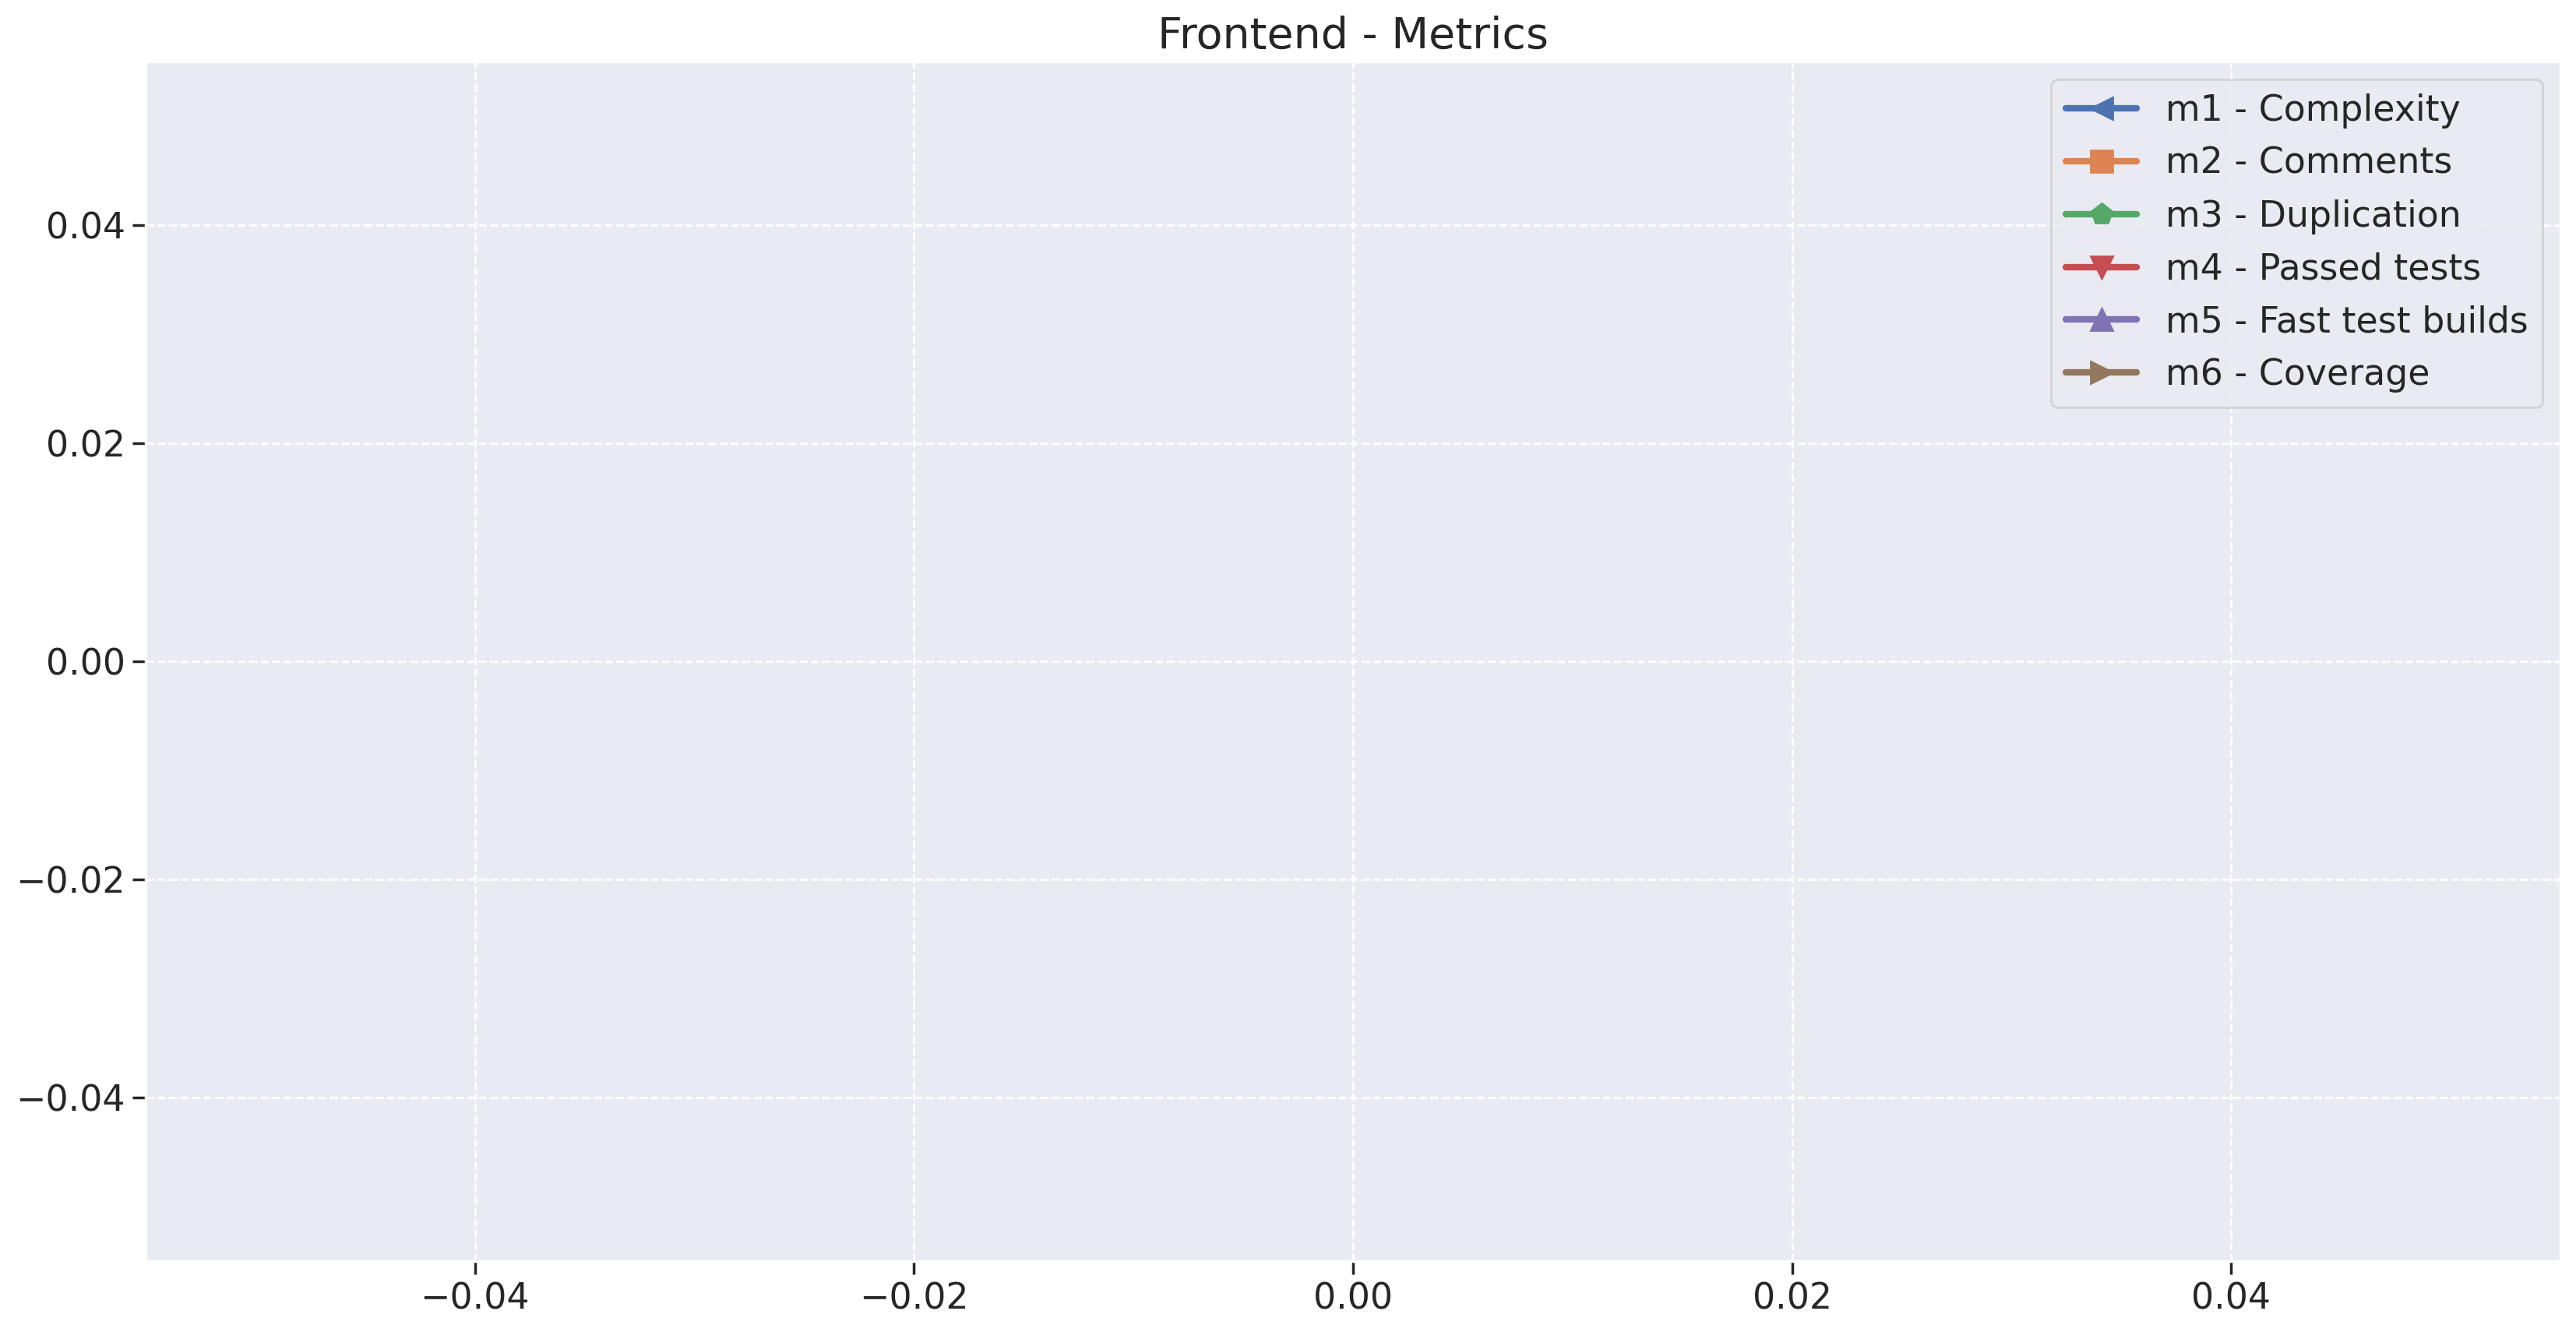

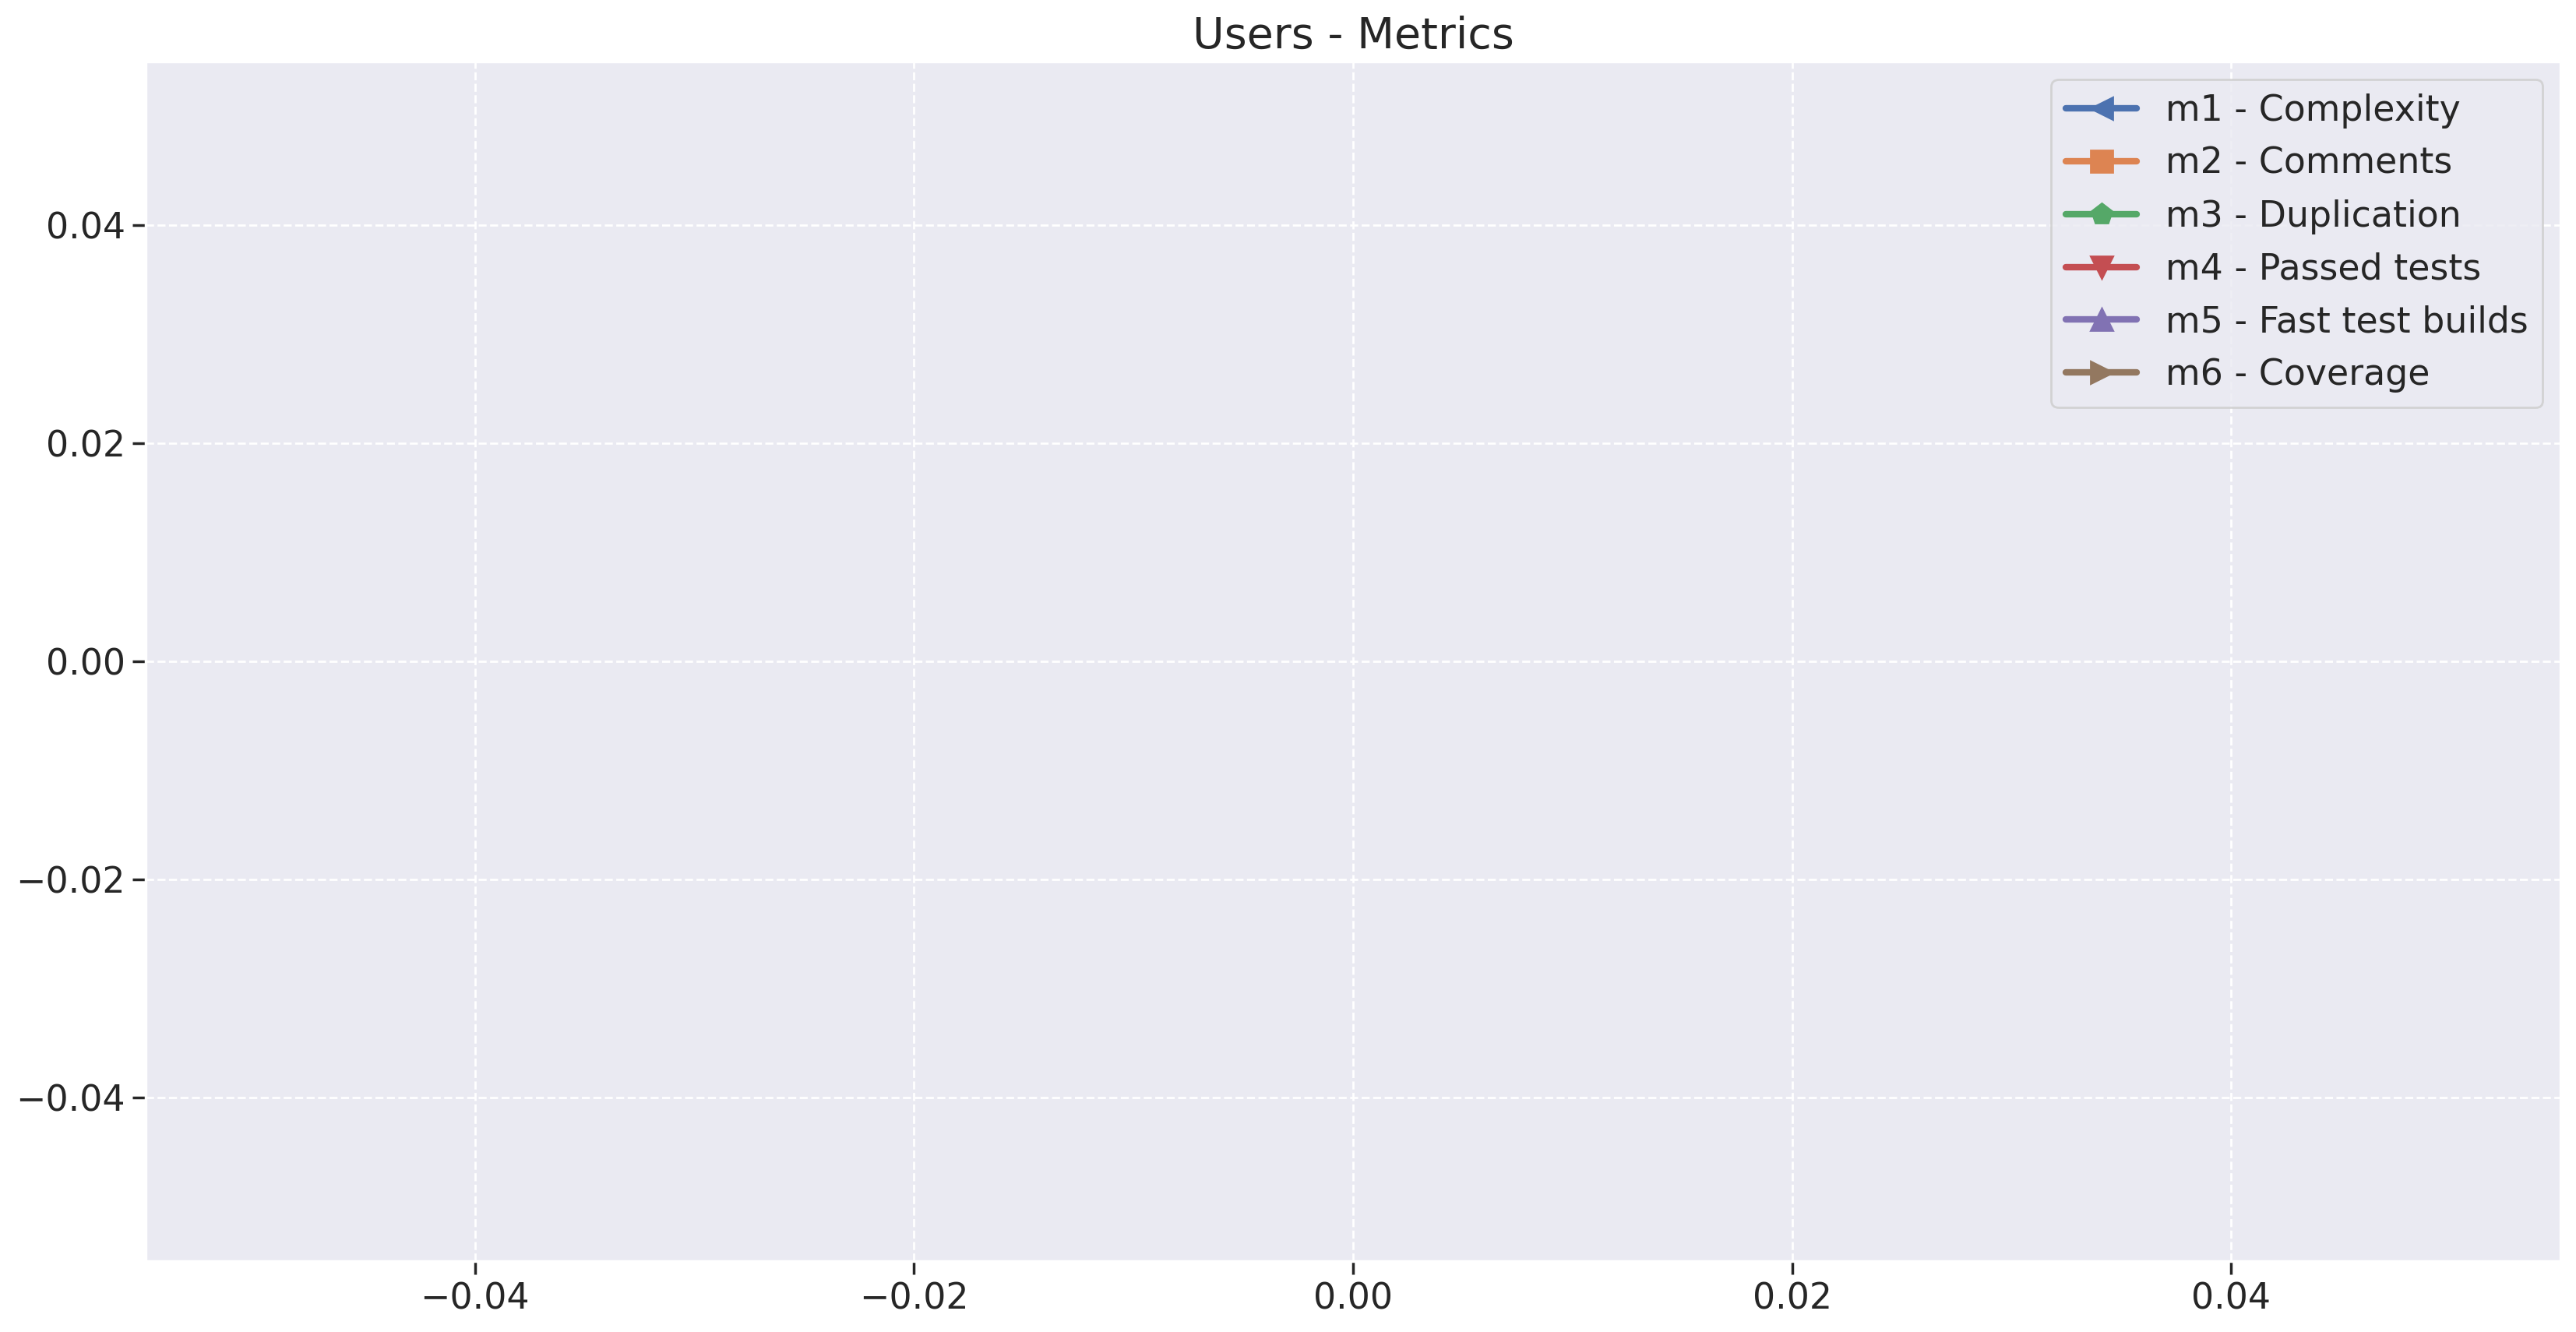

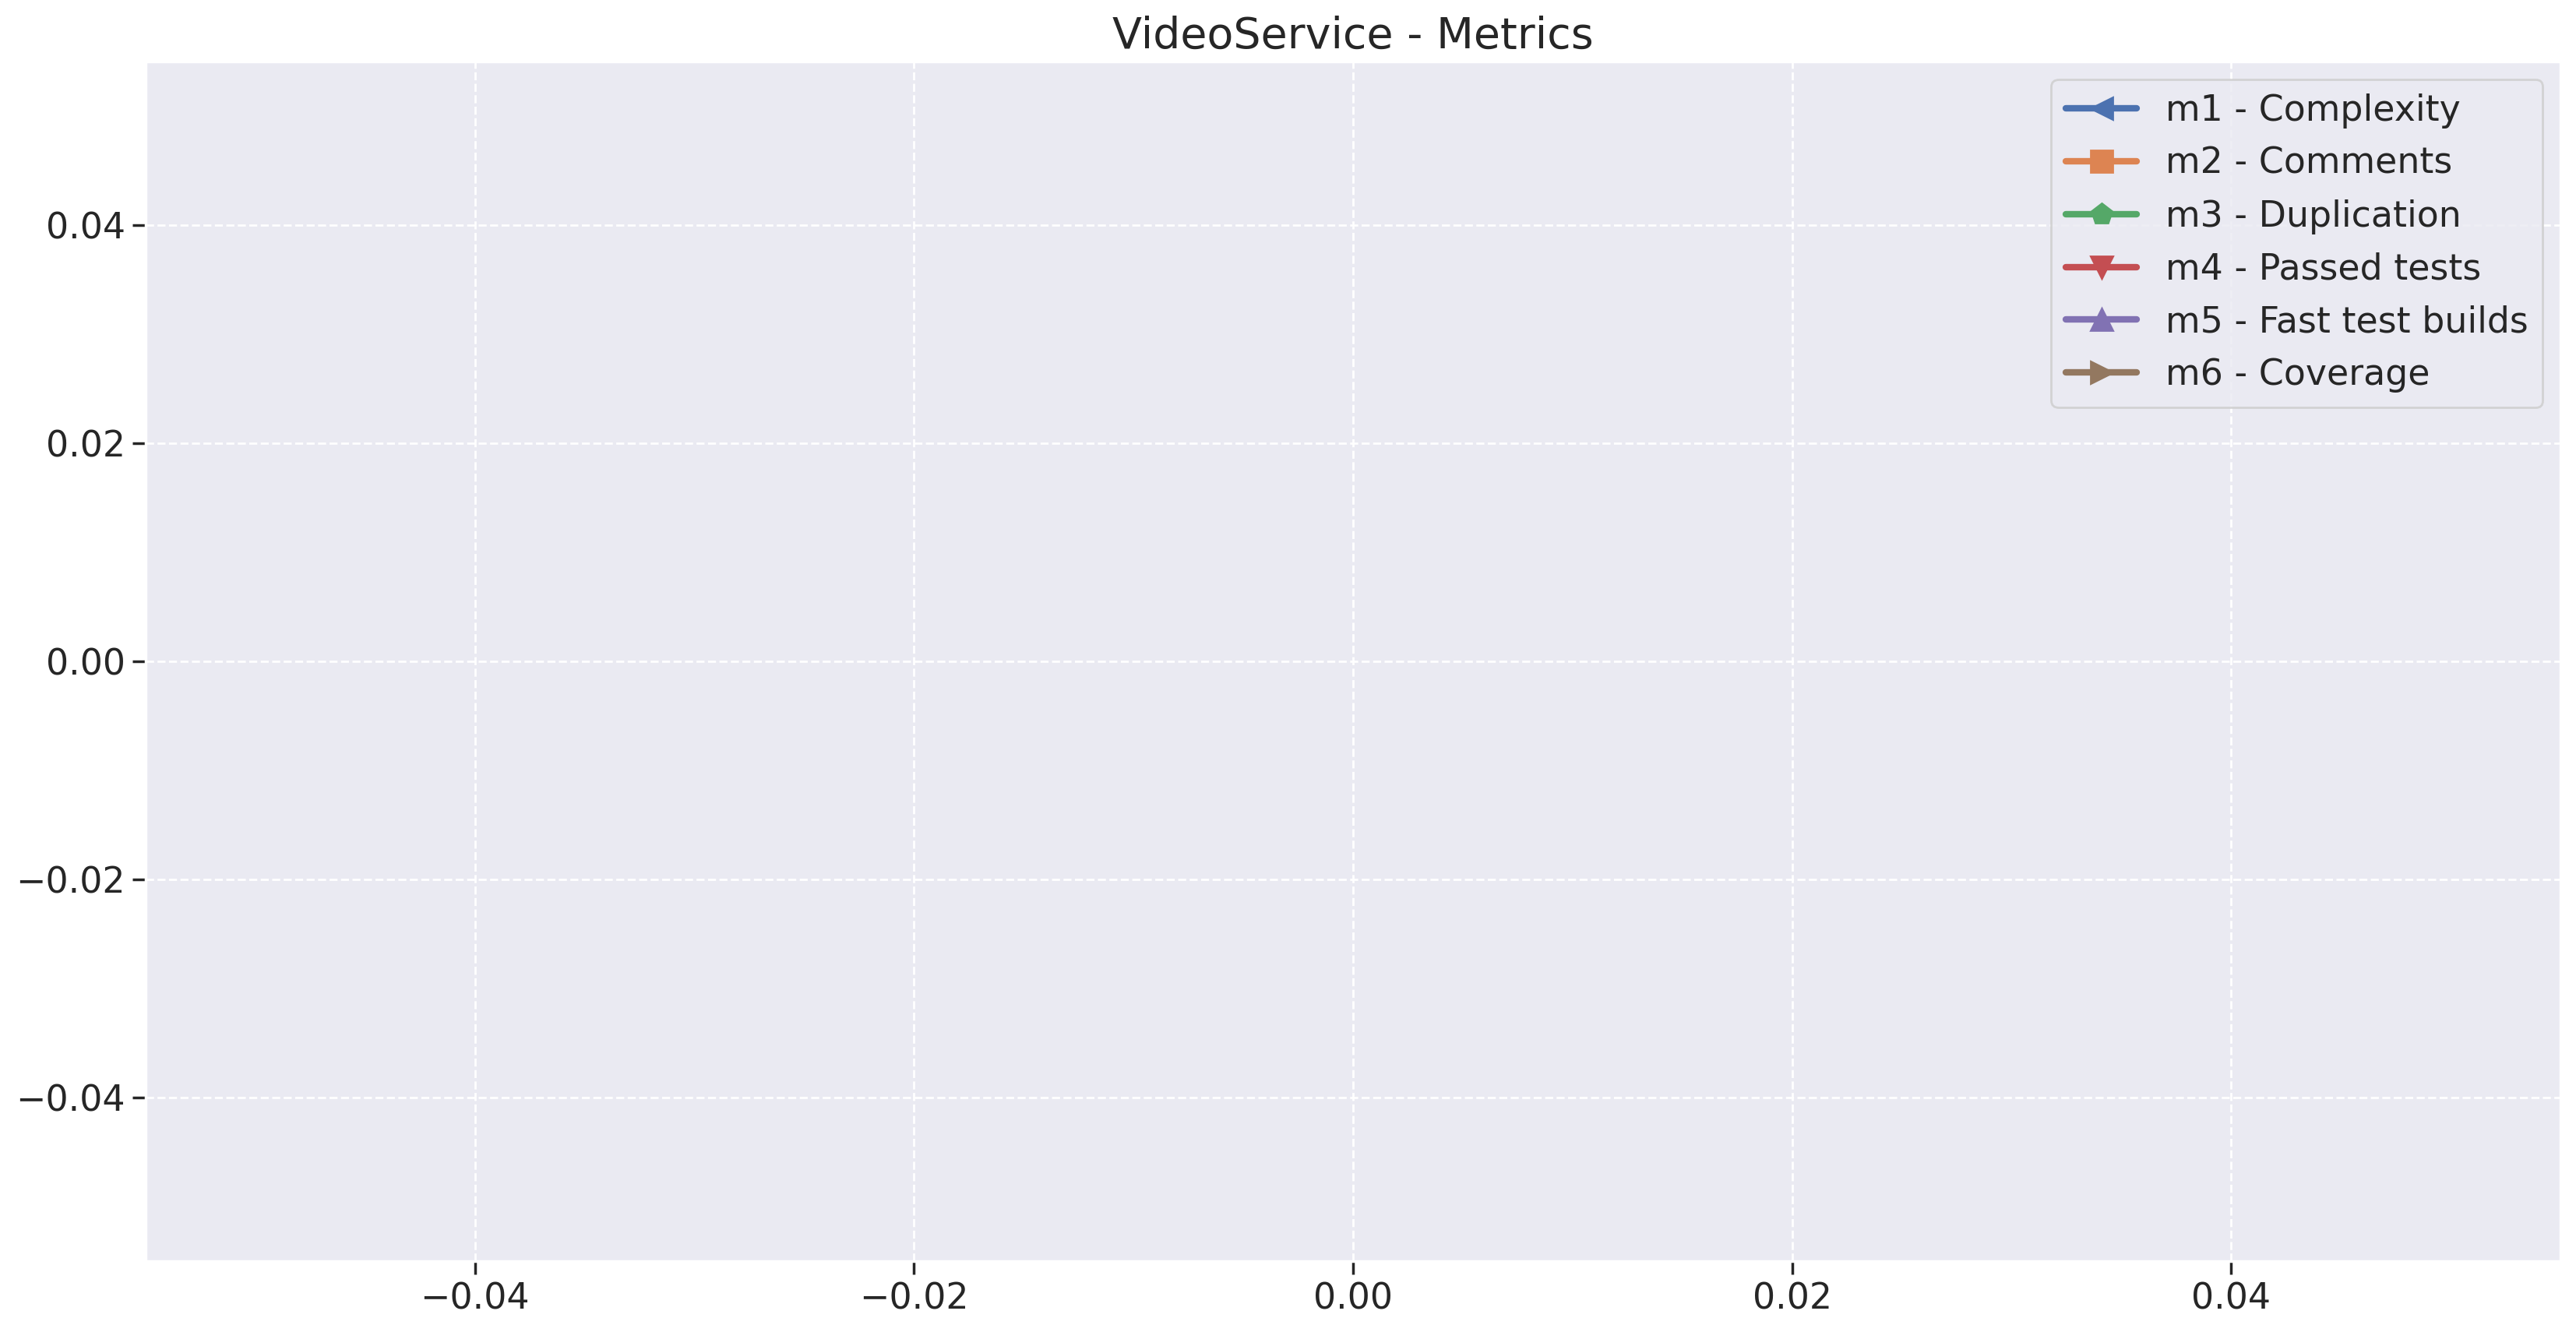

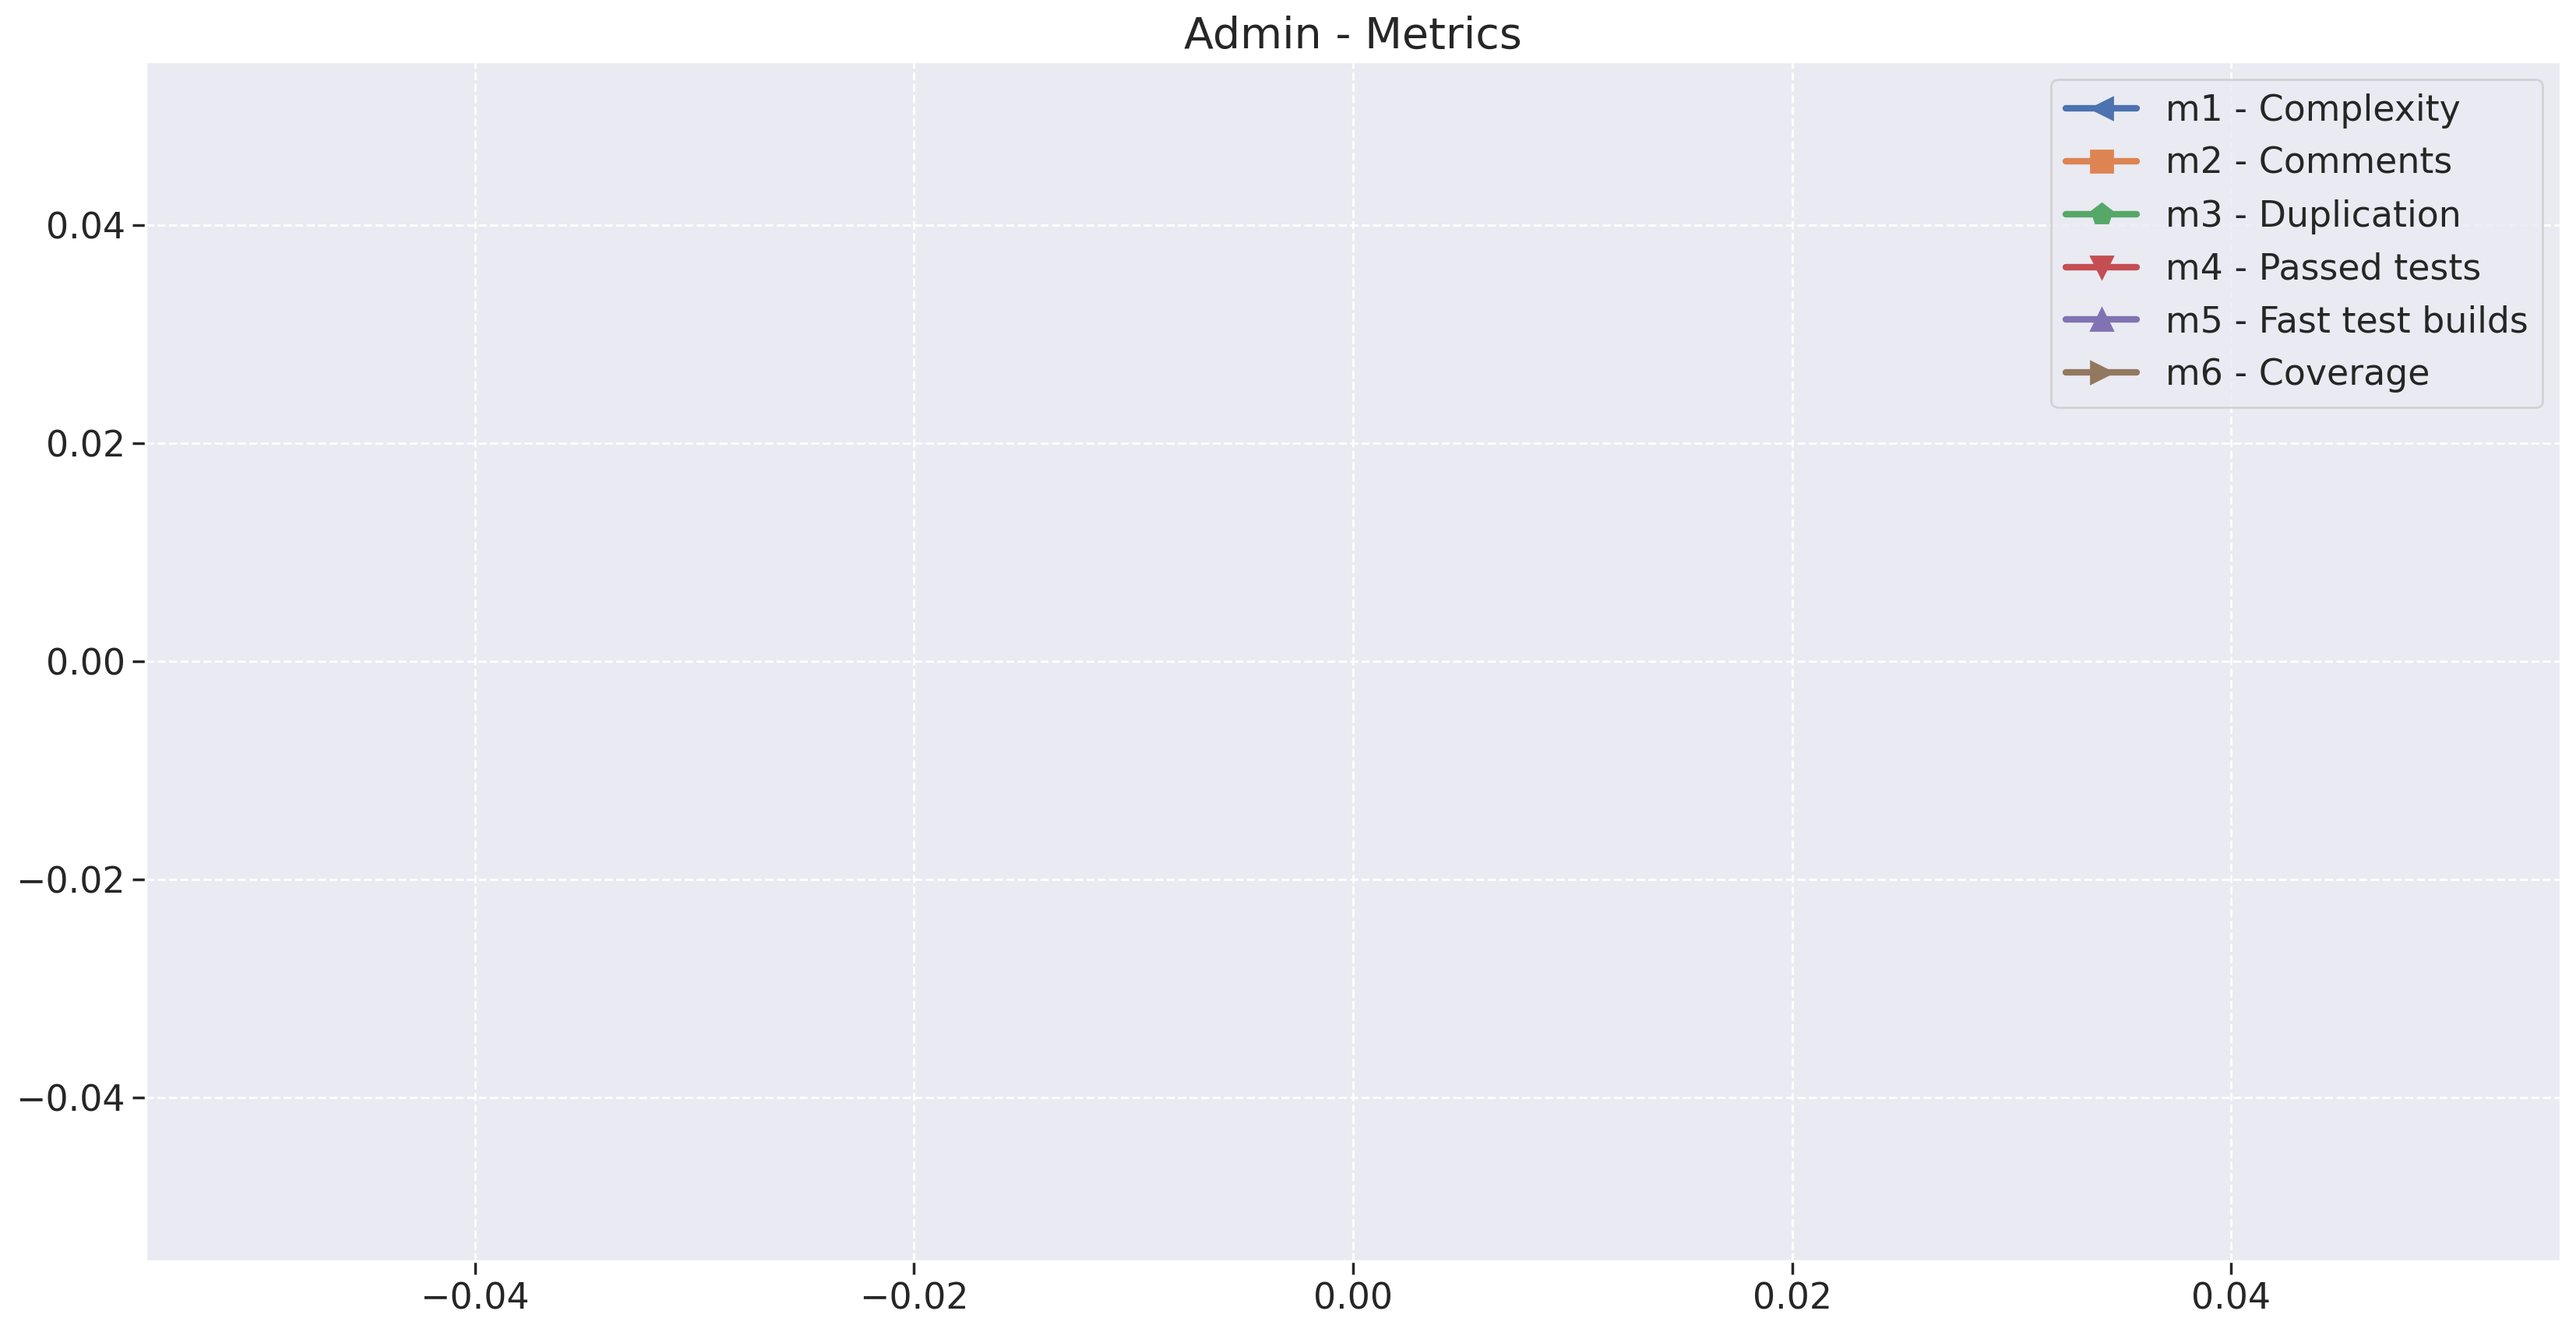

In [40]:
for name, data in metrics.items():
    fig = plt.figure(figsize=(20, 10))

    plt.plot(data['m1'], linewidth=3, marker='<', markersize=10, label="m1 - Complexity")
    plt.plot(data['m2'], linewidth=3, marker='s', markersize=10, label="m2 - Comments")
    plt.plot(data['m3'], linewidth=3, marker='p', markersize=10, label="m3 - Duplication")
    plt.plot(data['m4'], linewidth=3, marker='v', markersize=10, label="m4 - Passed tests")
    plt.plot(data['m5'], linewidth=3, marker='^', markersize=10, label="m5 - Fast test builds")
    plt.plot(data['m6'], linewidth=3, marker='>', markersize=10, label="m6 - Coverage")

    plt.title(f"{name} - Metrics", fontsize=20)
    plt.legend(loc='best')
    plt.show()

## Quality factor and aspect aggregation

In [41]:
psc1 = 1
psc2 = 1
pc1 = 0.5
pc2 = 0.5
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33
pm4 = 0.25
pm5 = 0.25
pm6 = 0.5


# Here you will need to create the code_quality and testing_status metrics for each repository.

for name, data in metrics.items():
    data['code_quality'] = ((data['m1']*pm1) + (data['m2']*pm2) + (data['m3']*pm3)) * psc1
    data['testing_status'] = ((data['m4']*pm4) + (data['m5']*pm5) + (data['m6']*pm6)) * psc2

### Code Quality visualization

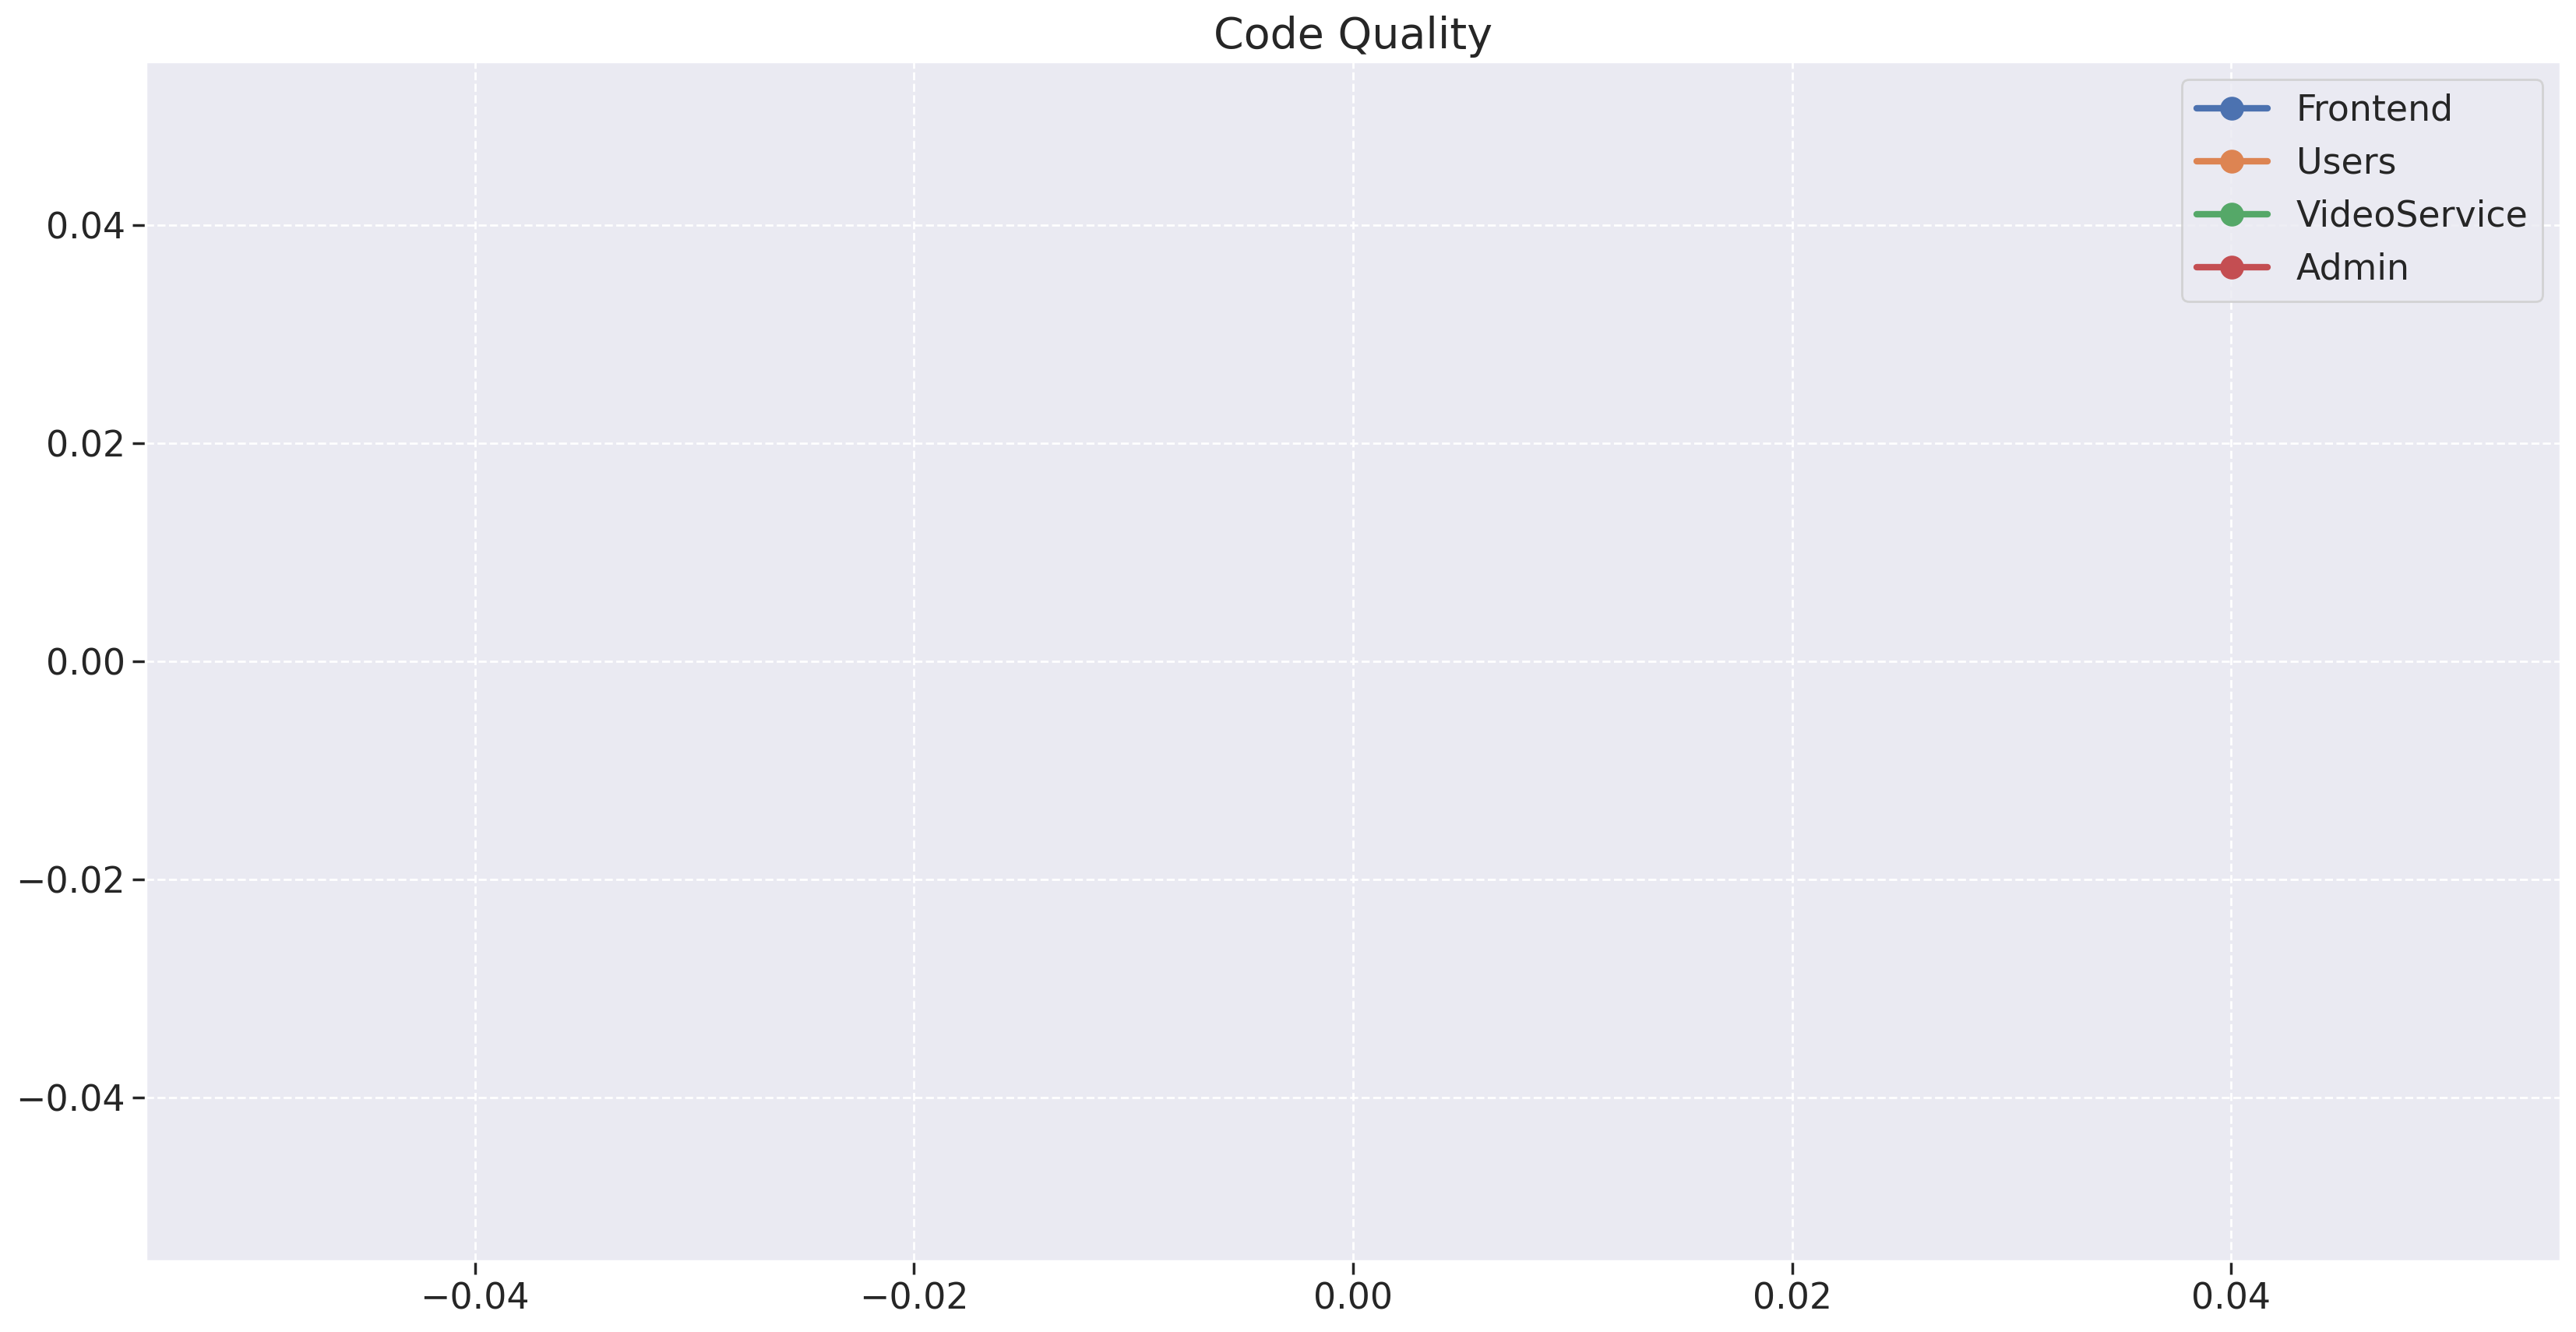

In [42]:
fig = plt.figure(figsize=(20, 10))

for name, data in metrics.items():
    plt.plot(data['code_quality'], linewidth=3, marker='o', markersize=10, label=name)

plt.title("Code Quality", fontsize=20)
plt.legend(loc='best')
plt.show()

### Testing Status visualization

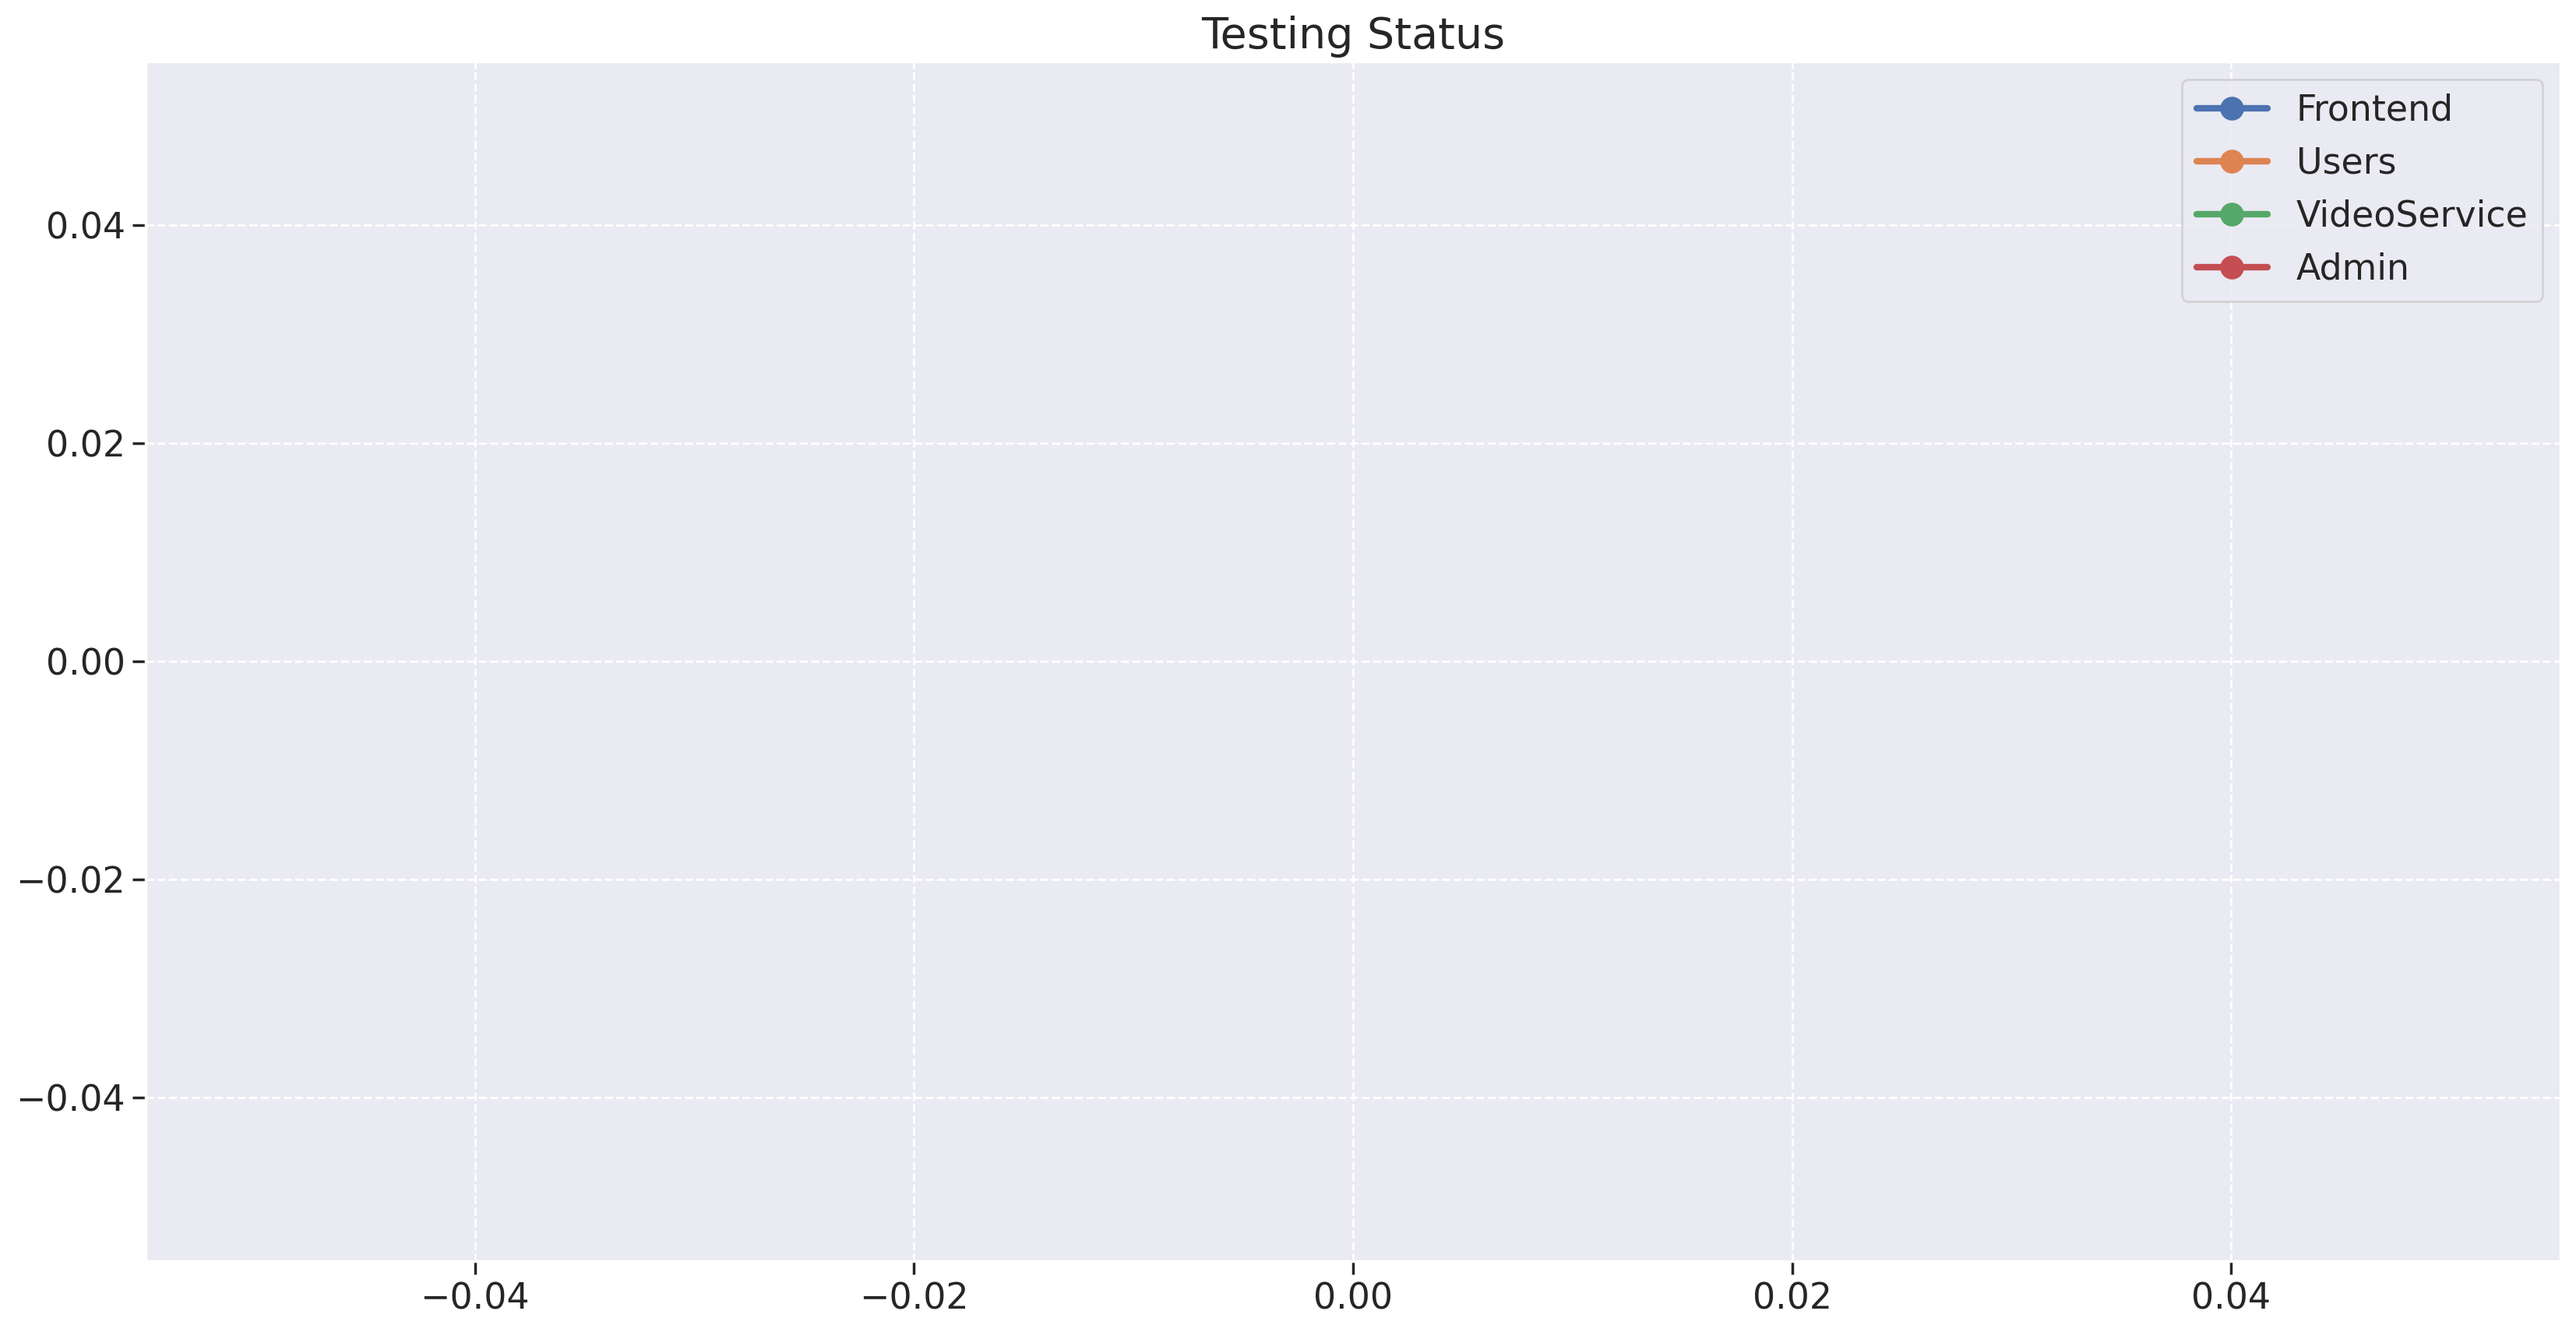

In [43]:
fig = plt.figure(figsize=(20, 10))

for name, data in metrics.items():
    plt.plot(data['testing_status'], linewidth=3, marker='o', markersize=10, label=name)

plt.title("Testing Status", fontsize=20)
plt.legend(loc='best')
plt.show()

### Aggregations

In [54]:
for name, data in metrics.items():
    data['Maintainability'] = data['code_quality'] * pc1
    data['Reliability'] = data['testing_status'] * pc2
    data['total'] = data['Maintainability'] + data['Reliability']

## Repositories analysis

In [55]:
def get_characteristc_stats(repo_series):
    return {
        'mean': repo_series.mean(),
        'mode': repo_series.mode(),
        'median': repo_series.median(),
        'std': repo_series.std(),
        'var': repo_series.var(),
        'min': repo_series.min(),
        'max': repo_series.max()
    }

In [56]:
def analysis(metrics, name):
    maintainability_stats = pd.DataFrame(get_characteristc_stats(metrics["Maintainability"]),
                                     columns=['mean', 'mode', 'median', 'std', 'var', 'min', 'max'])

    reliability_stats = pd.DataFrame(get_characteristc_stats(metrics["Reliability"]),
                                 columns=['mean', 'mode', 'median', 'std', 'var', 'min', 'max'])


    print("Maintainability Stats")
    print(maintainability_stats.to_string(index=False))

    print("Reliability Stats")
    print(reliability_stats.to_string(index=False))

    fig = plt.figure(figsize=(20, 10))

    plt.plot(metrics['Maintainability'], linewidth=3, marker='o', markersize=10, label="Maintainability")
    plt.plot(metrics['Reliability'], linewidth=3, marker='*', markersize=10, label="Reliability")

    plt.ylim(0.1,1.1)
    plt.title(f'{name} - Maintainability and Reliability', fontsize=20)
    plt.legend(loc='best')
    plt.show()

    fig = plt.figure(figsize=(20, 10))

    plt.plot(metrics['total'], linewidth=3, marker='X', markersize=5)

    plt.ylim(0.1,1.1)
    plt.title(f'{name} - Total', fontsize=20)
    plt.show()

### Analysis loop in each repo

Frontend
Maintainability Stats
Empty DataFrame
Columns: [mean, mode, median, std, var, min, max]
Index: []
Reliability Stats
Empty DataFrame
Columns: [mean, mode, median, std, var, min, max]
Index: []


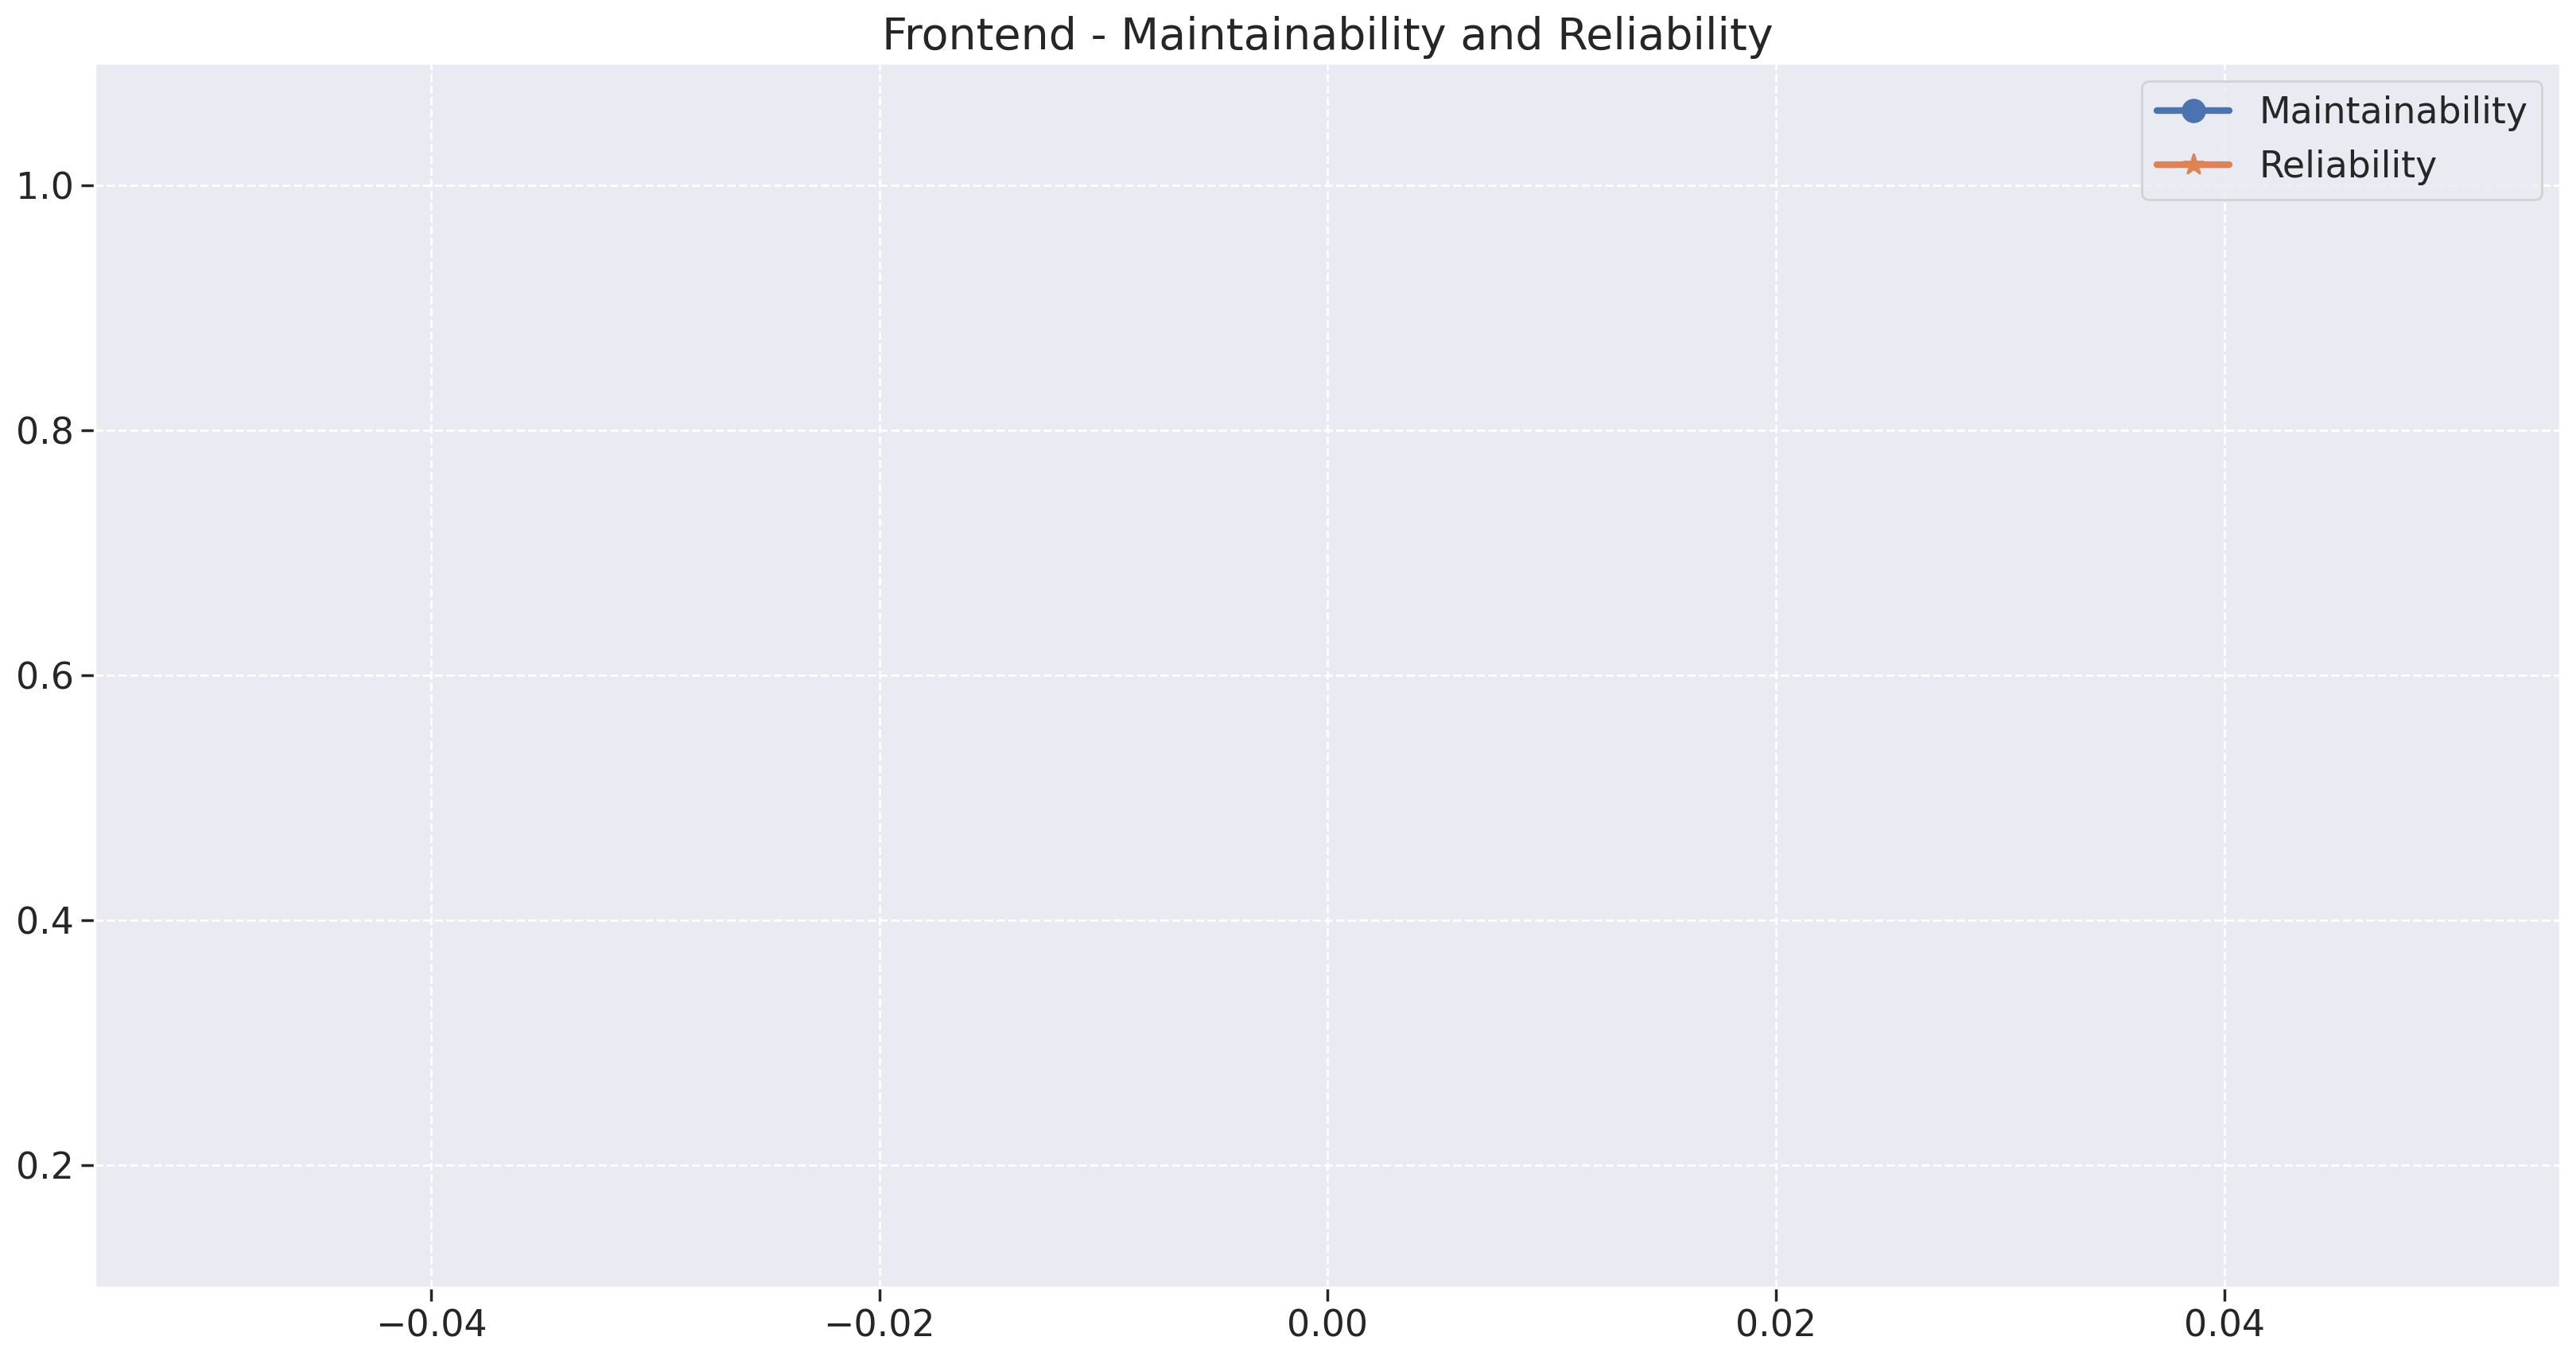

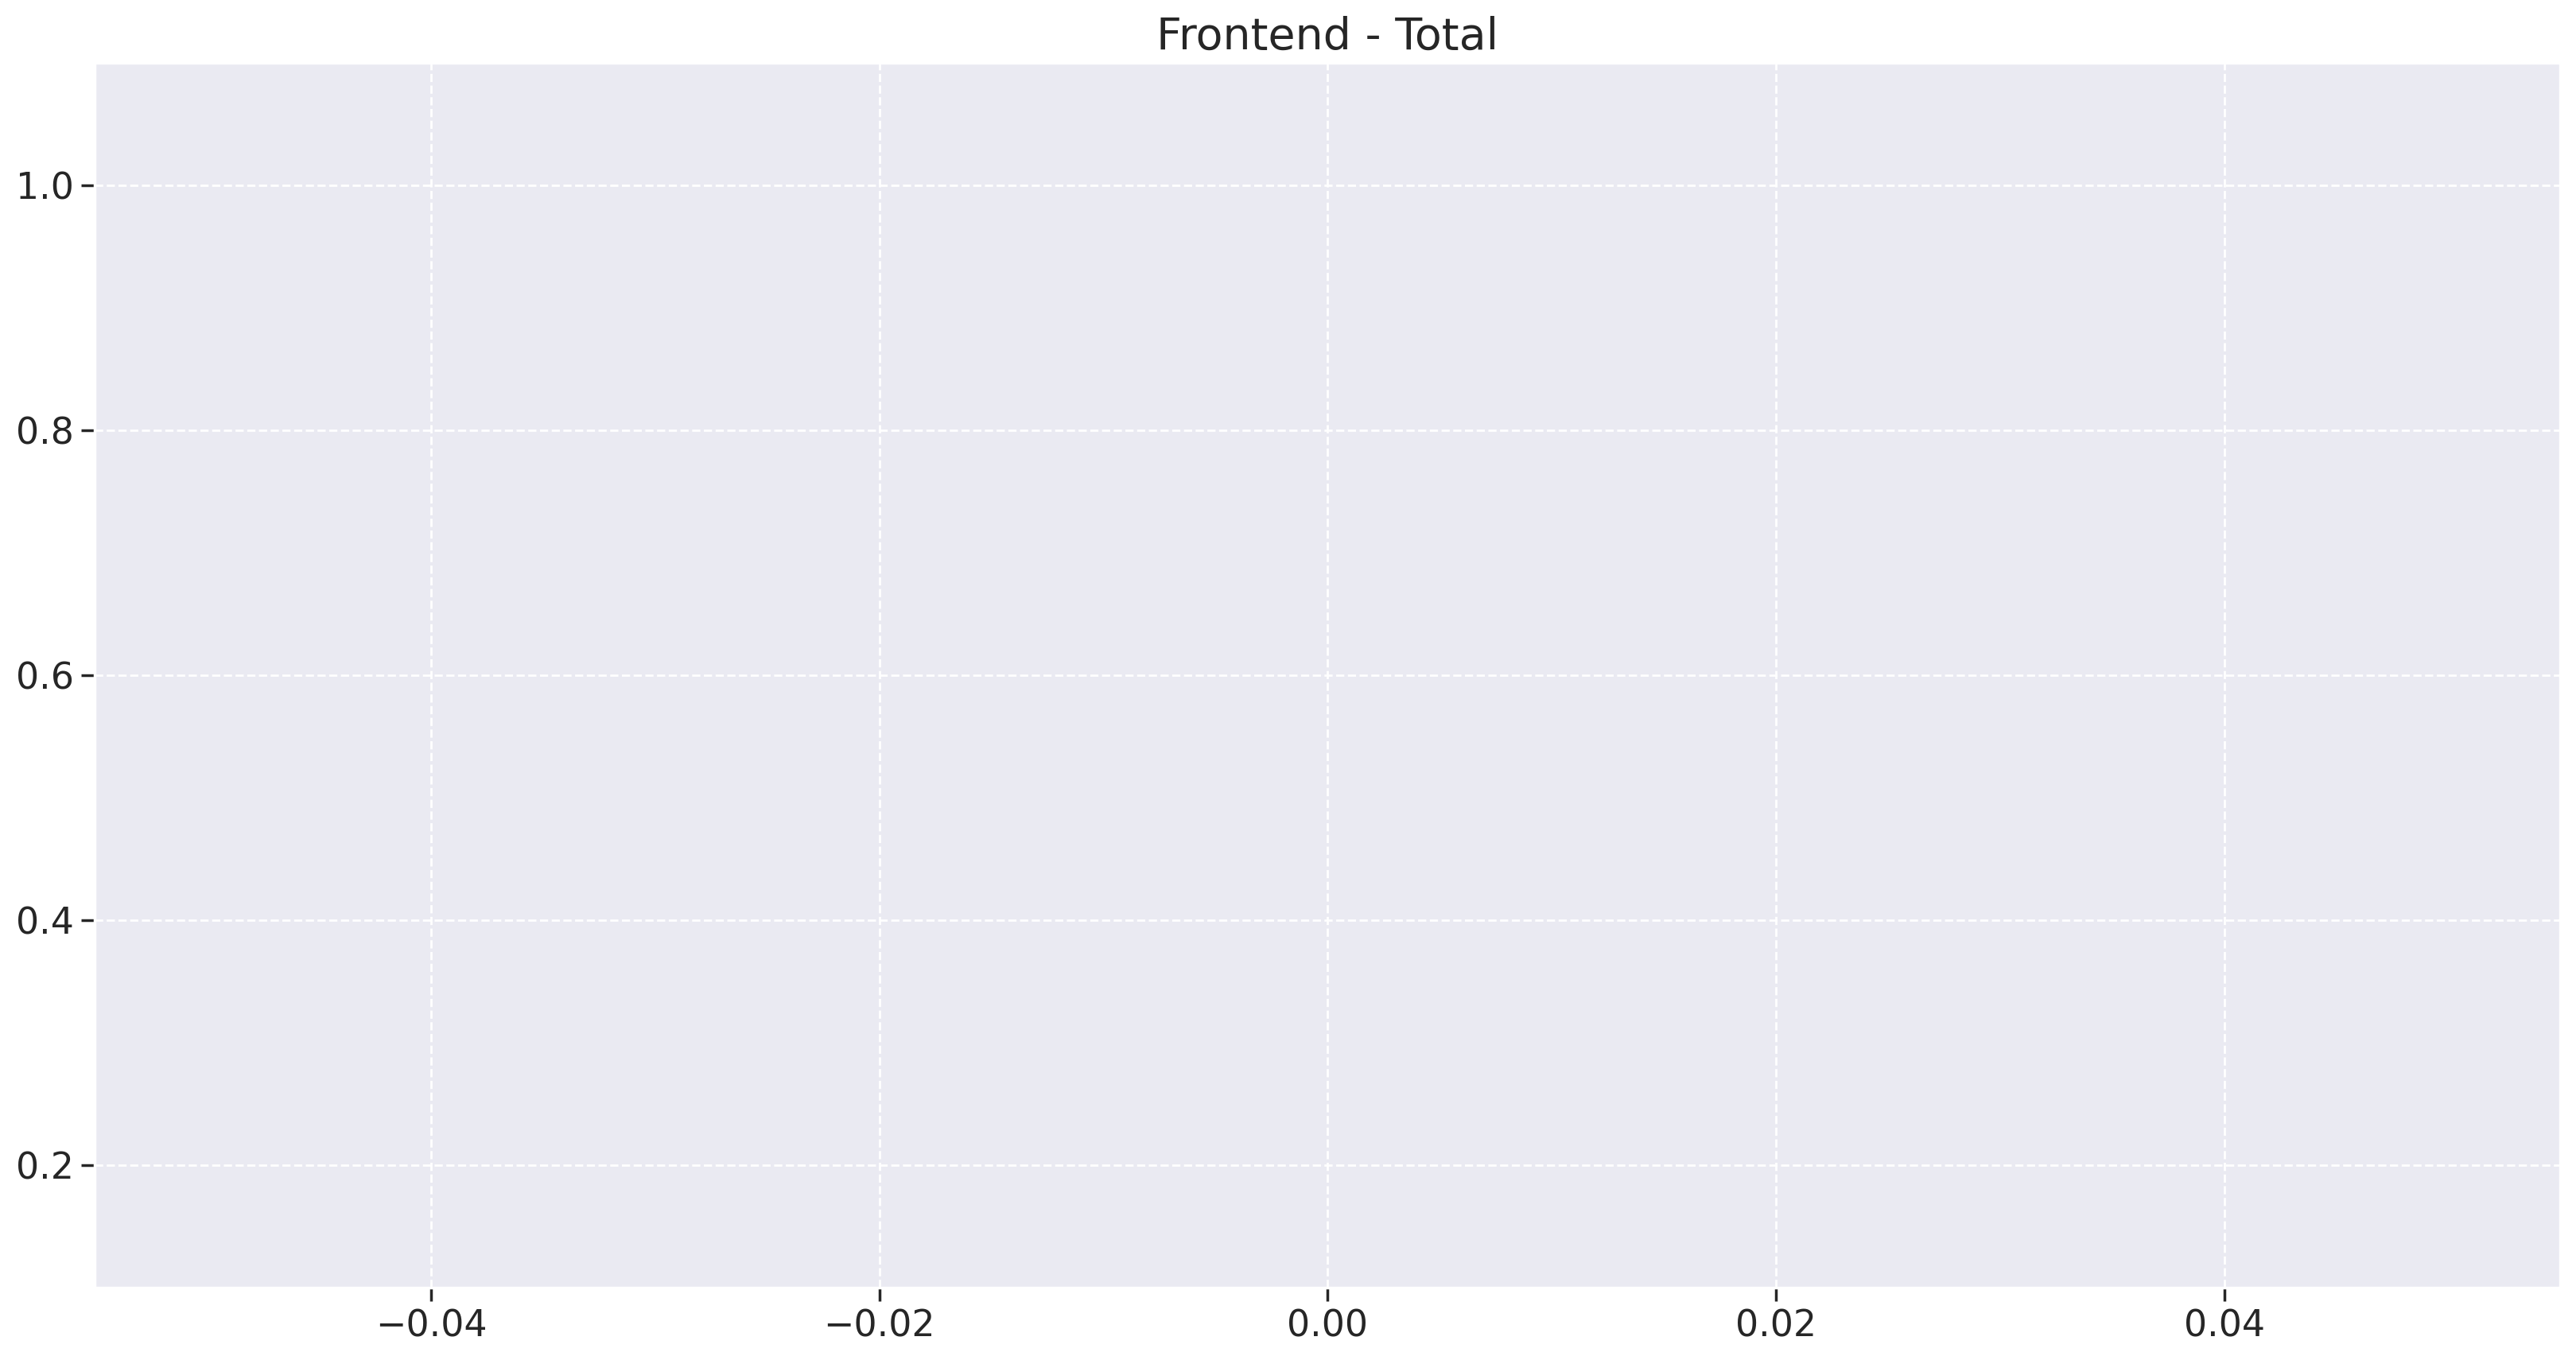

Users
Maintainability Stats
Empty DataFrame
Columns: [mean, mode, median, std, var, min, max]
Index: []
Reliability Stats
Empty DataFrame
Columns: [mean, mode, median, std, var, min, max]
Index: []


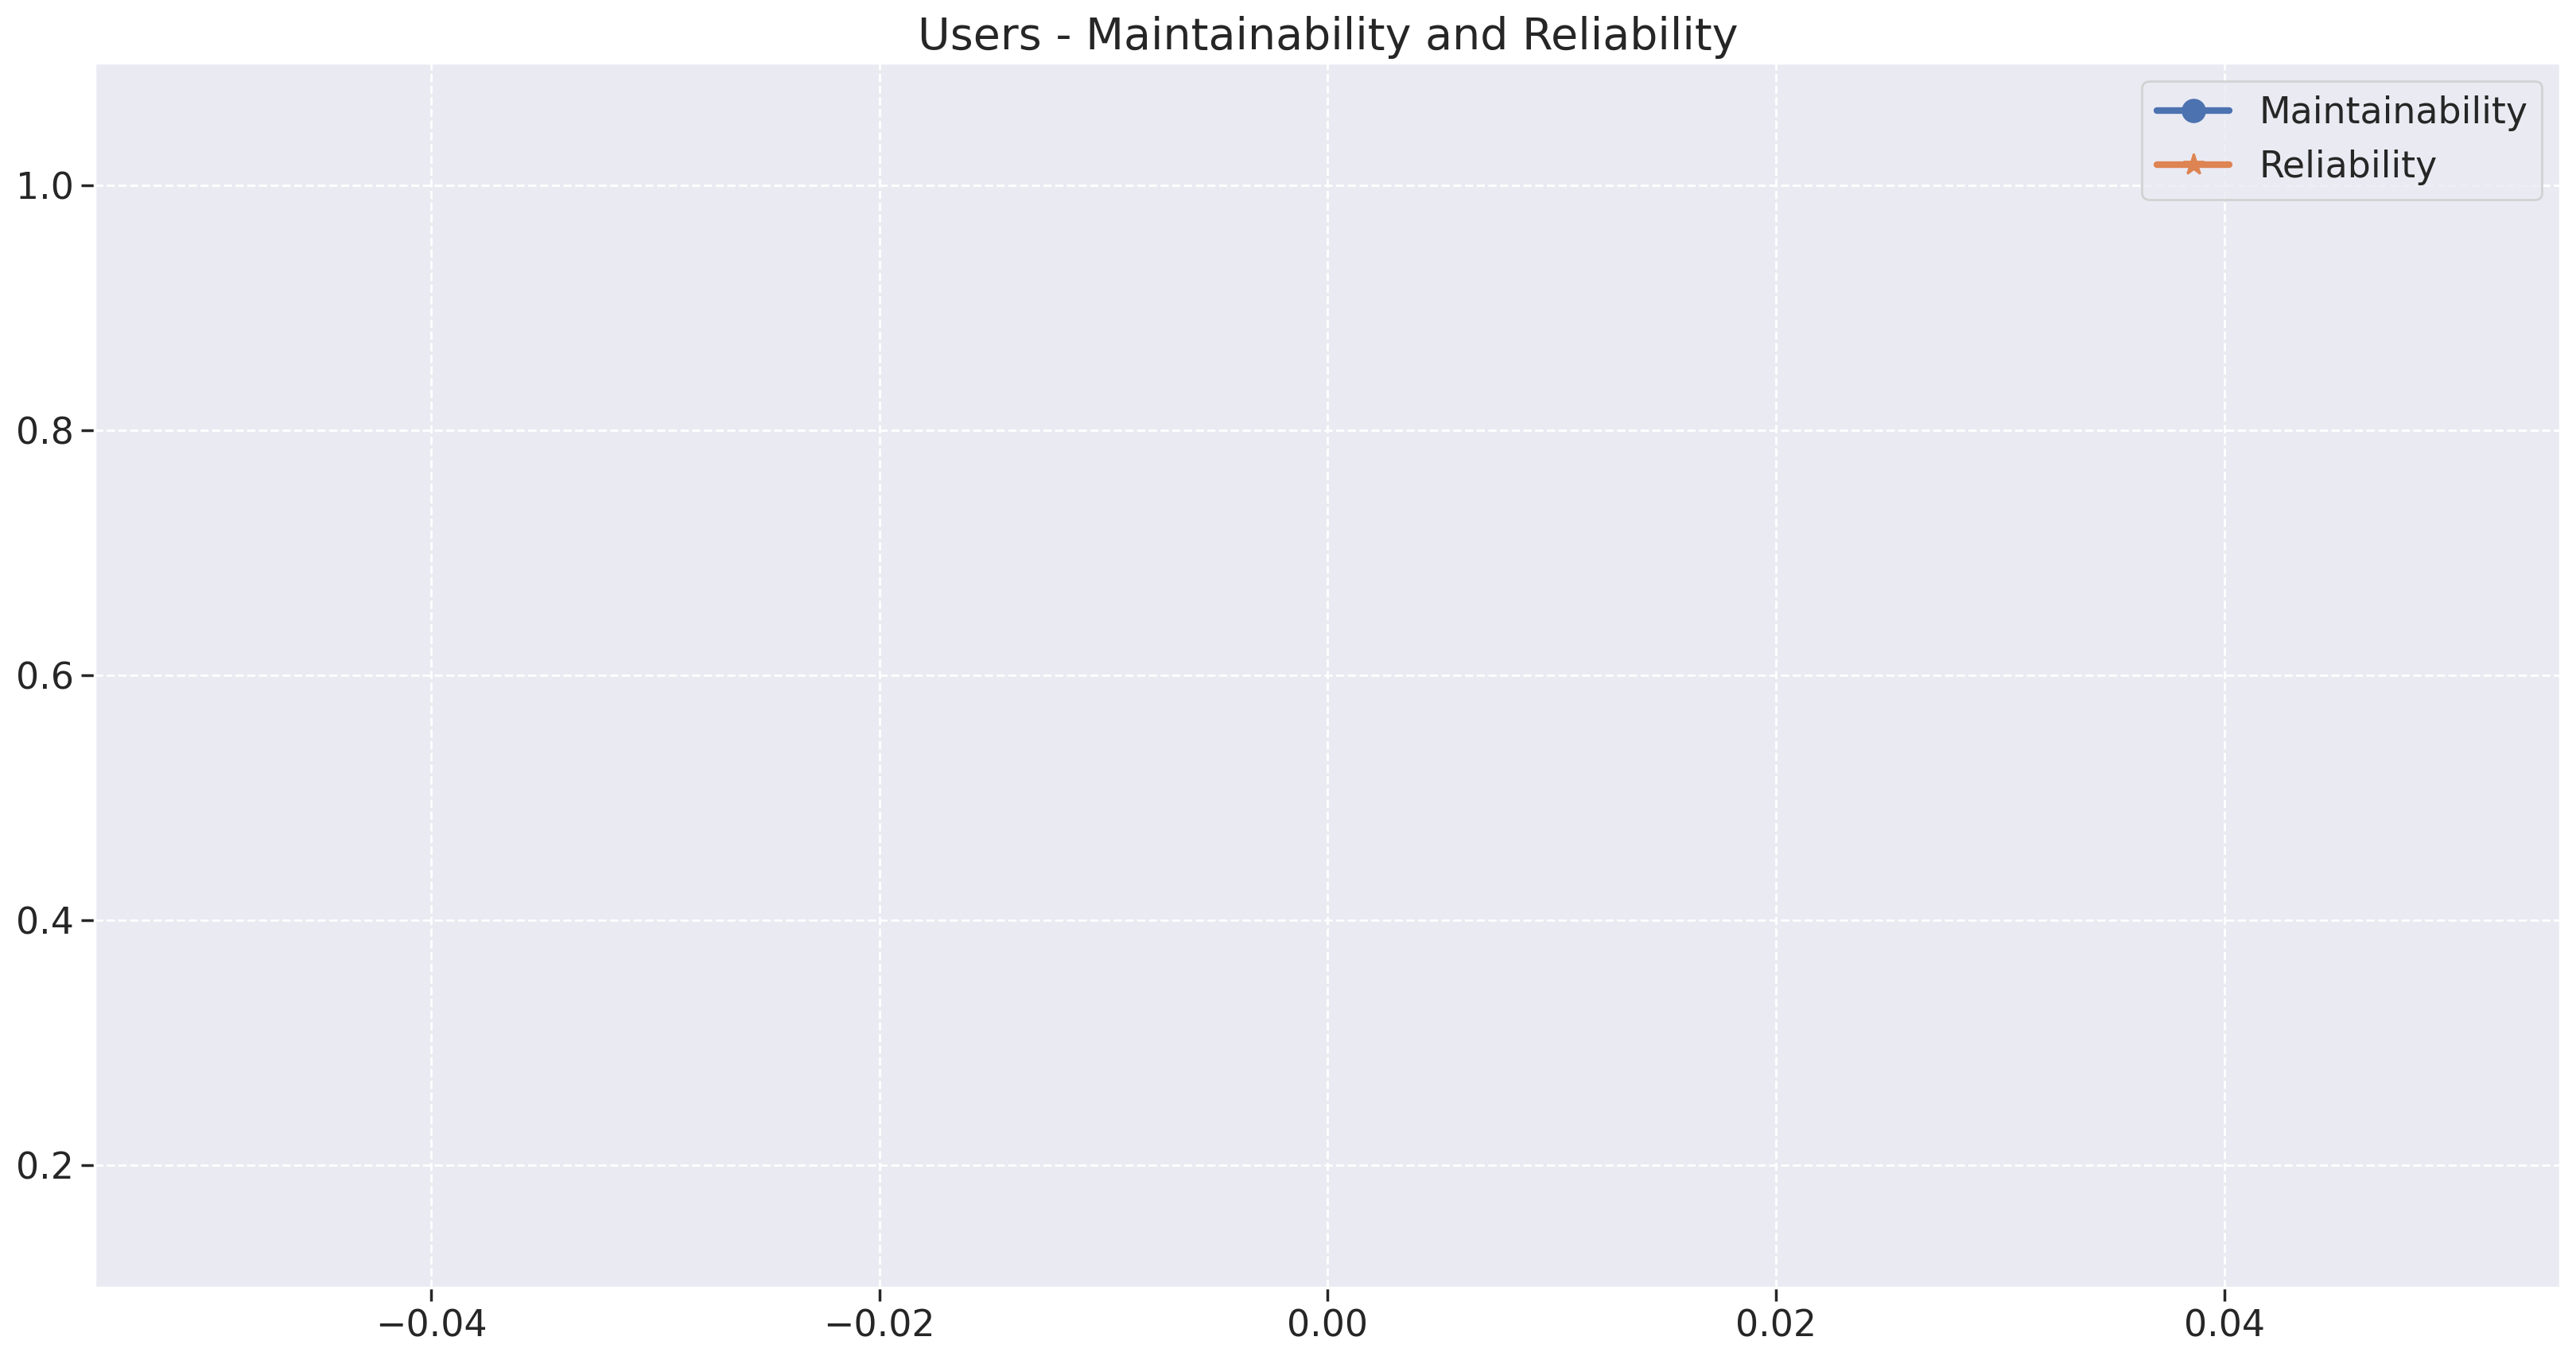

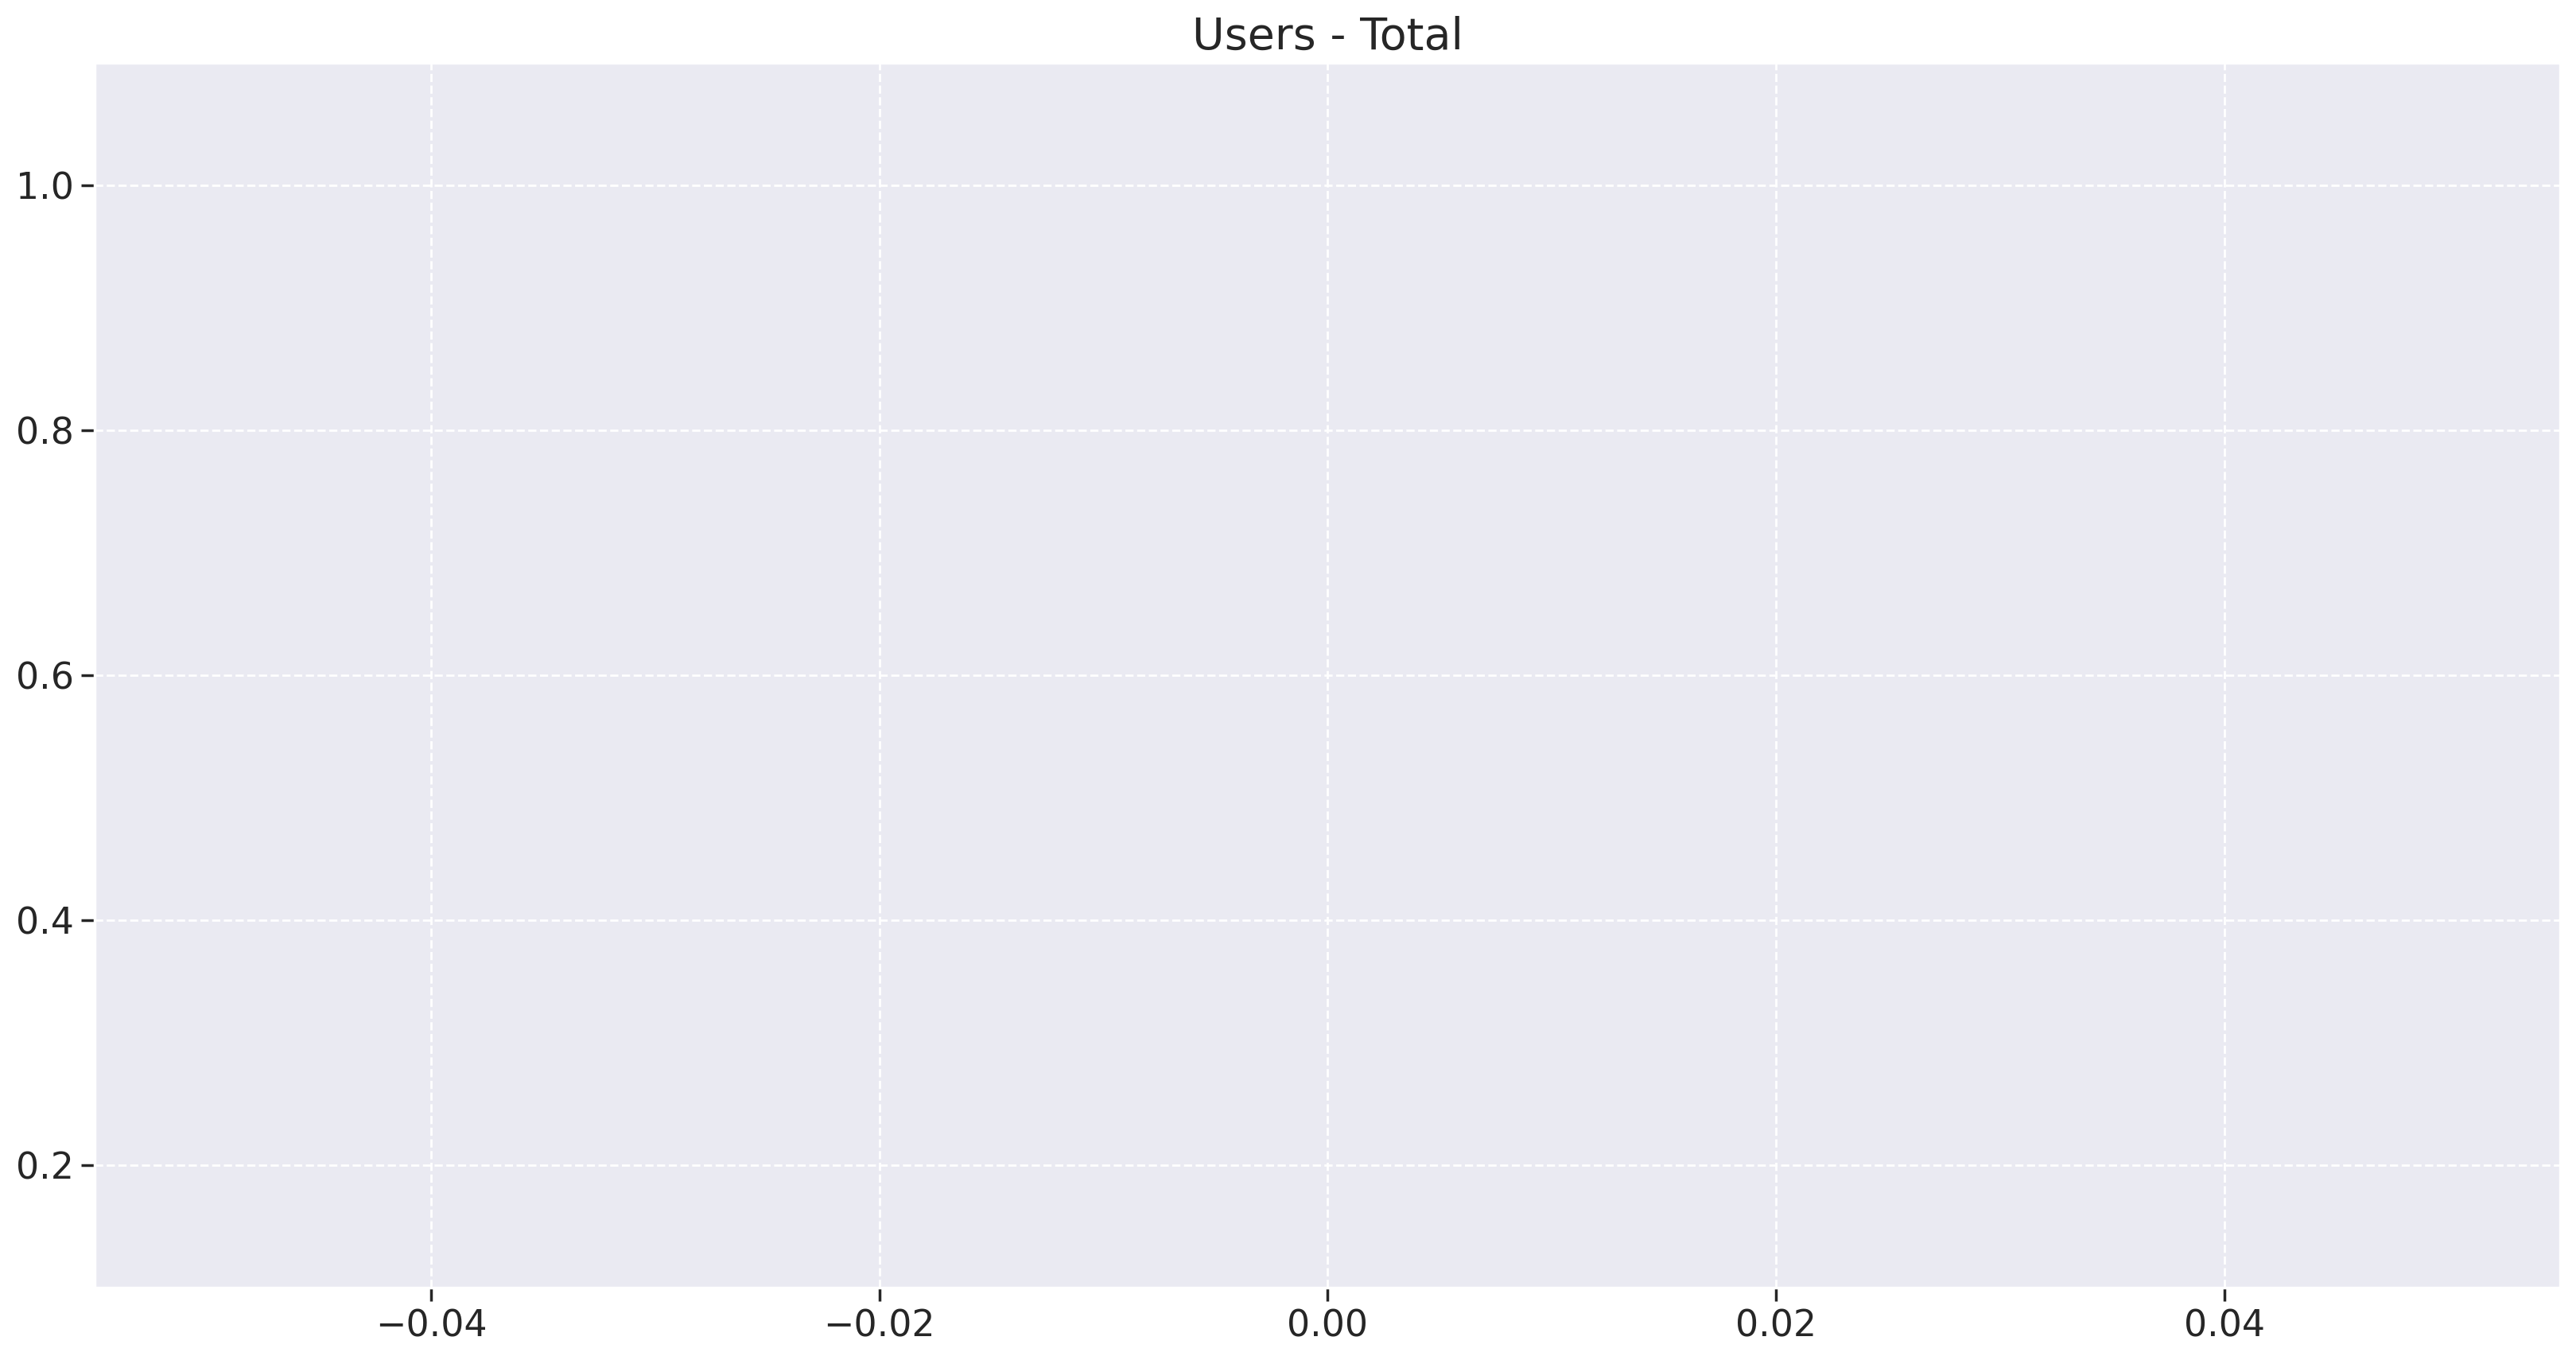

VideoService
Maintainability Stats
Empty DataFrame
Columns: [mean, mode, median, std, var, min, max]
Index: []
Reliability Stats
Empty DataFrame
Columns: [mean, mode, median, std, var, min, max]
Index: []


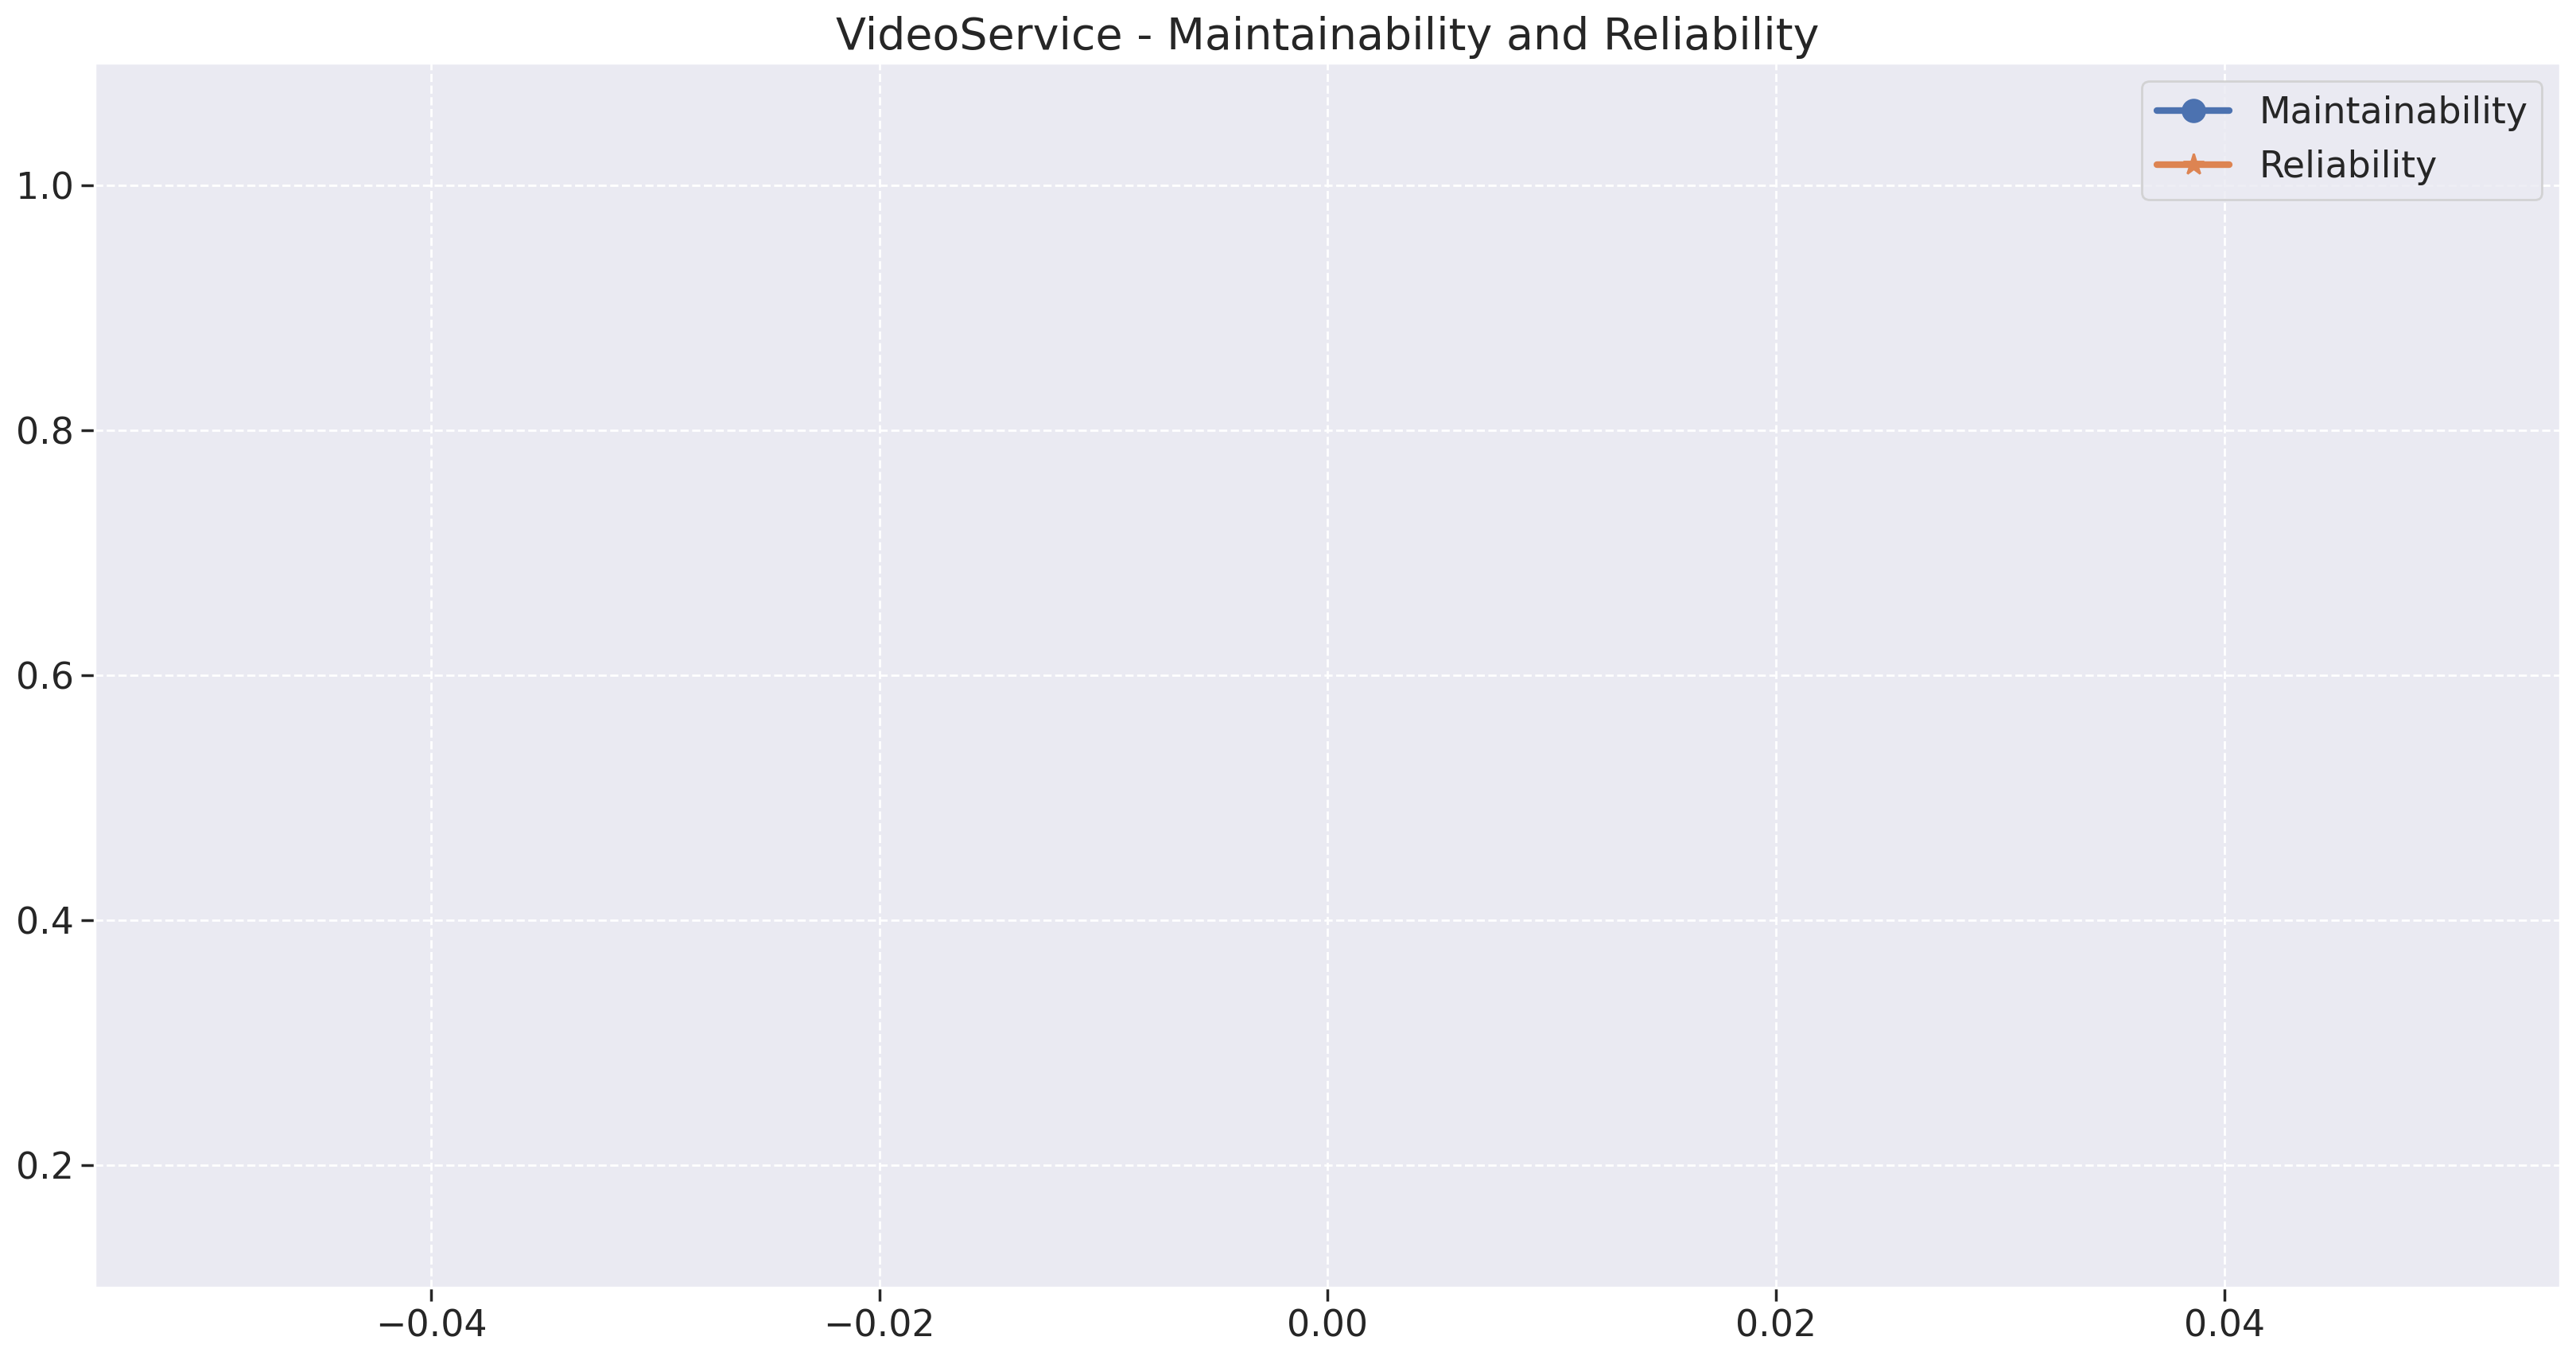

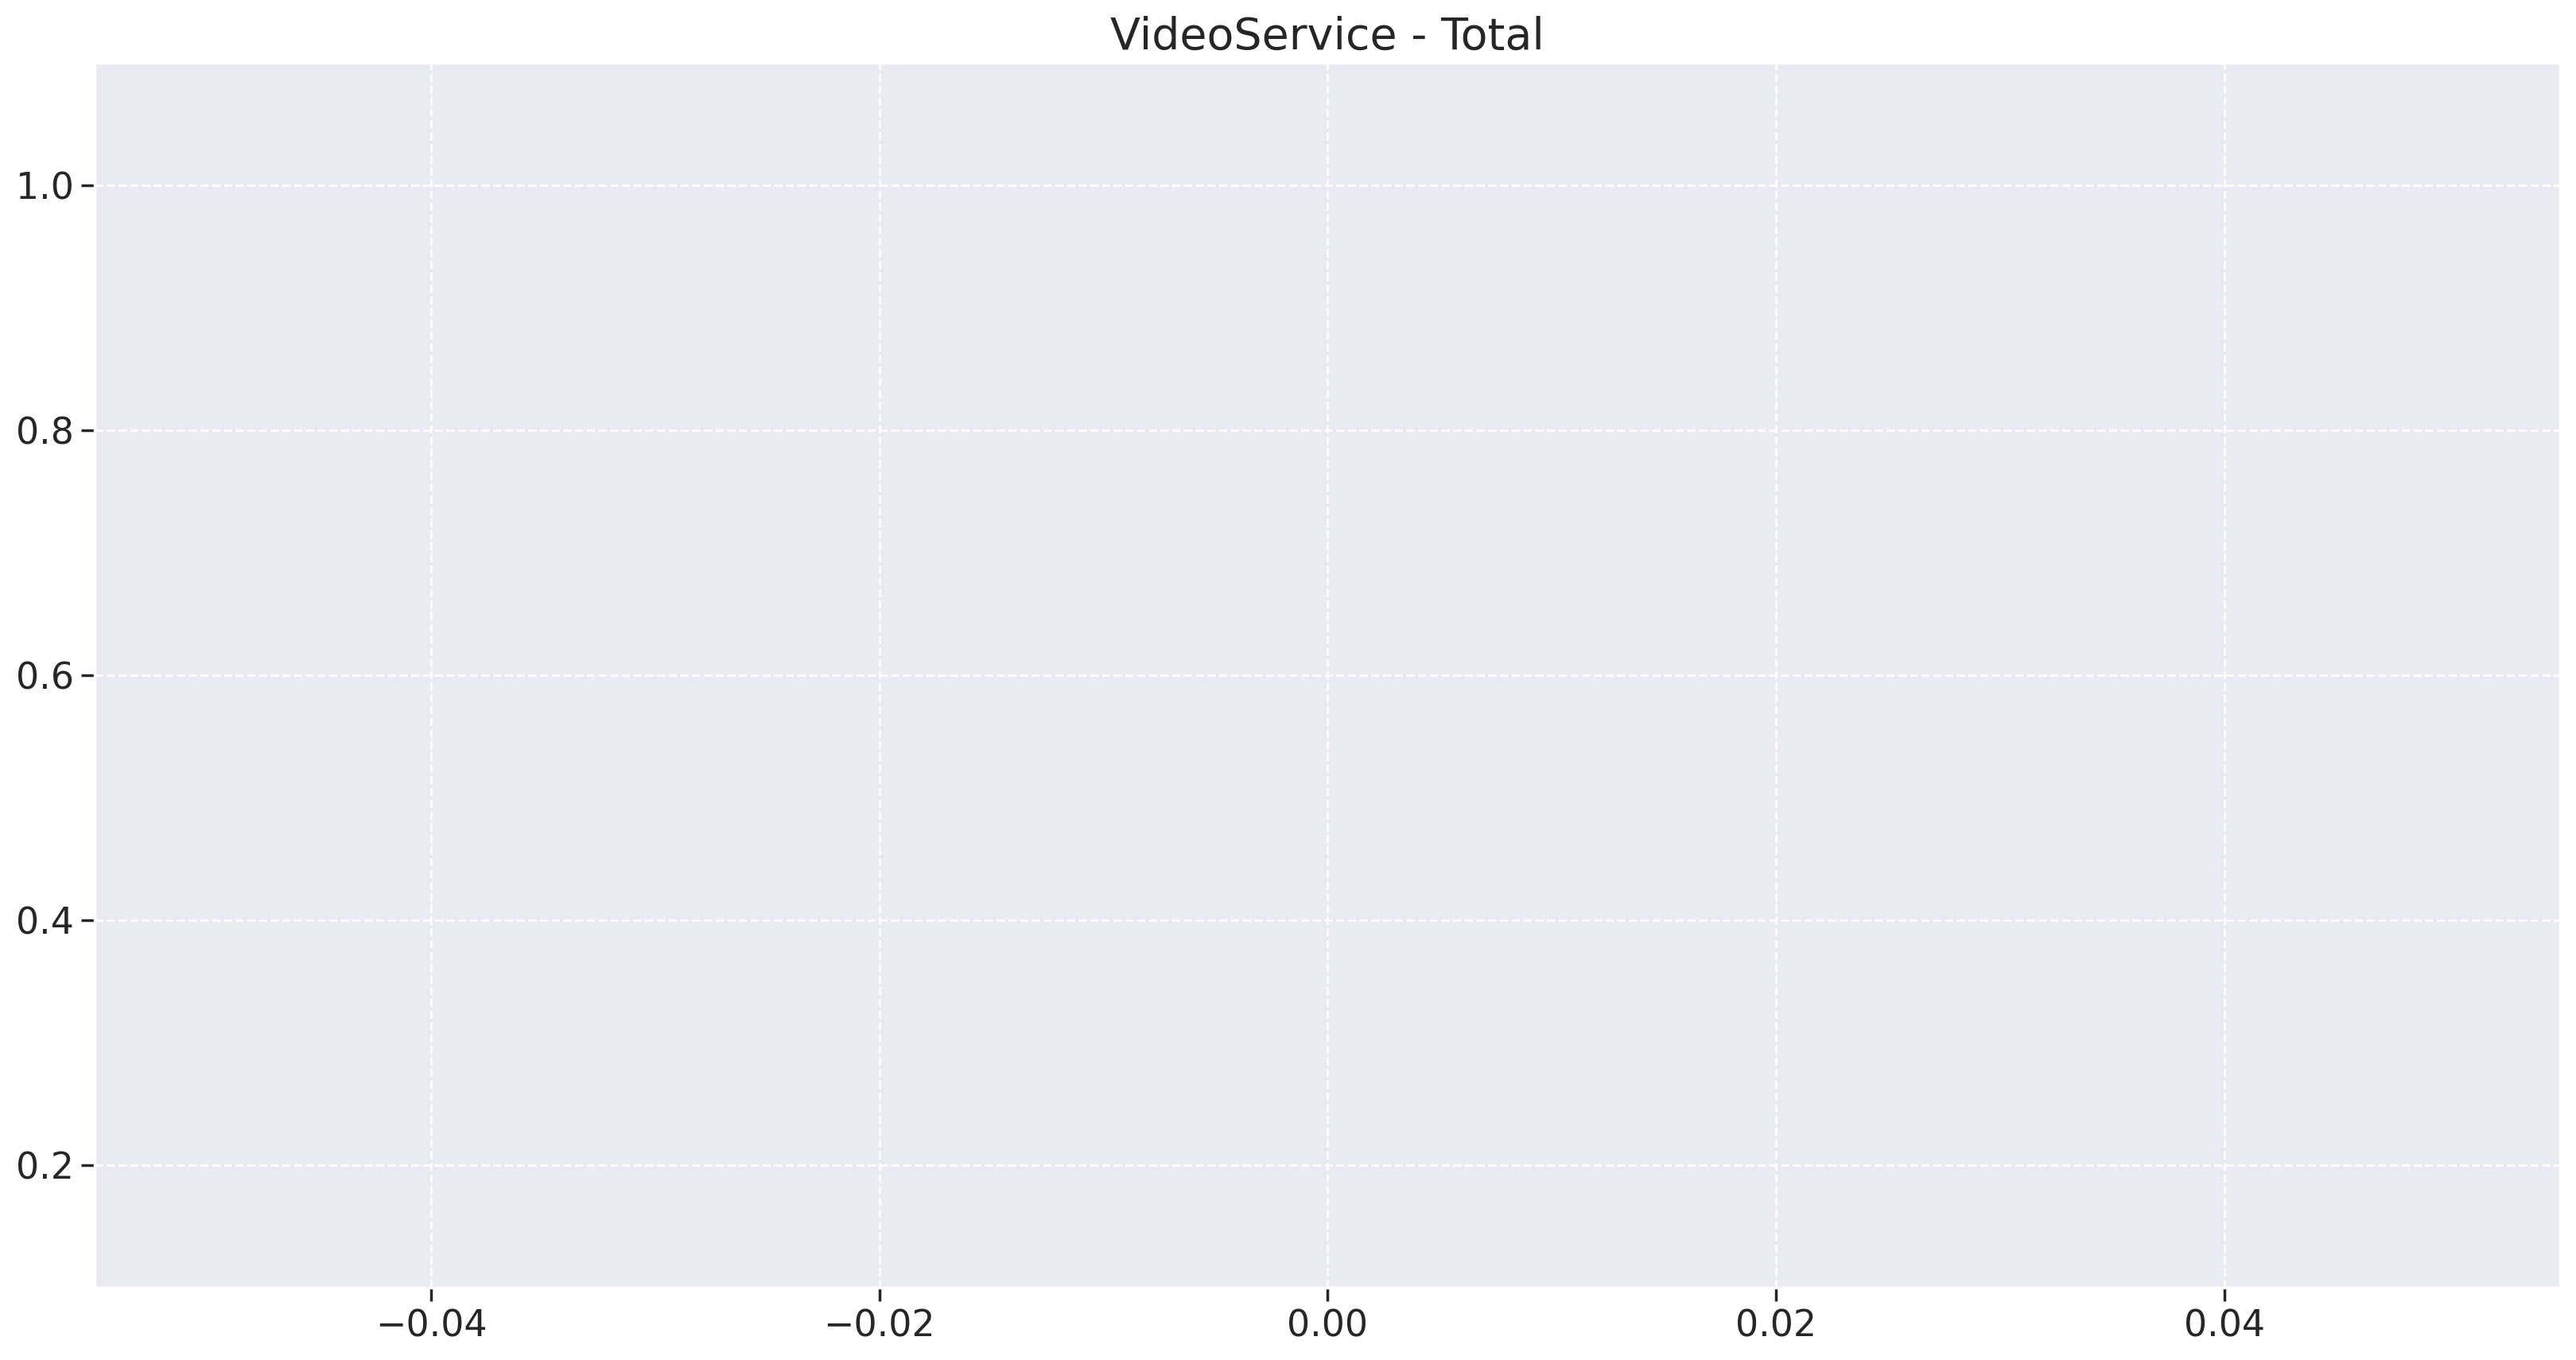

Admin
Maintainability Stats
Empty DataFrame
Columns: [mean, mode, median, std, var, min, max]
Index: []
Reliability Stats
Empty DataFrame
Columns: [mean, mode, median, std, var, min, max]
Index: []


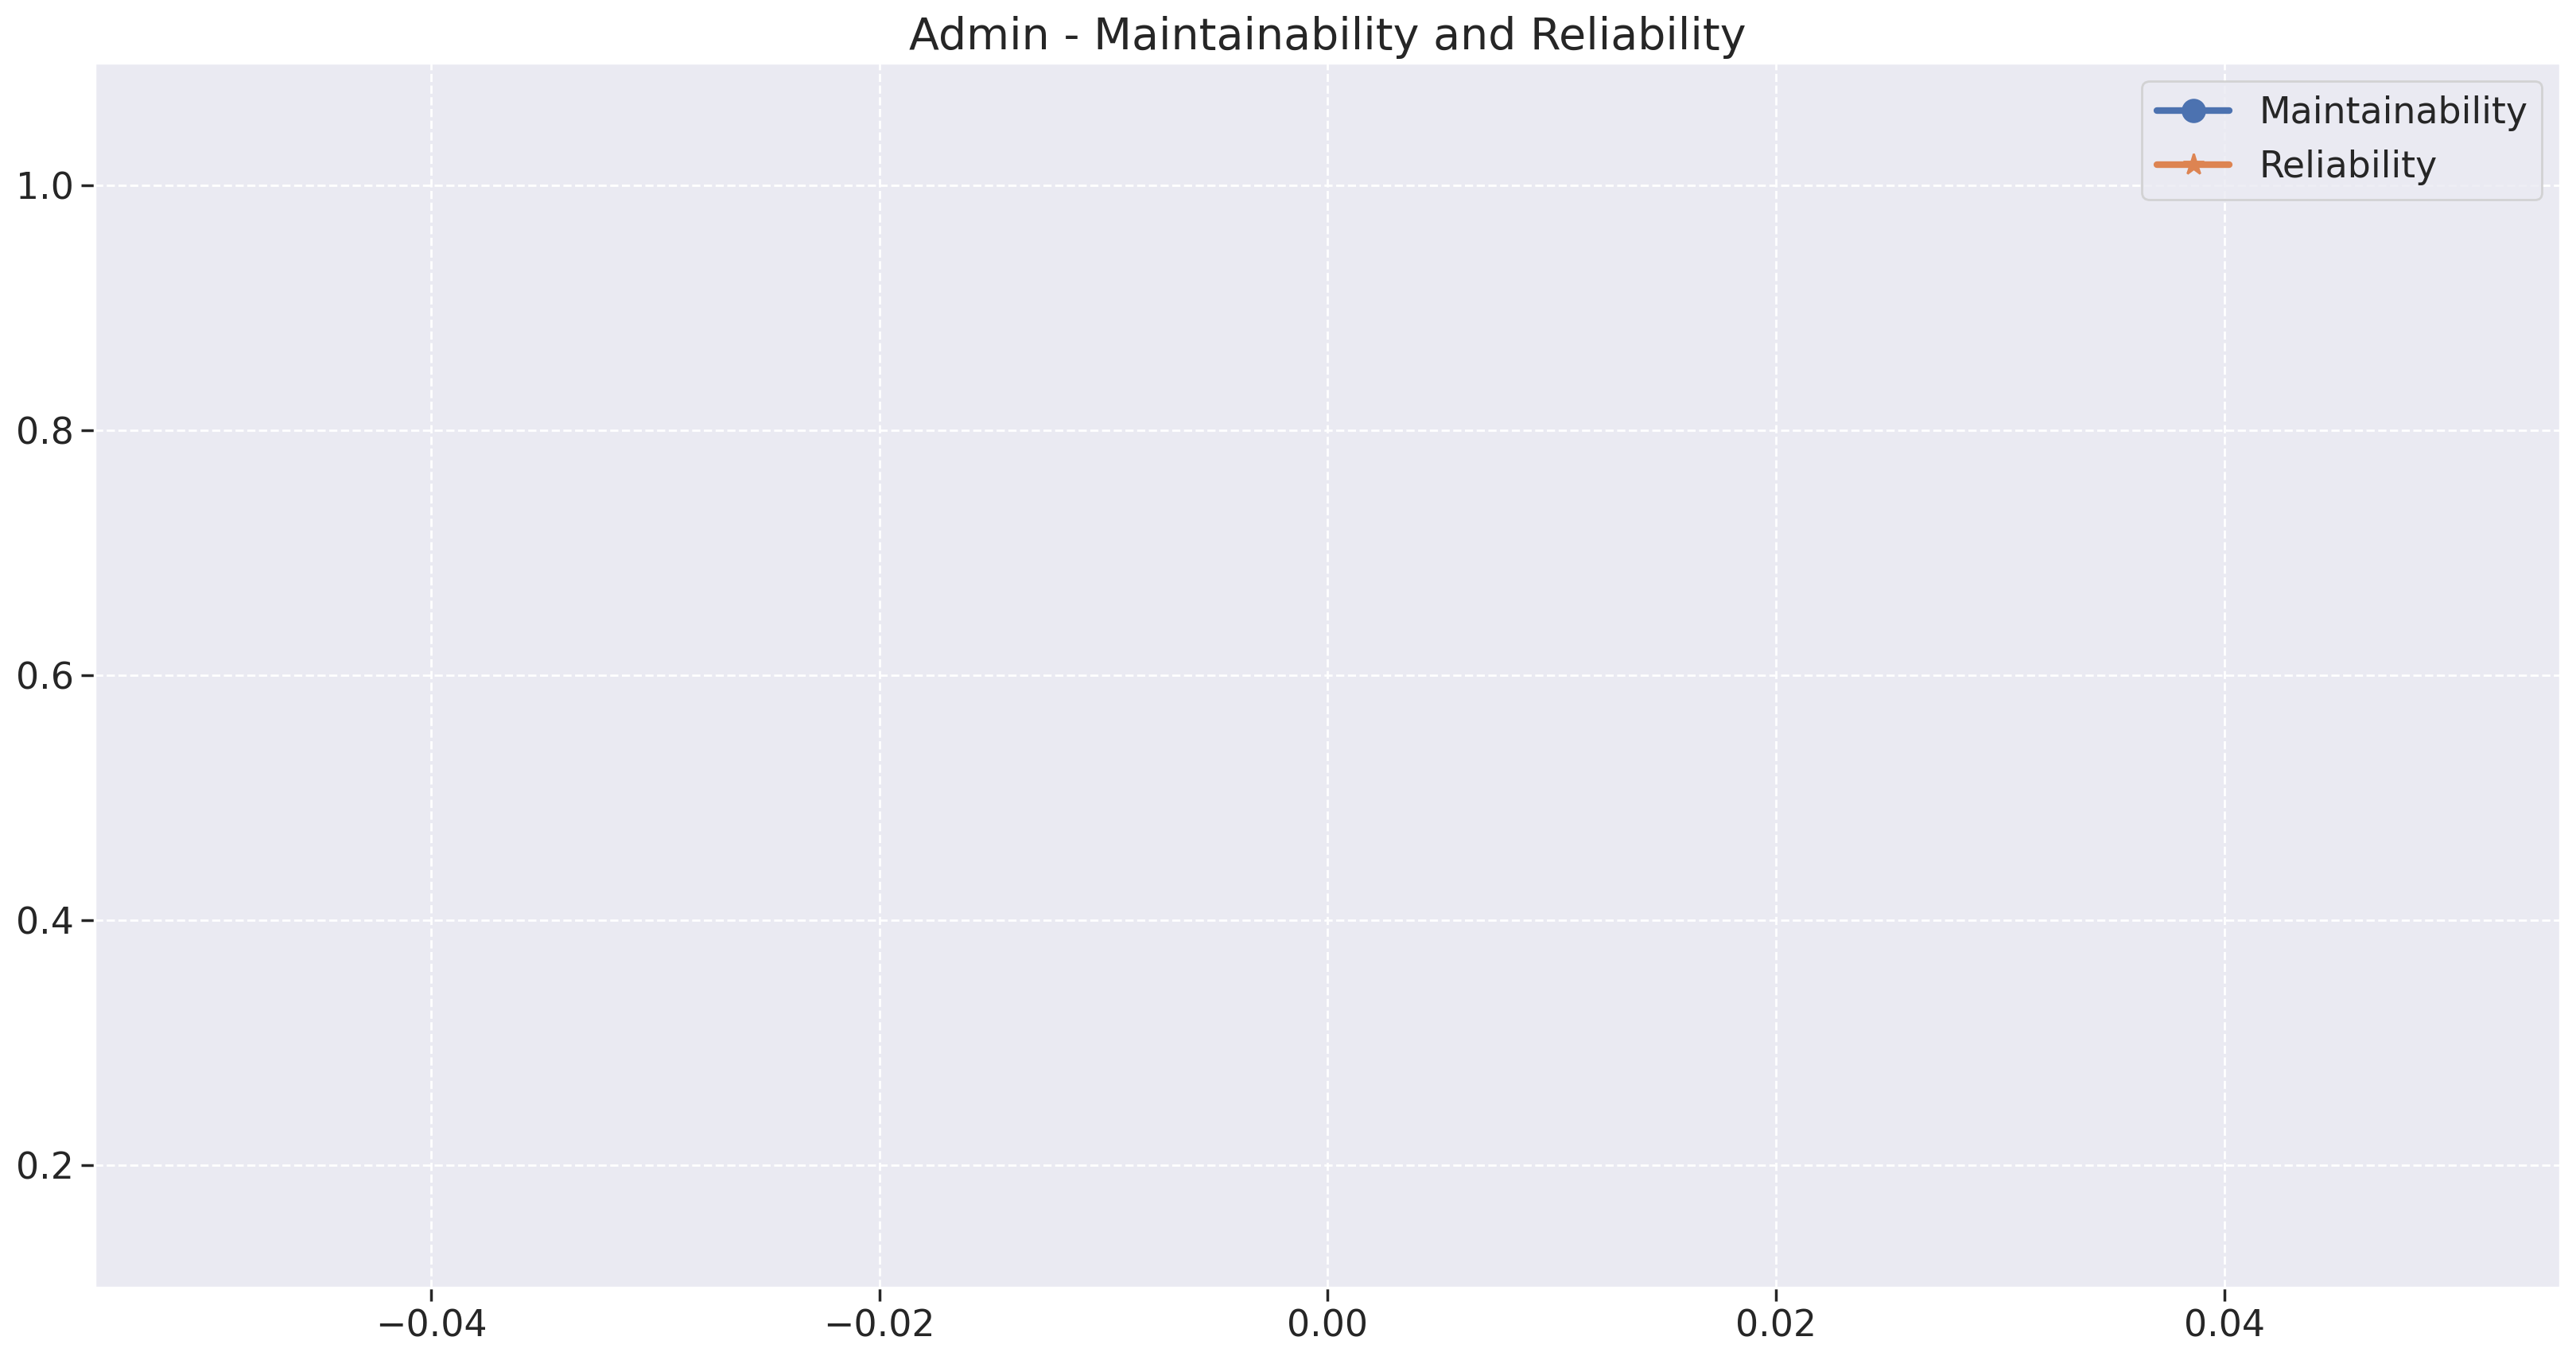

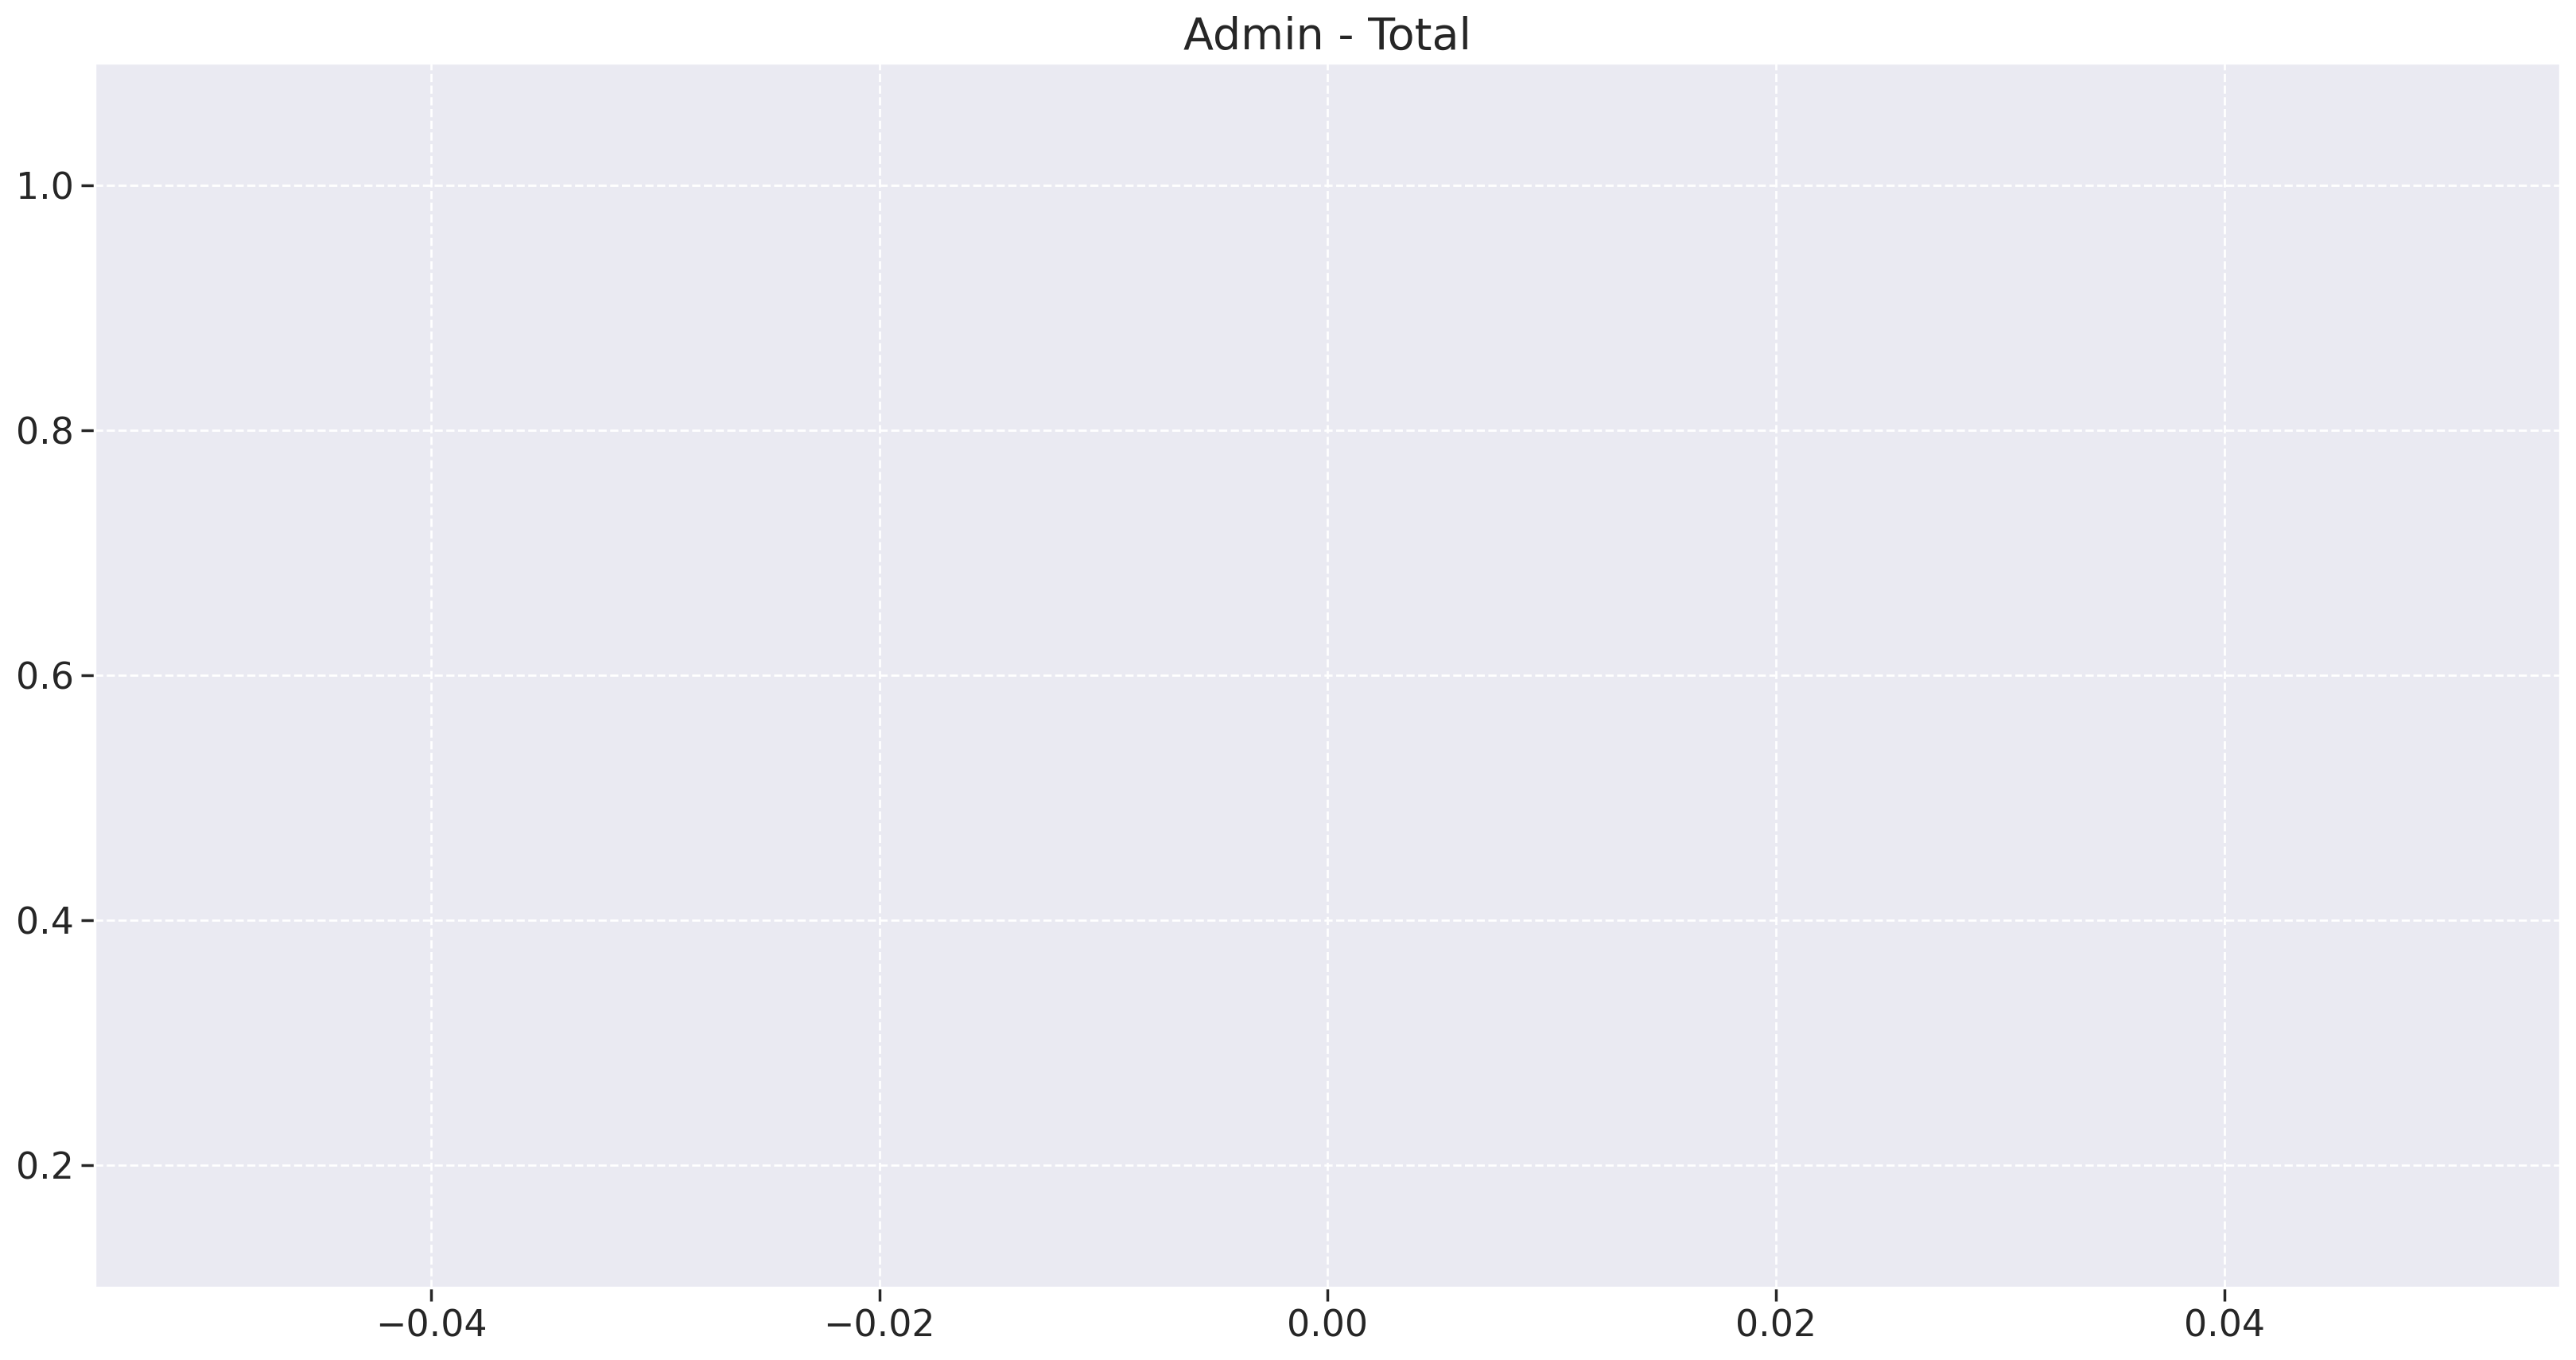

In [57]:
for name, data in metrics.items():
    print(name)
    analysis(data, name)

### Quality characteristic indicator

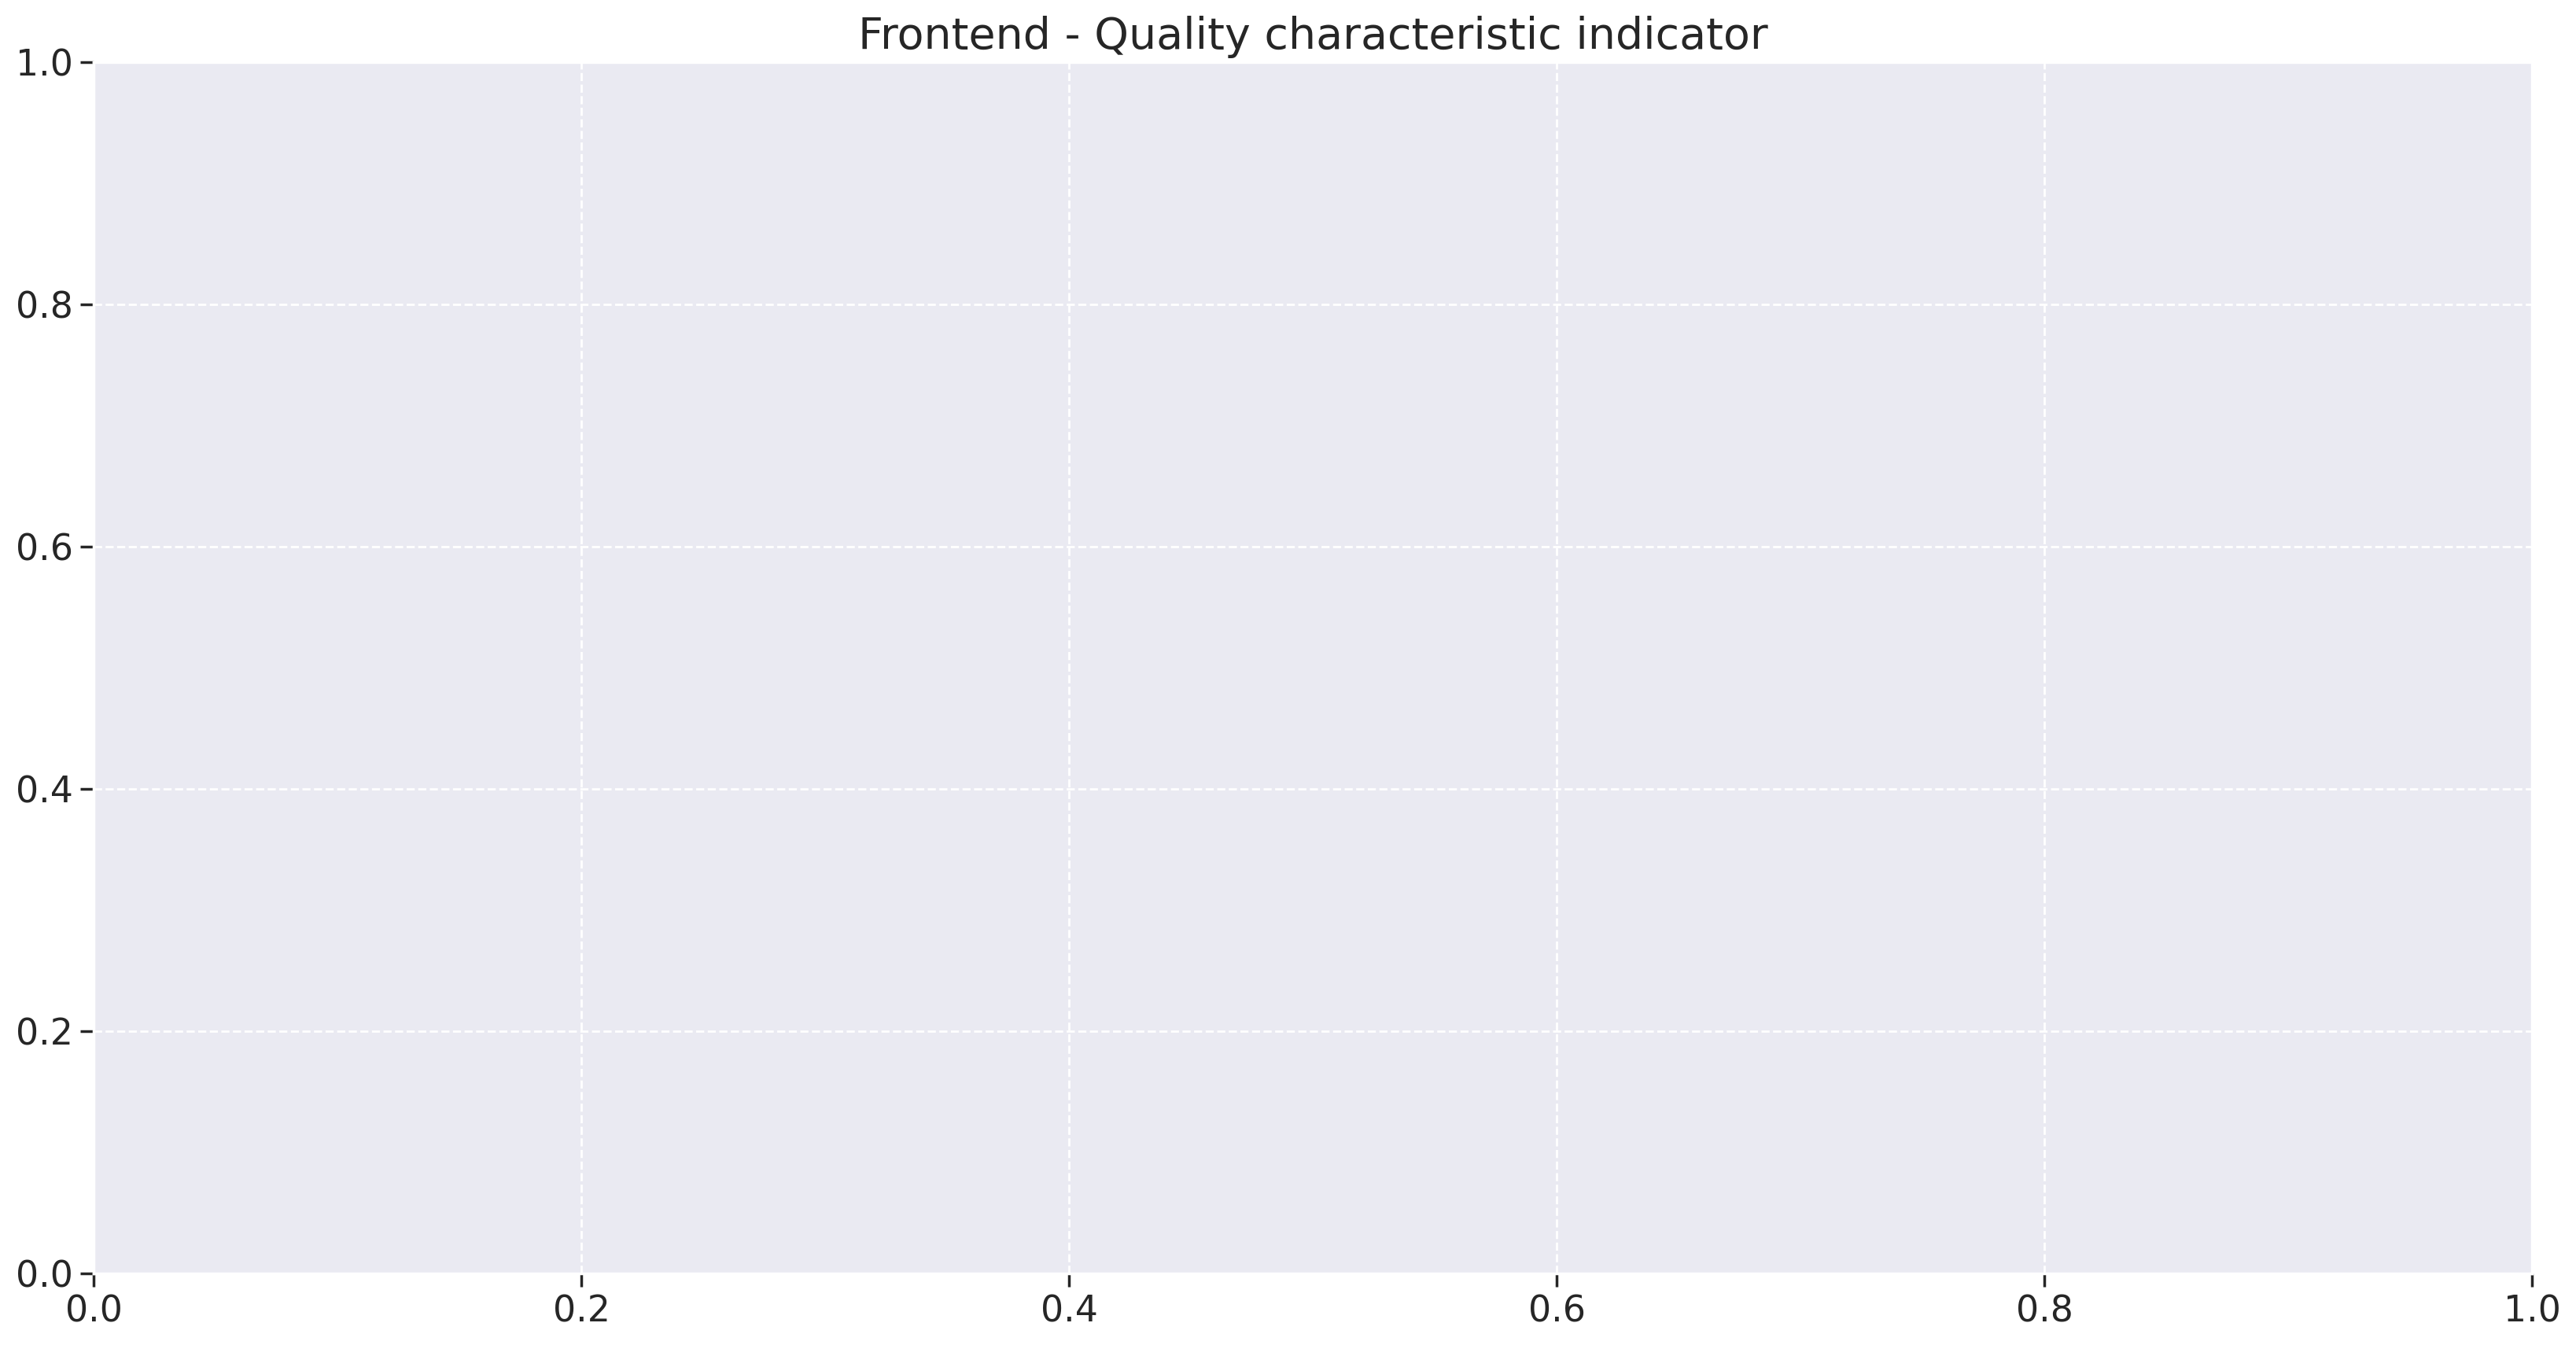

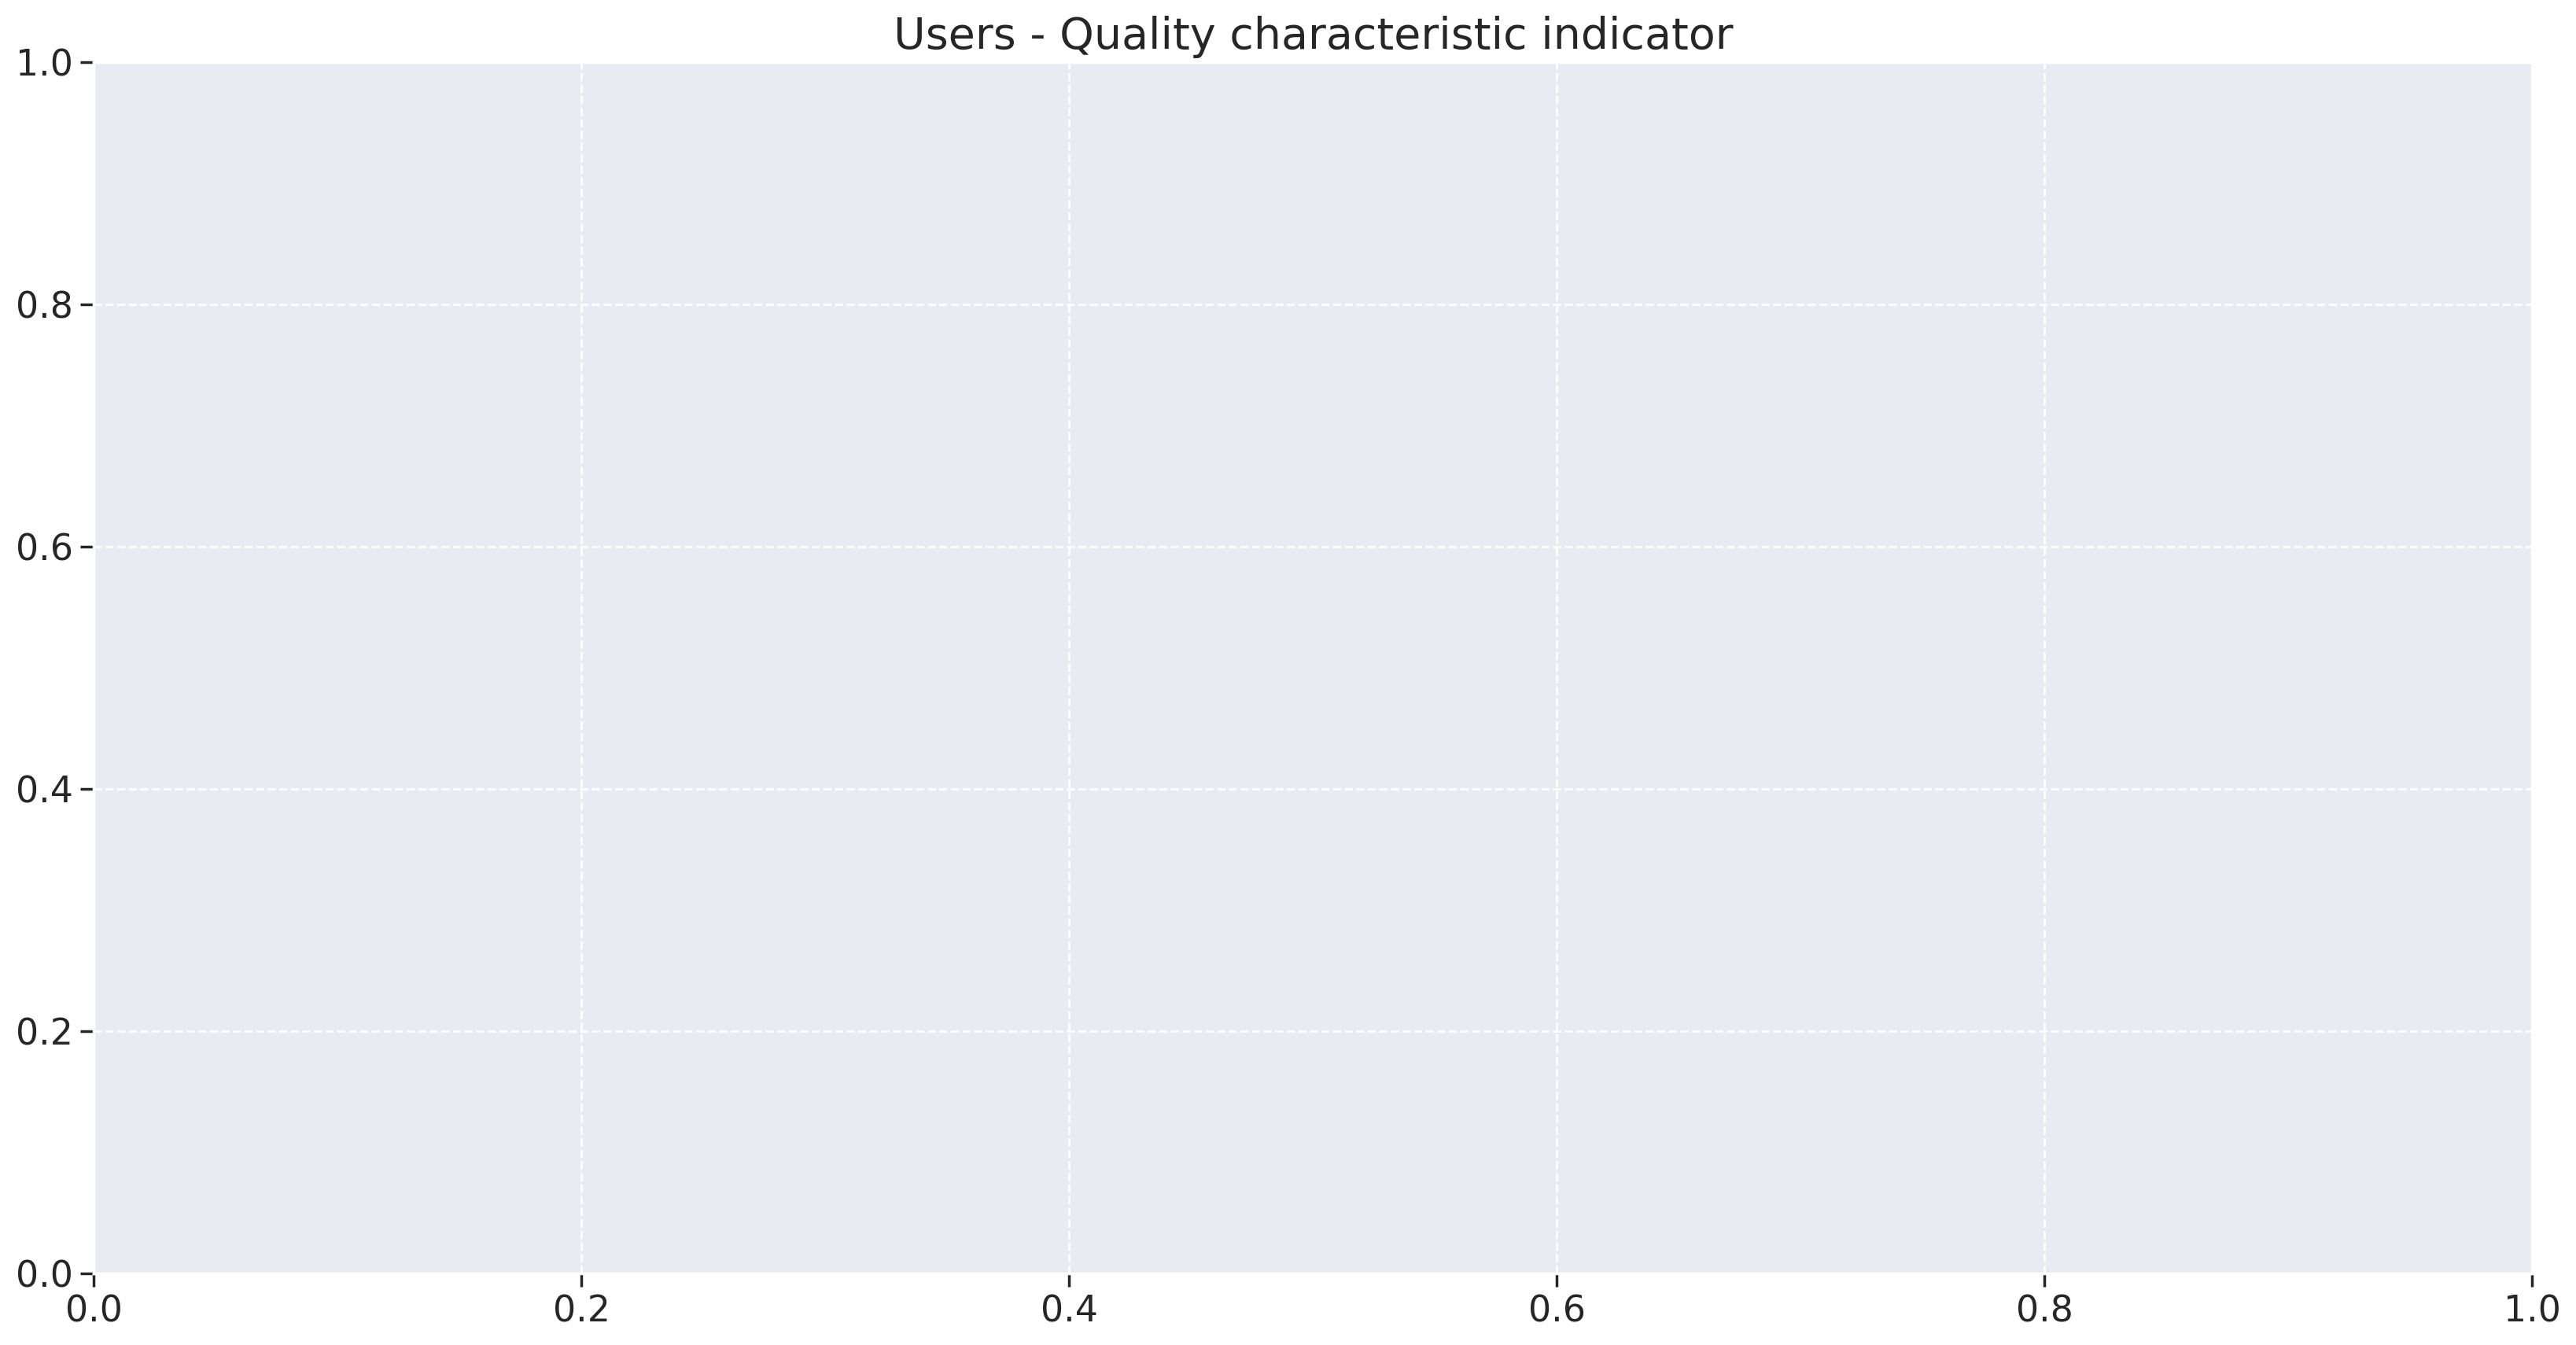

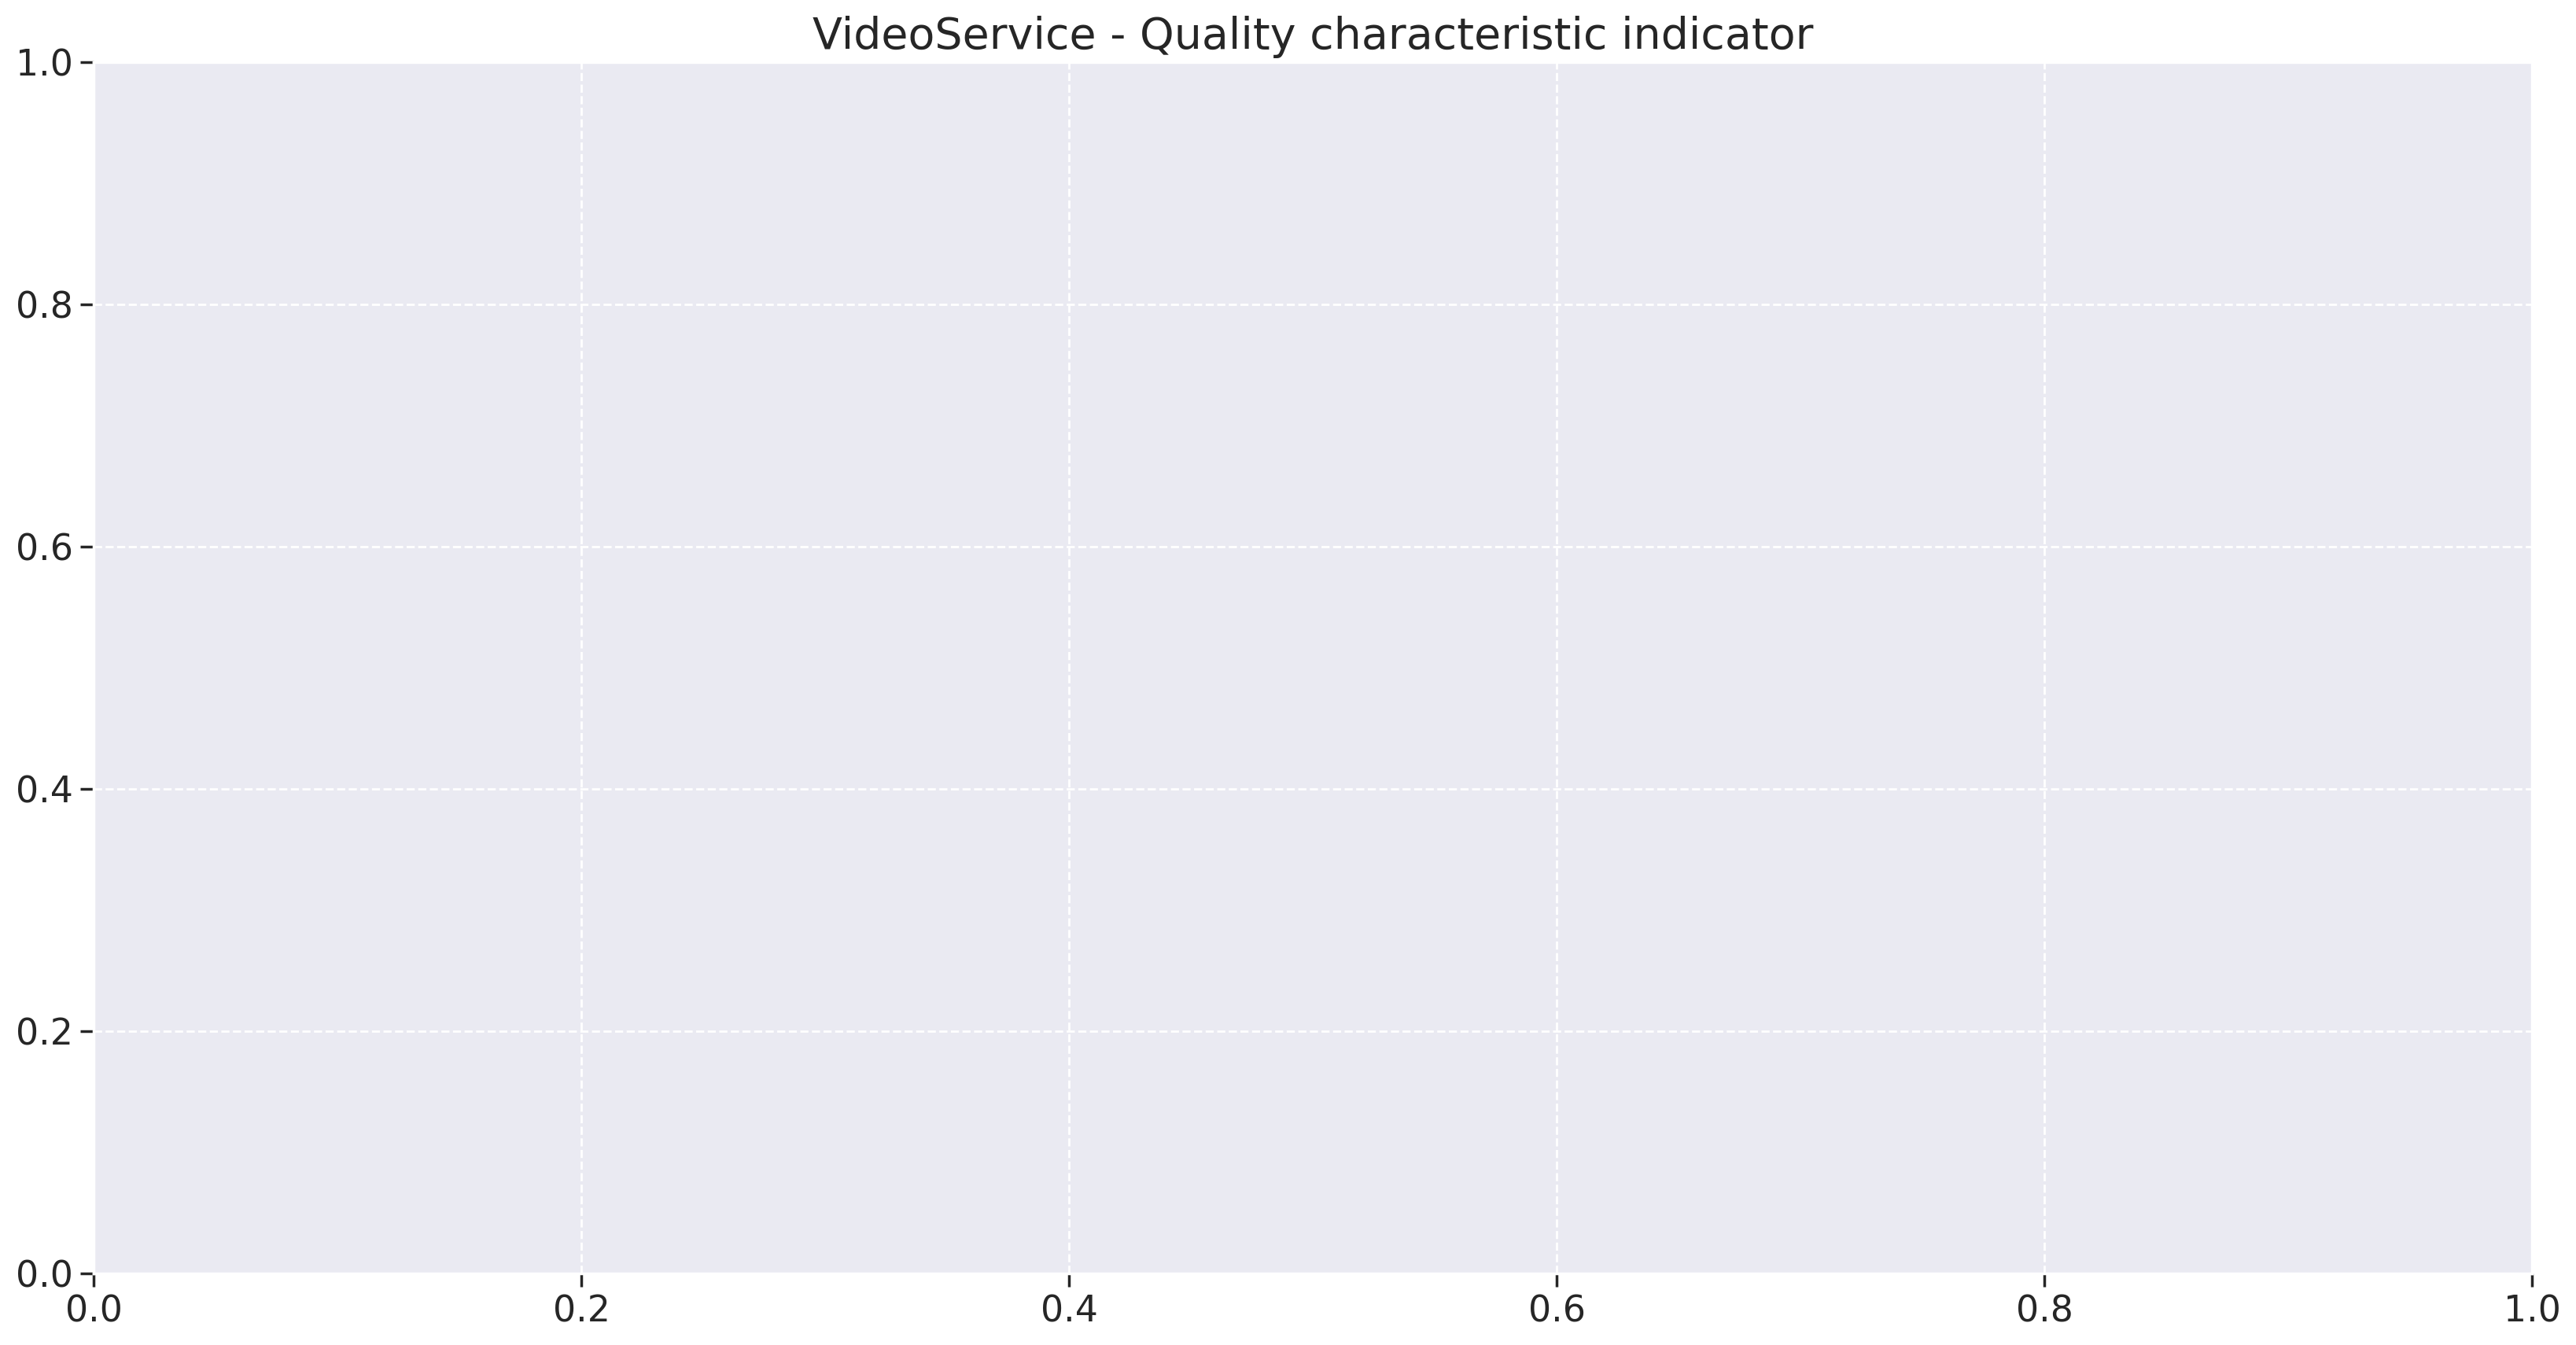

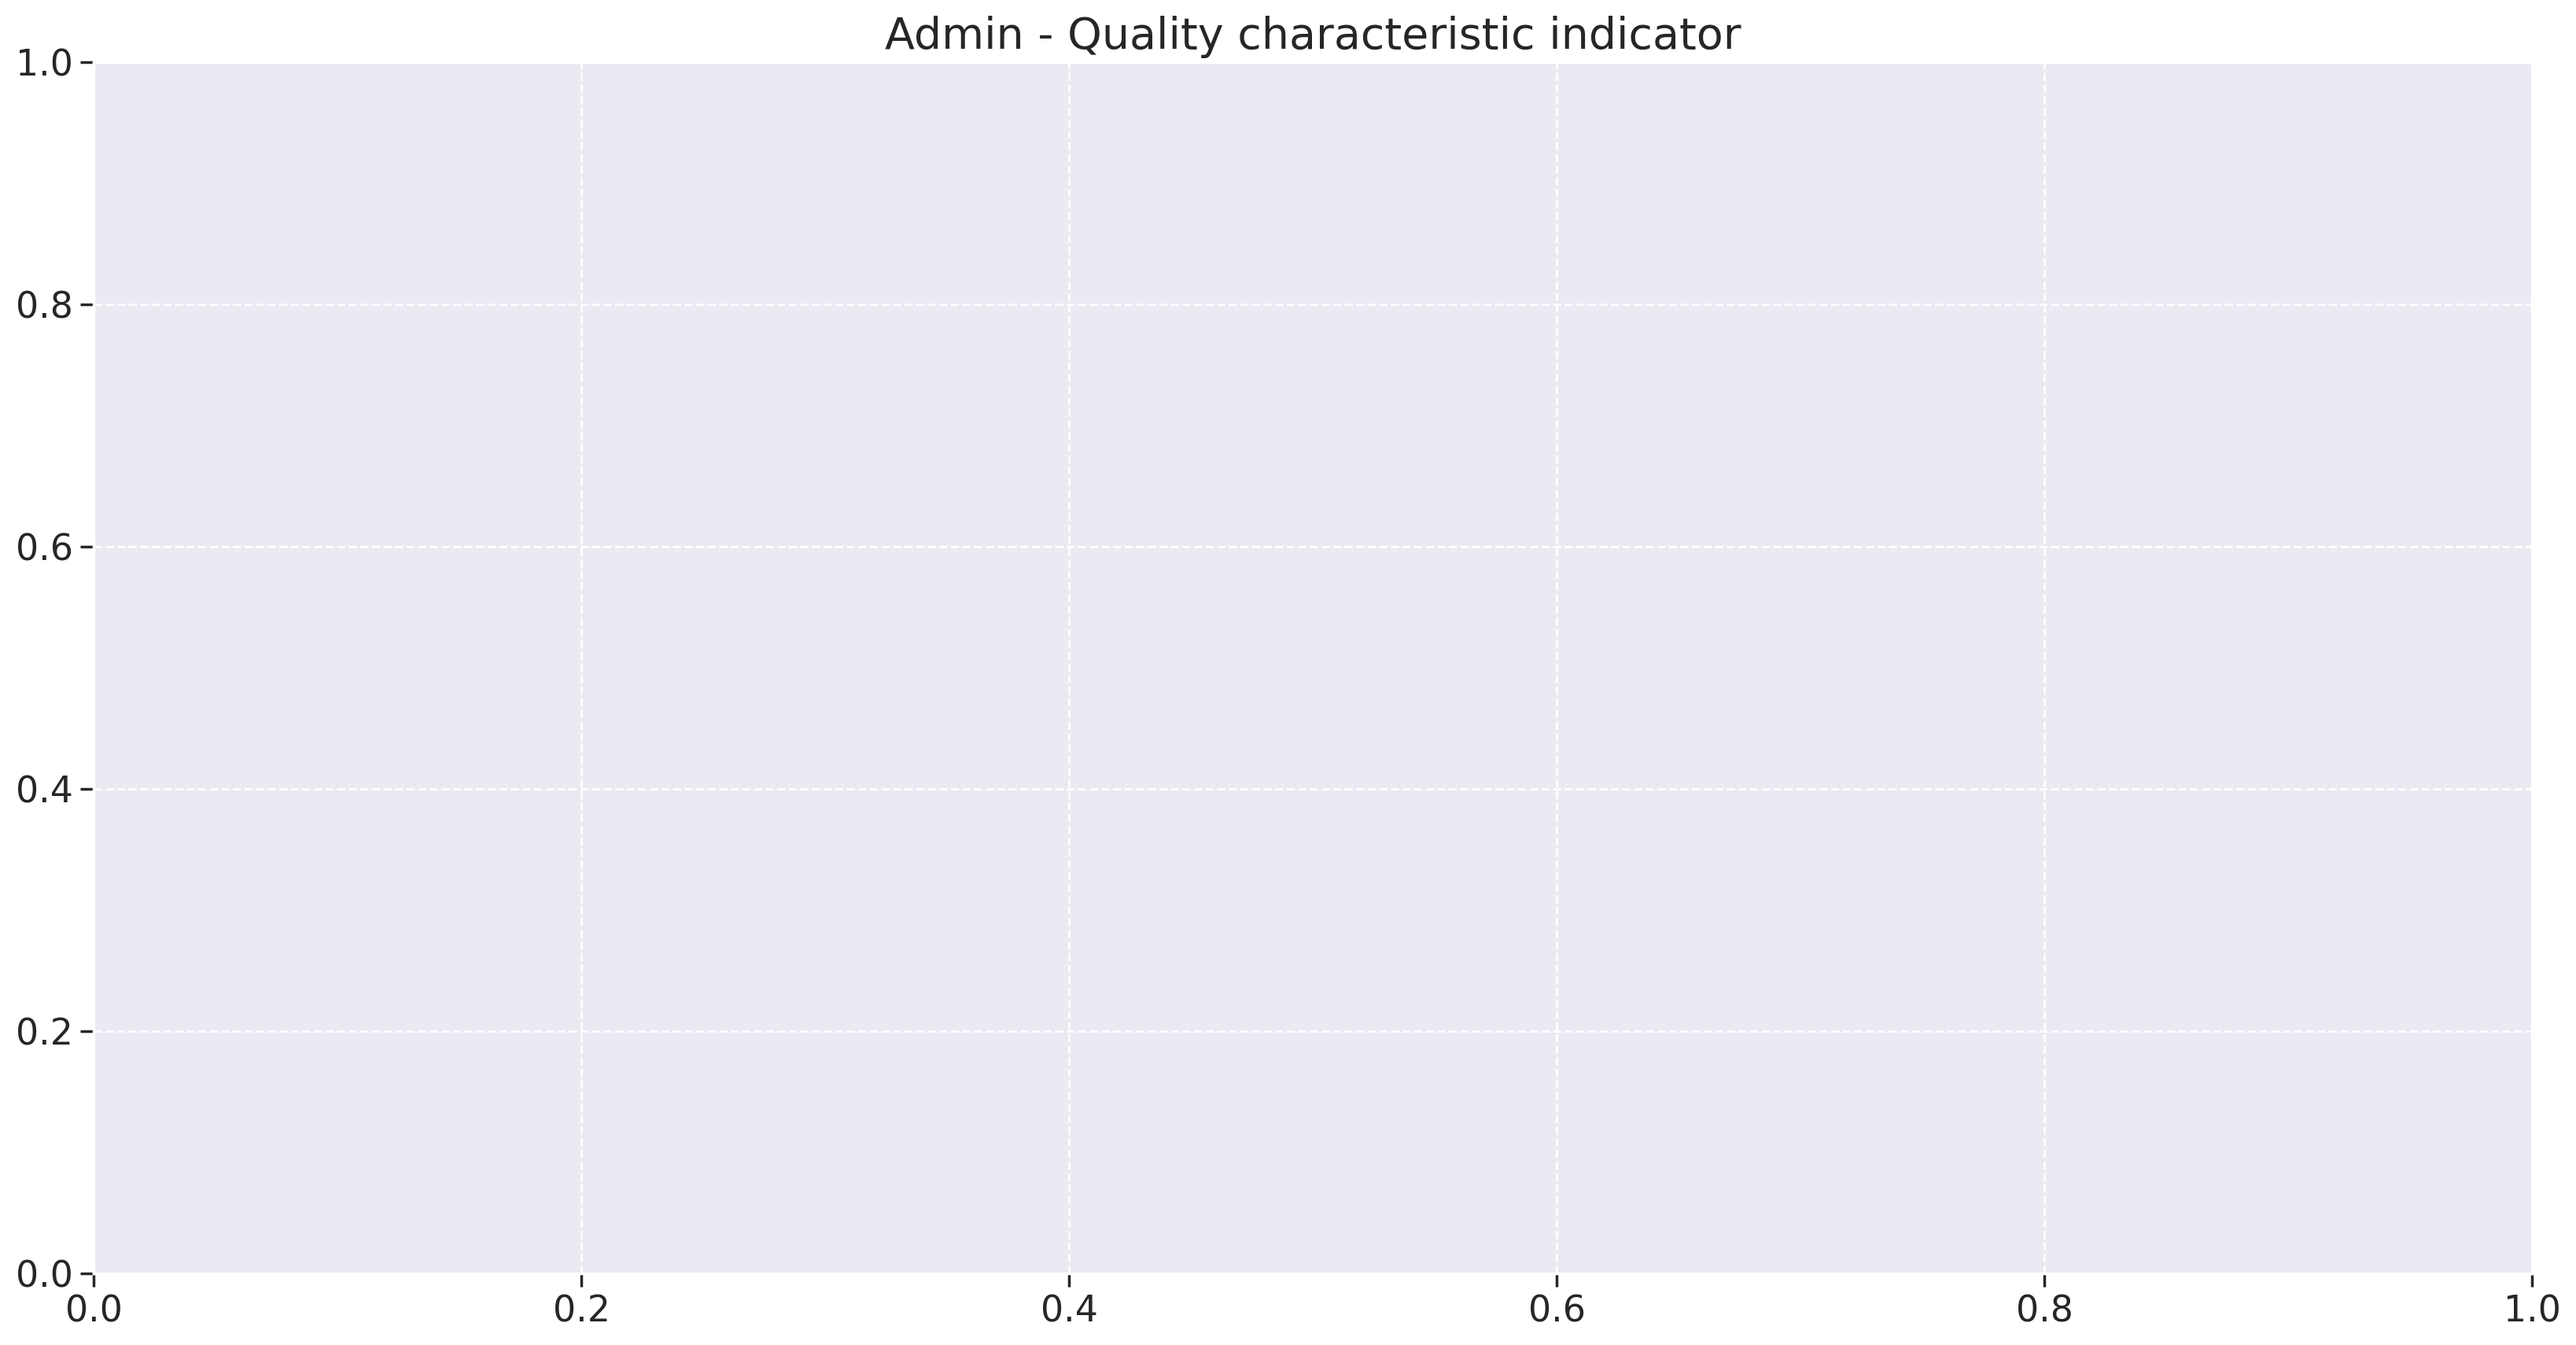

In [58]:

for name, data in metrics.items():
    fig = plt.figure(figsize=(20, 10))
    sns.boxplot(data=data[['Maintainability','Reliability']])

    plt.title(f"{name} - Quality characteristic indicator", fontsize=20)
    plt.show()

### Quality indicator visualization

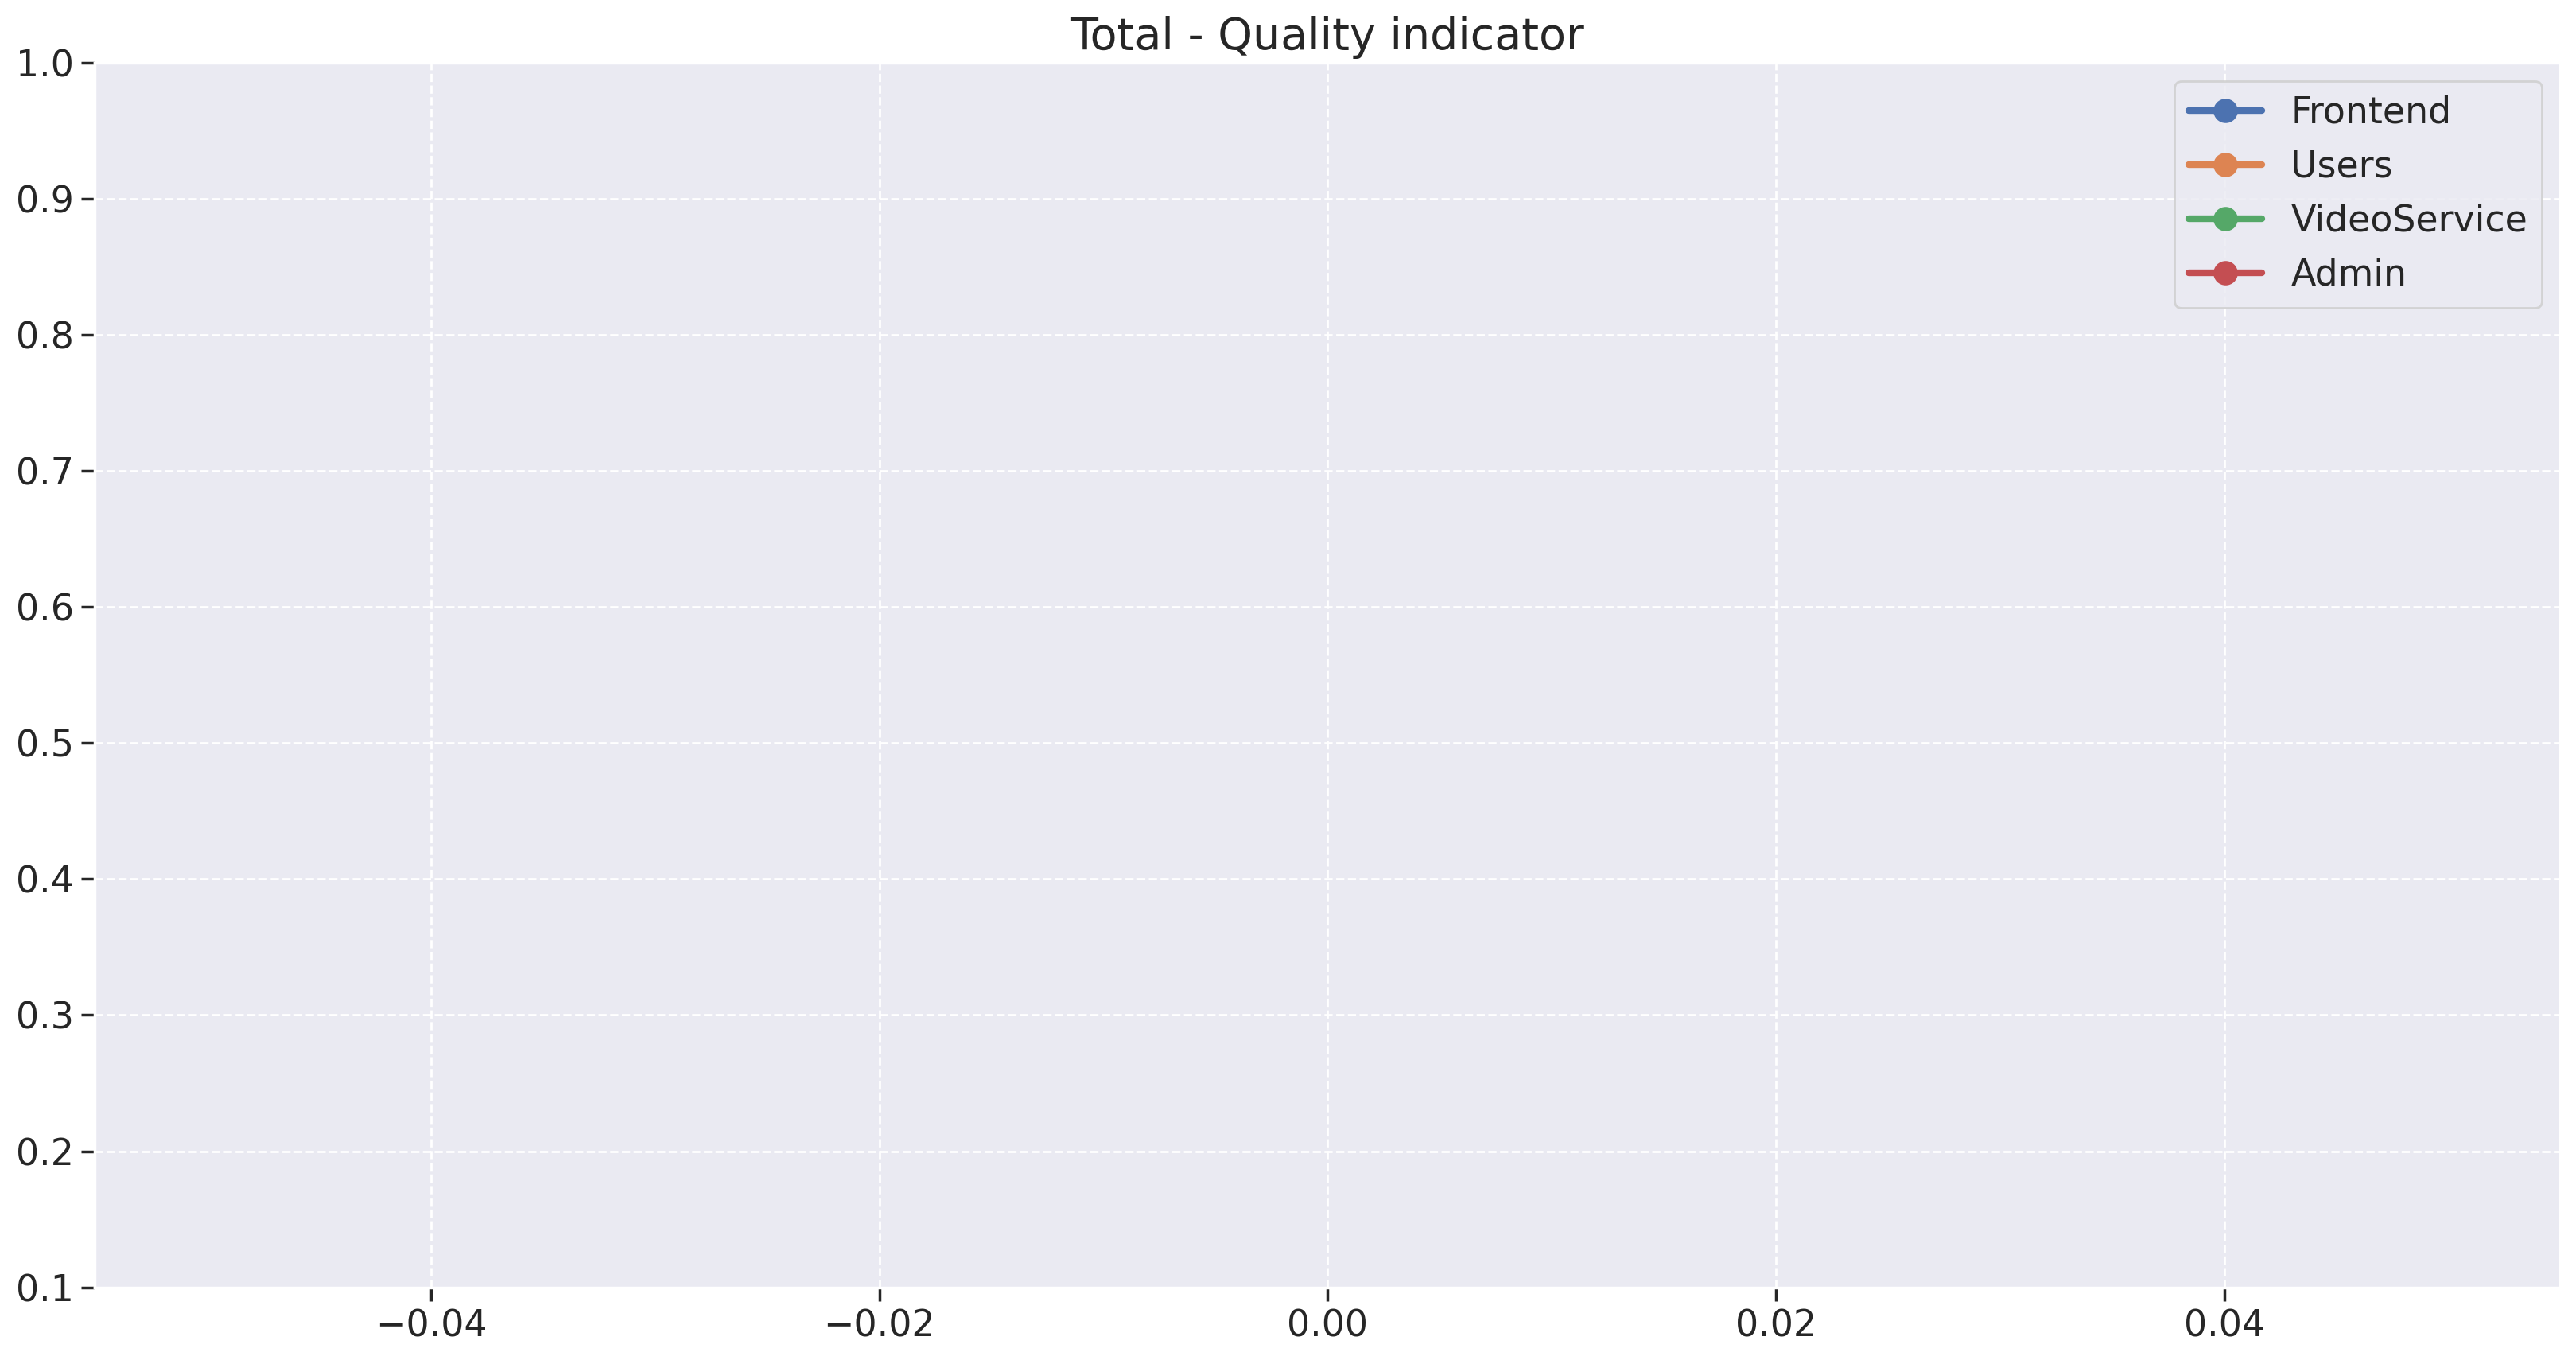

In [59]:
fig = plt.figure(figsize=(20, 10))

for name, data in metrics.items():
    plt.plot(data['total'], linewidth=3, marker='o', markersize=10, label=name)

plt.ylim(.1,1)
plt.title("Total - Quality indicator", fontsize=20)
plt.legend(loc='best')
plt.show()

## Export data

In [63]:
metrics_list = metrics.values()

metrics_df = pd.concat(metrics_list, ignore_index=True)

display(metrics_df)

current_datetime = datetime.datetime.now().strftime("%m-%d-%Y--%H-%M-%S")

metrics_df.to_excel('./data/fga-eps-mds-2023-2-UnB-TV--{}.xlsx'.format(current_datetime), index = False)

metrics_df.to_csv('./data/fga-eps-mds-2023-2-UnB-TV--{}.csv'.format(current_datetime), index = False)

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,Maintainability,Reliability,total


### 1) No microsserviço de backend que apresentar o pior indicador de manutenibilidade indique qual(is) o(s) módulos/arquivos mais críticos e explique como seu time tratou esse problema.
UserApi é microsserviço de backend que apresenta a pior manutenibilidade. Como a densidade de linhas duplicadas e densidade de comentários no UserApi são estáveis, o que mais afeta a sua manutenibilidade é a complexidade. Dessa forma, ao analisar os módulos e arquivos, percebe-se que o arquivo de maior complexidade é o “userRepository.ts” por conter toda a lógica relacionada ao armazenamento das informações no banco de dados. Porém, o módulo de maior complexidade é o “useCase”, que contém as regras de negócio da aplicação referente ao usuário.
O time focou em tratar principalmente a cobertura nos microsserviços do EquipmentApi e FrontEnd, e, por esse motivo, acabou não tratando da manutenibilidade do UserApi.

### 2) No microsserviço que apresentar o pior indicador de confiabilidade, explique como seu time tratou esse problema.
O microsserviço que apresenta o menor índice de confiabilidade é o FrontEnd, apesar de possuir bons índices de ‘Passed Tests’ e de ‘Fast test builds’, o microsserviço possui indicadores ruim de ‘Coverage’, que é uma das métricas que compõem o indicador de confiabilidade. Desta forma, o time optou por atuar mais em testes no FrontEnd para melhorar os índices. A partir do trabalho do time esta métrica de ‘Coverage’ veio melhorando ao decorrer do semestre, porém o FrontEnd permanece sendo o microsserviço do projeto que apresenta o pior indicador de confiabilidade.

### 3) Explique o comportamento da qualidade do produto, observada ao longo do tempo do desenvolvimento, do projeto relacionado ao seu time.
A qualidade do UserApi se manteve constante, com poucas variações.
A qualidade de EquimentApi foi melhorada, devido principalmente a algumas refatorações que melhoram a complexidade do código (‘Complexity) e a atuação do time em testes que possibilitou o aumento da cobertura (‘Coverage’)
A qualidade do Front teve a maior evolução, principalmente pela aumento significativo da cobertura de teste (‘Coverage’). A qualidade desse microsserviço acaba sendo mais afetada pela complexidade (‘Complexity’), que apesar de alta não se difere muito dos demais microsserviços, e principalmente por possuir o maior índice de código duplicado em relação aos outros.
O gateway apresenta apenas uma coleta de dados de qualidade, pois durante o desenvolvimento no projeto, esse repositório não teve alterações.
